<a href="https://colab.research.google.com/github/JovanaBobic/PPPO/blob/main/PPPO_IT41_2018_JovanaBobic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jovana Bobić IT41-2018

Generative Adversarial Networks - GAN

Principi prezentacije i prepoznavanja oblika


GAN-ovi su pametan način obuke generativnog modela tako što se problem uokviruje kao problem učenja pod nadzorom sa dva podmodela: model generatora koji obučavamo da generiše nove primere i model diskriminatora koji pokušava da klasifikuje primere kao stvarne (iz domena) ili lažno (generisano). Generatorska mreža uzima kao ulaz jednostavan N-dimenzionalni vektor nasumičnog šuma i transformiše ga prema naučenoj ciljnoj distribuciji. Njegov izlaz je takođe N-dimenzionalan. Diskriminator sa druge strane modelira funkciju raspodele verovatnoće (poput klasifikatora) i daje verovatnoću da je ulazna slika stvarna ili lažna [0, 1]. Imajući ovo na umu, možemo definisati dva glavna cilja zadatka generisanja:

- Obučiti generator da maksimizira diskriminatorovu konačnu grešku u klasifikaciji. (Tako da se generisane slike percipiraju kao stvarne).
- Obučiti diskriminator da minimizira konačnu grešku u klasifikaciji. (Tako da se pravi podaci pravilno razlikuju od lažnih podataka).

GAN proces

Korak 1. U generator unosimo slučajni signal buke. Generator stvara neke slike koje se koriste za obuku diskriminatora. Diskriminatoru pružamo neke karakteristike/slike koje želimo da nauči, a diskriminator daje verovatnoće. Ove verovatnoće mogu biti prilično velike jer je diskriminator tek počeo da se obučava. Vrednosti se zatim procenjuju i identifikuju. Greška se iztačunava i ona se širi putem diskriminatora, gde se ponderi ažuriraju.

Zatim treniramo generator. Uzimamo grupu slika koje je stvorio i ponovo ih stavljamo kroz diskriminator. Ne uključujemo slike karakteristika. Generator uči varajući diskriminatora u njega ispisujući lažno pozitivne rezultate.

Diskriminator će dati izlaz verovatnoće. Verovatnoće se zatim procenjuju i upoređuju sa onim što su trebale biti.Greška se izračunava i reprodukuje unazad kroz generator, a ponderi se ažuriraju.

Korak 2. Ovo je isto kao i korak 1. ali generator i diskriminator su obučeni malo više. Pomoću povratnog širenja generator razume svoje greške i počinje da ih čini sličnijim karakteristikama.

GAN se može koristiti za generisanje slika, modifikacije slike, super rezoluciju, pomoć umetnicima, fotografije sa realističnim slikama, generisanje govora, starenje lica...

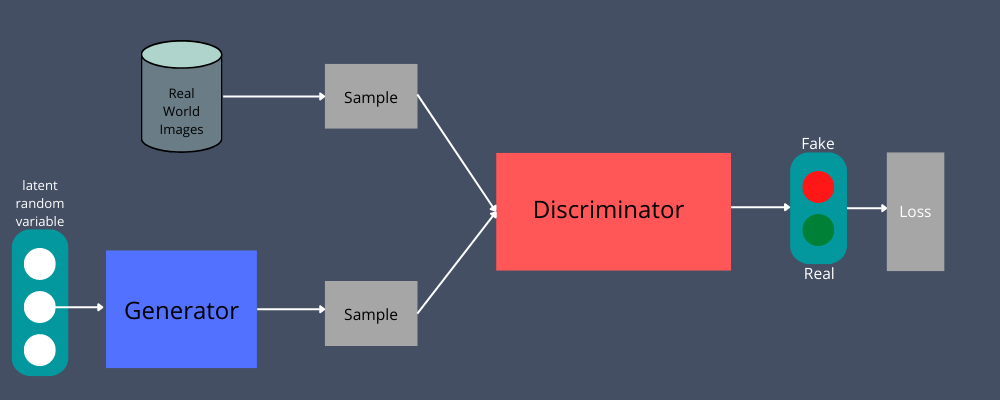


SET PODATAKA

In [12]:
#Preuzimanje datoteke sa Google Drive-a
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc" -O podaci.zip && rm -rf /tmp/cookies.txt

--2023-09-25 12:36:30--  https://docs.google.com/uc?export=download&confirm=t&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc
Resolving docs.google.com (docs.google.com)... 142.251.2.138, 142.251.2.139, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/htpuirocqkclqdb25556gjnfhlospl6e/1695645375000/12172178362461080244/*/1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc?e=download&uuid=ae1b9601-adbd-4e07-93f7-3cd5f788aba2 [following]
--2023-09-25 12:36:30--  https://doc-0g-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/htpuirocqkclqdb25556gjnfhlospl6e/1695645375000/12172178362461080244/*/1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc?e=download&uuid=ae1b9601-adbd-4e07-93f7-3cd5f788aba2
Resolving doc-0g-9s-docs.googleusercontent.com (doc-0g-9s-docs.googleusercontent.com)... 142.251.2.132, 2607:

In [13]:
import zipfile
from zipfile import ZipFile
import os

# Kreiranje direktorijuma
!mkdir '/jovana_pppo/podaci'

!unzip podaci.zip
# Smeštanje fajlova u direktorijum
with ZipFile('podaci.zip', 'r') as zipObj:
   zipObj.extractall('/jovana_pppo/podaci/')


Archive:  podaci.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/0002/008.jpg  
  inflating: harry-potter/0002/009.jpg  
  inflating: harry-potter/0002/010.jpg 

In [14]:
# Spisak fajlova i direktorijuma koji se nalaze u kreiranom direktorijumu
print(os.listdir("/jovana_pppo/podaci/"))

['jurassic-world', 'index.csv', 'star-wars', 'harry-potter', 'test', 'test.csv', 'marvel', 'metadata.csv', 'LICENSE']


In [15]:
import os
import shutil

data_path = '/jovana_pppo/podaci/'
lego_folder = '/jovana_pppo/lego_folder/'

# Kreiranje lego foldera
os.makedirs(lego_folder, exist_ok=True)

# Lista glavnih foldera za obradu
folders = ['jurassic-world', 'star-wars', 'harry-potter', 'marvel']

# Kopiranje slika iz podfoldera u lego folder
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    for root, dirs, files in os.walk(folder_path):
        for i, file in enumerate(files):
            if file.endswith(".jpg"):
                src = os.path.join(root, file)
                dst = os.path.join(lego_folder, f"{folder}_{i}_{file}")
                shutil.copyfile(src, dst)

print("Sve slike su kopirane u lego folder:", lego_folder)


Sve slike su kopirane u lego folder: /jovana_pppo/lego_folder/


In [16]:
import os

lego_folder = '/jovana_pppo/lego_folder/'

# Lista svih slika u folderu
image_list = []

# Rekurzivno pretraživanje foldera i dodavanje slika u listu
for root, dirs, files in os.walk(lego_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_list.append(file)

# Broj slika
num_images = len(image_list)

print( "Ukupan broj slika u folderu:", num_images)

Ukupan broj slika u folderu: 92


IMPORTOVANJE BIBLIOTEKA

In [17]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

PRIKAZ SLUČAJNIH SLIKA

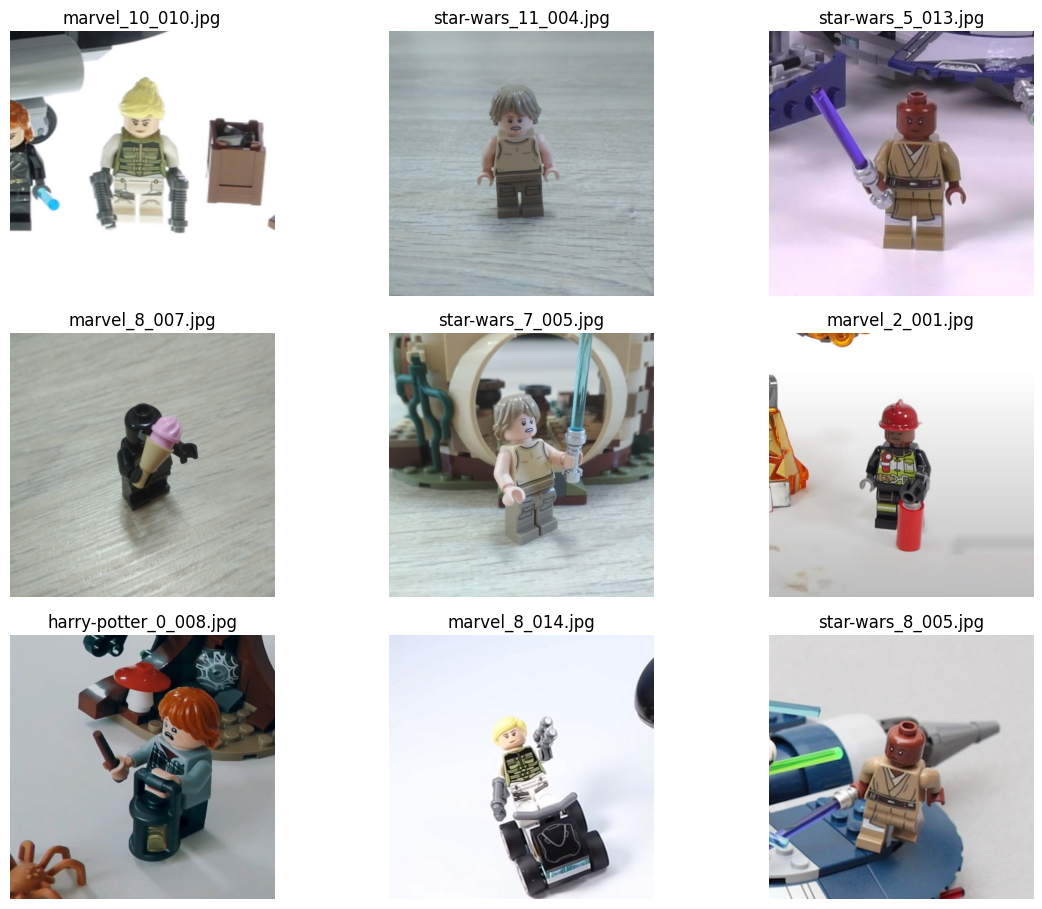

In [18]:
PATH = '/jovana_pppo/lego_folder/'

# Spisak fajlova sa putanje PATH
images = os.listdir(PATH)

# Kreira se nova lista koja sadrži prvih 5000 elemenata iz liste images
less_images = images[0:5000:1]


# Kreiranje slikovne mreže
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

# Učitavaju se nasumično izabrane slike i prikazuju se sa naslovima na odgovarajućim osama
for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(less_images))
    img = plt.imread(PATH + less_images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(less_images[rnd_indx])
    axis.set_axis_off()

# Podesavanje pozicija slika kako bi se postigao bolji prikaz
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


PODEŠAVANJE DIMENZIJA SLIKA

In [19]:
import os
from PIL import Image
from torch.utils.data import Dataset

# Kreiranje ImageDataset klase koja mora da implenetira tri funkcije: `__init__`, `__len__`, and `__getitem__`

class ImageDataset(Dataset):

# __init__ funkija instancira Dataset objekat
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.img_paths = self._get_img_paths()
        self.images = self._load_imgs()

#__getitem__ funkcija poziva transform funkciju i vraća sliku sa zadatim indeksom
    def __getitem__(self, index):
        img = self.images[index]
        if self.transform is not None:
            img = self.transform(img)
        return img

#__len__ funcija vraća broj slika u dataset-u
    def __len__(self):
        return len(self.images)

    def _get_img_paths(self):
        extensions = ['.jpg', '.jpeg', '.png']
        img_paths = []
        for subdir, dirs, files in os.walk(self.root):
            for file in files:
                ext = os.path.splitext(file)[1].lower()
                if ext in extensions:
                    img_paths.append(os.path.join(subdir, file))
        return img_paths

    def _load_imgs(self):
        images = []
        for img_path in self.img_paths:
            try:
                img = Image.open(img_path)
                images.append(img)
            except Exception as e:
                print(f"Error loading image: {img_path}")
                print(f"Error message: {str(e)}")
        return images

# Primer korišćenja
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageDataset(root='/jovana_pppo/lego_folder', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=32)

images = next(iter(dataloader))
print(images.shape)


torch.Size([32, 3, 64, 64])


In [20]:
batch_size = 32
image_size = 64

# Definisanje transformacija koje će biti primenjene na slike
random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.RandomHorizontalFlip(p=0.5),
                               transforms.RandomApply(random_transforms, p=0.2),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Kreiranje instance klase ImageDataset sa zadatom putanjom root i transformacijama transform.
dataset = ImageDataset(root='/jovana_pppo/lego_folder', transform=transform)

# Kreiranje iterabilnog dataloadera za treniranje modela.
train_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size)

# Pozivanje sledece batch slike i konvertovanje u oblik pogodan za prikazivanje.
imgs = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

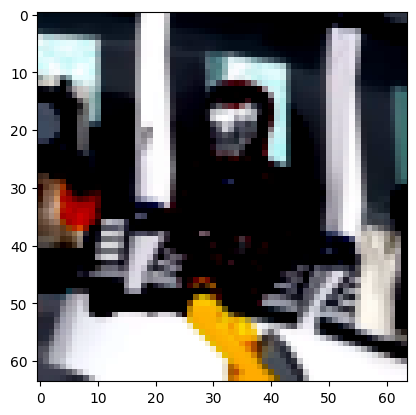

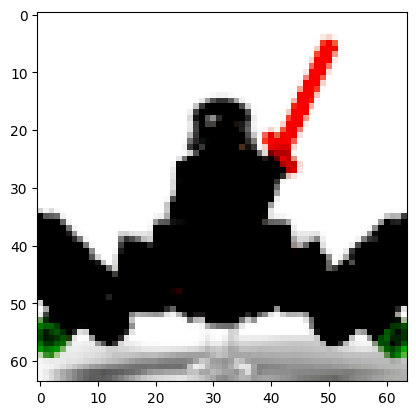

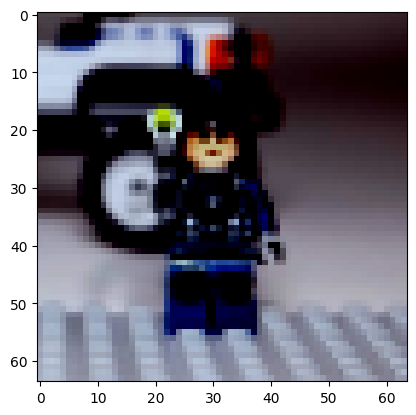

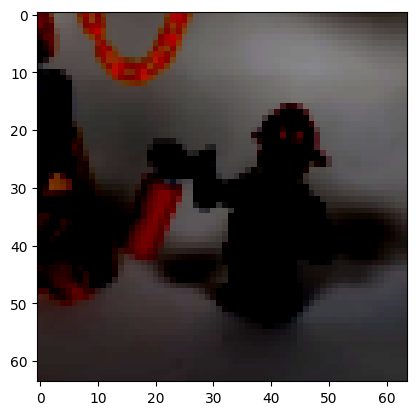

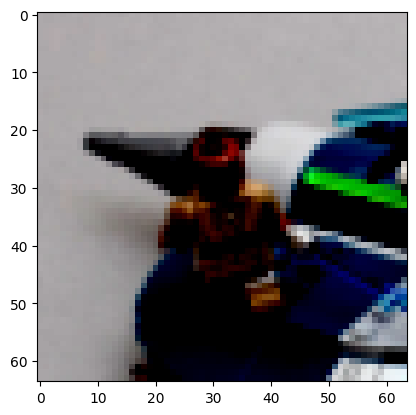

In [21]:
# Prolazak kroz prvih 5 slika iz imgs niza
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

INICIJALIZACIJA TEŽINA

Težine modela treba da budu centrirane oko nule (srednja vrednost = 0.0) sa blagim povećanjem standardne devijacije (stdev = 0.02). Ovo doprinosi stabilizaciji i diskriminatora i generatora tokom treninga, sprečavajući nestanak ili eksploziju gradijenata modela. Za inicijalizaciju, koriste se slučajne promenljive (slučajan vektor šuma).

In [22]:
# Uzima neuronsku mrežu m kao ulaz i inicijalizuje sve njene težine.

def weights_init(m):

# Postavljanje odgovarajuće vrednosti težina u skladu sa vrstom sloja
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

DEFINISANJE GENERATORA

Generator služi za generisanje novih slika iz slučajnih šumova ili latentnog prostora. Cilj generatora je da nauči kako da generiše slike koje što više liče na stvarne slike, kako bi prevazišao diskriminator i stvorio visokokvalitetne generisane slike.

In [23]:
# Definiše se generator mreža G
class G(nn.Module):
    def __init__(self):
        super(G, self).__init__()
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )

    def forward(self, input):
        output = self.main(input)
        return output

# Kreiranje generatora
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

DEFINISANJE DISKRIMINATORA

 Diskriminator je zadužen za identifikovanje veštački kreiranih slika od strane generatora i njihovo razlikovanje od pravih podataka.

In [24]:
# Definiše se diskriminator mreža D
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )

    def forward(self, input):
        output = self.main(input)
        return output.view(-1)


# Kreiranje diskriminatora
netD = D()
netD.apply(weights_init)

D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [25]:
# Definišu se generator koji generiše slike iz latentnog vektora i diskriminator koji klasifikuje slike na osnovu stvarnosti ili lažnosti.
class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()

        self.nz = nz
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0),
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img


class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()

        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)

        return out.view(-1, 1)

KREIRANJE OPTIMIZERA

Optimizer ažurira težine generatora i diskriminatora tokom treniranja kako bi se smanjili gubici a povećala tačnost.

In [26]:
EPOCH = 5
LR = 0.0002
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

In [27]:
import os

rezultati_dir = "/jovana_pppo/rezultati"
os.makedirs(rezultati_dir, exist_ok=True)


for epoch in range(EPOCH):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()

        real = data
        input = Variable(real)
        target = Variable(torch.ones(input.size()[0]))
        output = netD(input)
        errD_real = criterion(output, target)

        noise = Variable(torch.randn(input.size()[0], 100, 1, 1))
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0]))
        output = netD(fake.detach())
        errD_fake = criterion(output, target)

        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()

        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()

        print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, i, len(dataloader), errD.item(), errG.item()))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % rezultati_dir, normalize=True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % (rezultati_dir, epoch), normalize=True)


[0/5][0/3] Loss_D: 2.2562; Loss_G: 5.9213
[0/5][1/3] Loss_D: 0.6697; Loss_G: 6.2634
[0/5][2/3] Loss_D: 0.4225; Loss_G: 6.1017
[1/5][0/3] Loss_D: 0.5834; Loss_G: 7.2641
[1/5][1/3] Loss_D: 0.3680; Loss_G: 6.1556
[1/5][2/3] Loss_D: 0.3750; Loss_G: 6.5669
[2/5][0/3] Loss_D: 0.4027; Loss_G: 7.8577
[2/5][1/3] Loss_D: 0.1724; Loss_G: 7.6604
[2/5][2/3] Loss_D: 0.2408; Loss_G: 6.2693
[3/5][0/3] Loss_D: 0.5153; Loss_G: 10.3006
[3/5][1/3] Loss_D: 0.0956; Loss_G: 8.7684
[3/5][2/3] Loss_D: 0.1623; Loss_G: 6.6681
[4/5][0/3] Loss_D: 0.2986; Loss_G: 9.8129
[4/5][1/3] Loss_D: 0.1619; Loss_G: 7.5899
[4/5][2/3] Loss_D: 0.1514; Loss_G: 7.9740


In [28]:
# Definisanje learning rate-a i broja epoha prilikom treniranja modela
# Defisanje labele za prave i lažne fotografije koje će se koristiti pri izračunavanju diskriminatora i generatora
batch_size = 32
LR_G = 0.0002
LR_D = 0.0002

beta1 = 0.5
epochs = 100

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

In [30]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [31]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)

    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)

    plt.show()
    plt.close()

TRENIRANJE MODELA

<ipython-input-32-9da94dbbdd1a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ii, real_images in tqdm(enumerate(train_loader), total=len(train_loader)):


  0%|          | 0/3 [00:00<?, ?it/s]

[1/100][1/3] Loss_D: 1.5450 Loss_G: 1.5108 D(x): 0.5342 D(G(z)): 0.5860 / 0.1955
[1/100][2/3] Loss_D: 2.1429 Loss_G: 1.0295 D(x): 0.5998 D(G(z)): 0.7846 / 0.3421
[1/100][3/3] Loss_D: 2.5089 Loss_G: 1.0358 D(x): 0.5615 D(G(z)): 0.8388 / 0.3422


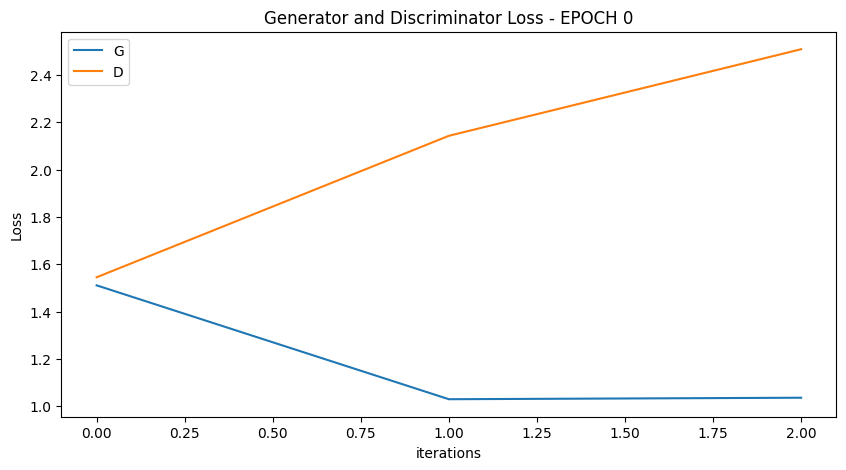

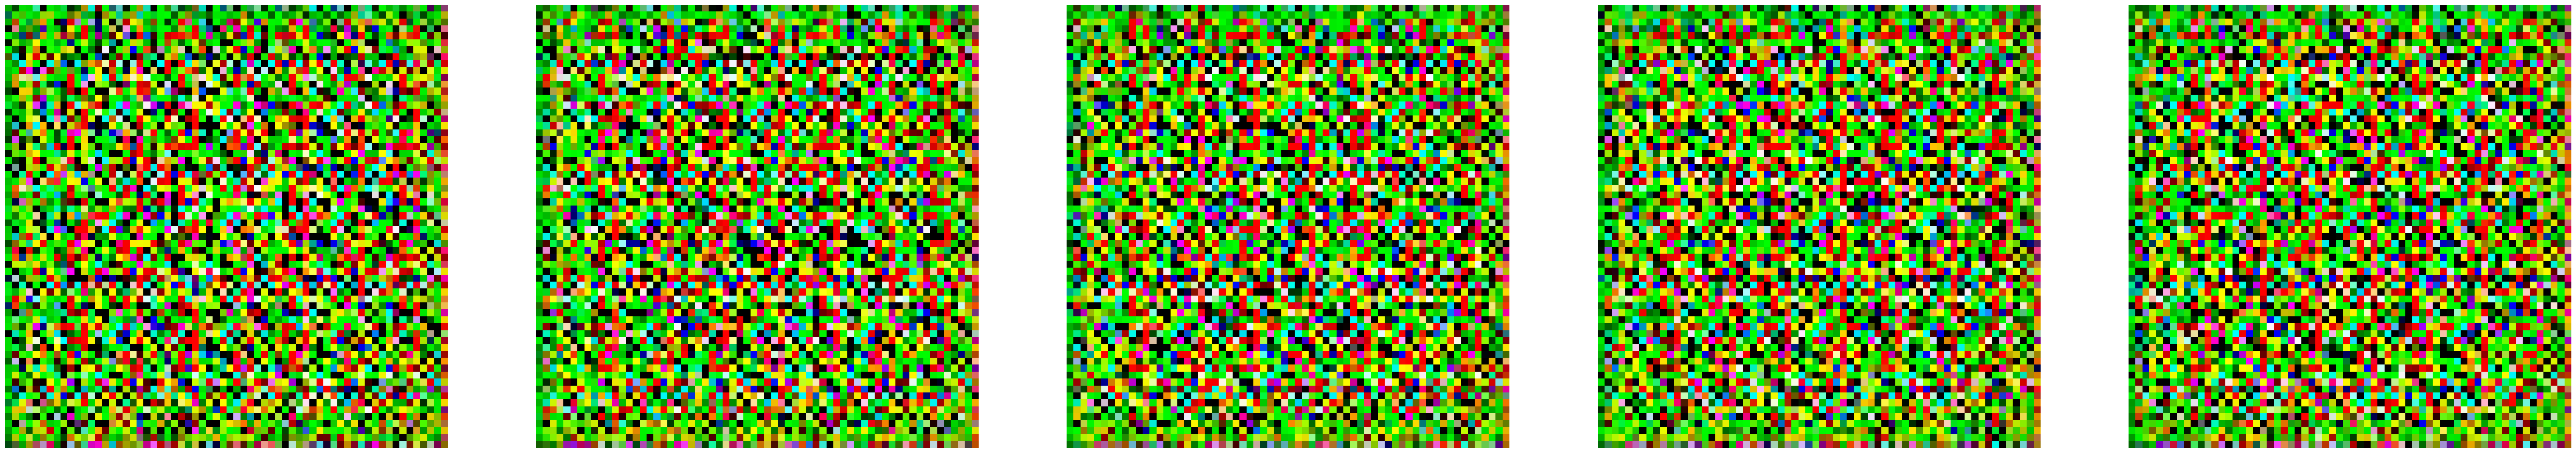

  0%|          | 0/3 [00:00<?, ?it/s]

[2/100][1/3] Loss_D: 2.2945 Loss_G: 1.3162 D(x): 0.5695 D(G(z)): 0.8025 / 0.2506
[2/100][2/3] Loss_D: 2.0783 Loss_G: 1.7914 D(x): 0.5079 D(G(z)): 0.7299 / 0.1458
[2/100][3/3] Loss_D: 1.7474 Loss_G: 2.1417 D(x): 0.4853 D(G(z)): 0.6207 / 0.0965


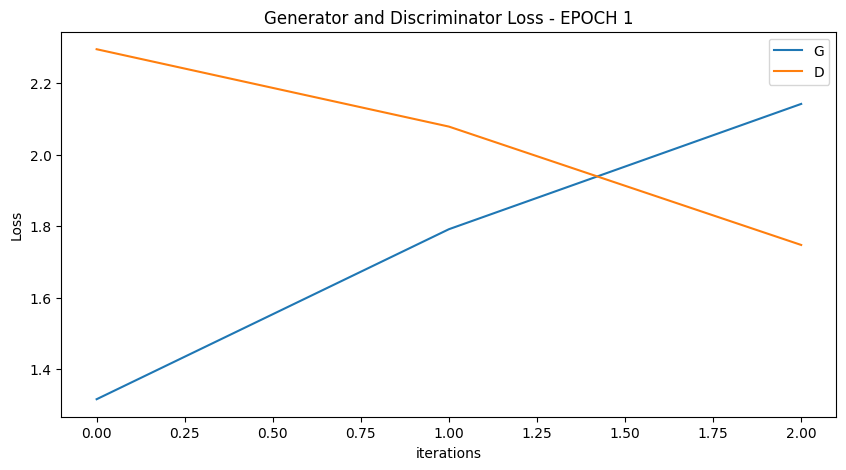

  0%|          | 0/3 [00:00<?, ?it/s]

[3/100][1/3] Loss_D: 1.5322 Loss_G: 2.4109 D(x): 0.4988 D(G(z)): 0.5295 / 0.0725
[3/100][2/3] Loss_D: 1.7479 Loss_G: 2.5017 D(x): 0.5690 D(G(z)): 0.6553 / 0.0653
[3/100][3/3] Loss_D: 1.7231 Loss_G: 2.8642 D(x): 0.5417 D(G(z)): 0.6460 / 0.0425


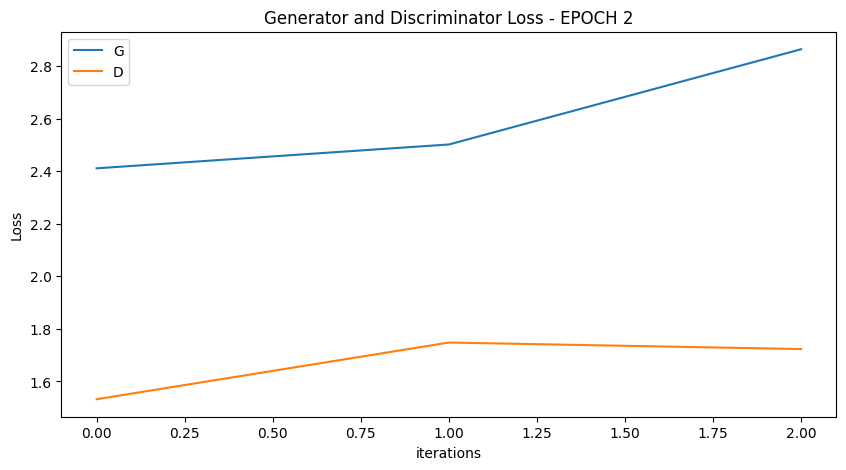

  0%|          | 0/3 [00:00<?, ?it/s]

[4/100][1/3] Loss_D: 1.4909 Loss_G: 3.0504 D(x): 0.4674 D(G(z)): 0.4661 / 0.0351
[4/100][2/3] Loss_D: 1.2326 Loss_G: 3.1764 D(x): 0.5787 D(G(z)): 0.4277 / 0.0302
[4/100][3/3] Loss_D: 1.0934 Loss_G: 3.3090 D(x): 0.5952 D(G(z)): 0.3836 / 0.0260


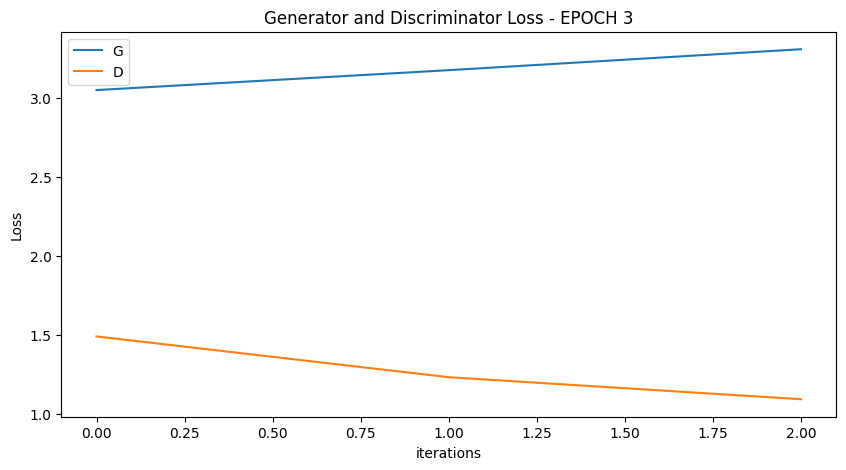

  0%|          | 0/3 [00:00<?, ?it/s]

[5/100][1/3] Loss_D: 1.0935 Loss_G: 3.4319 D(x): 0.6629 D(G(z)): 0.4180 / 0.0227
[5/100][2/3] Loss_D: 1.1739 Loss_G: 3.5273 D(x): 0.5228 D(G(z)): 0.3486 / 0.0202
[5/100][3/3] Loss_D: 0.9662 Loss_G: 3.5375 D(x): 0.6364 D(G(z)): 0.3262 / 0.0201


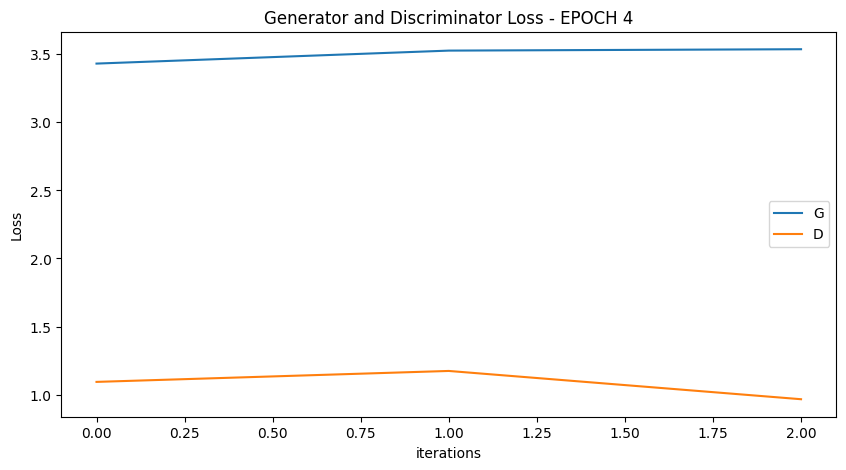

  0%|          | 0/3 [00:00<?, ?it/s]

[6/100][1/3] Loss_D: 0.8932 Loss_G: 3.7484 D(x): 0.6903 D(G(z)): 0.3188 / 0.0159
[6/100][2/3] Loss_D: 1.0171 Loss_G: 3.6626 D(x): 0.5798 D(G(z)): 0.2841 / 0.0174
[6/100][3/3] Loss_D: 0.9413 Loss_G: 3.7388 D(x): 0.6372 D(G(z)): 0.2765 / 0.0159


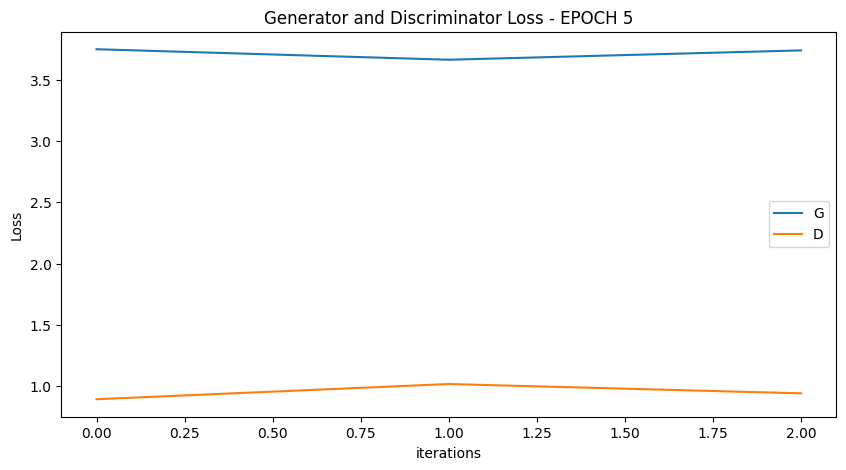

  0%|          | 0/3 [00:00<?, ?it/s]

[7/100][1/3] Loss_D: 0.8028 Loss_G: 3.7272 D(x): 0.6771 D(G(z)): 0.2401 / 0.0161
[7/100][2/3] Loss_D: 0.7361 Loss_G: 3.6850 D(x): 0.6924 D(G(z)): 0.2122 / 0.0169
[7/100][3/3] Loss_D: 0.8328 Loss_G: 3.7805 D(x): 0.6846 D(G(z)): 0.2556 / 0.0151


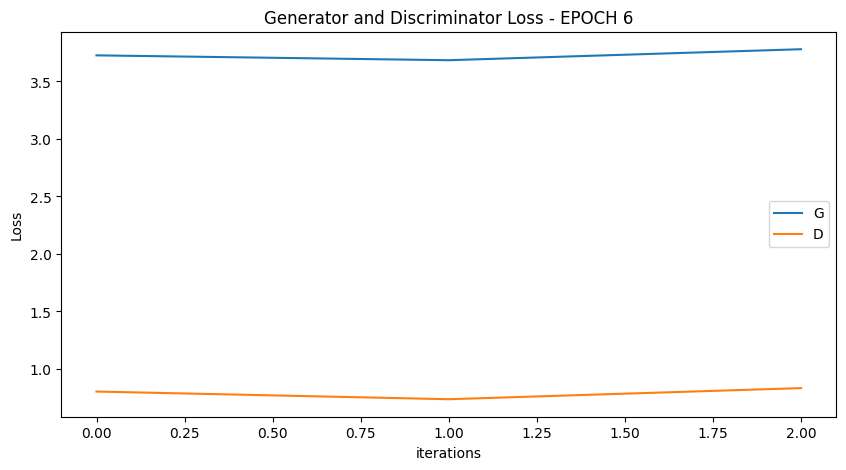

  0%|          | 0/3 [00:00<?, ?it/s]

[8/100][1/3] Loss_D: 0.7487 Loss_G: 3.7831 D(x): 0.6997 D(G(z)): 0.2274 / 0.0151
[8/100][2/3] Loss_D: 0.7604 Loss_G: 3.8331 D(x): 0.7050 D(G(z)): 0.2084 / 0.0144
[8/100][3/3] Loss_D: 0.7973 Loss_G: 3.9297 D(x): 0.6567 D(G(z)): 0.2061 / 0.0128


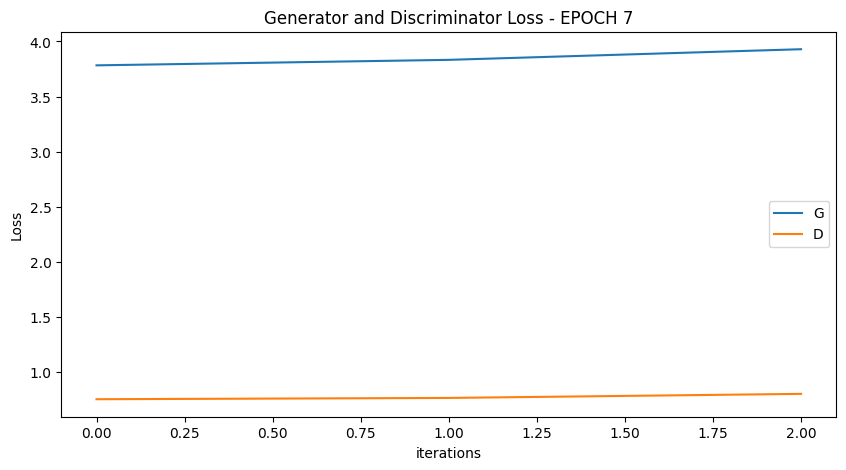

  0%|          | 0/3 [00:00<?, ?it/s]

[9/100][1/3] Loss_D: 0.6789 Loss_G: 3.9183 D(x): 0.7424 D(G(z)): 0.1894 / 0.0130
[9/100][2/3] Loss_D: 0.6893 Loss_G: 3.8768 D(x): 0.7172 D(G(z)): 0.1841 / 0.0138
[9/100][3/3] Loss_D: 0.7988 Loss_G: 3.7137 D(x): 0.5935 D(G(z)): 0.1588 / 0.0163


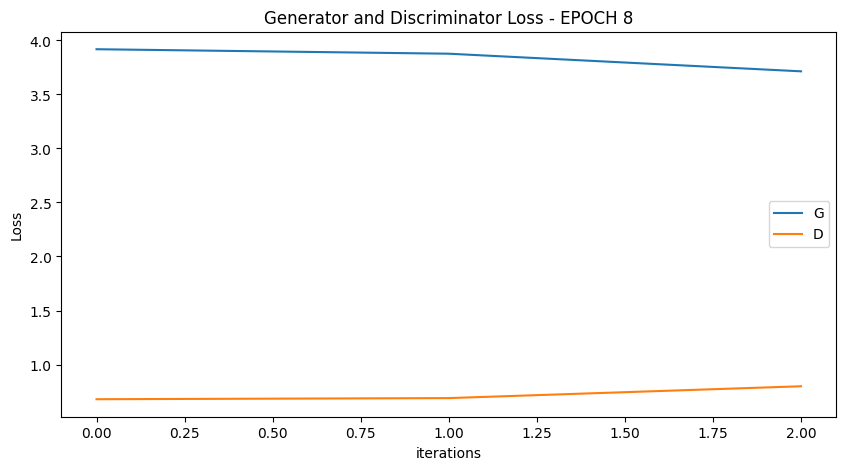

  0%|          | 0/3 [00:00<?, ?it/s]

[10/100][1/3] Loss_D: 0.6942 Loss_G: 3.9135 D(x): 0.7211 D(G(z)): 0.1986 / 0.0130
[10/100][2/3] Loss_D: 0.5865 Loss_G: 3.9277 D(x): 0.7408 D(G(z)): 0.1298 / 0.0129
[10/100][3/3] Loss_D: 0.6438 Loss_G: 4.0808 D(x): 0.7879 D(G(z)): 0.1750 / 0.0109


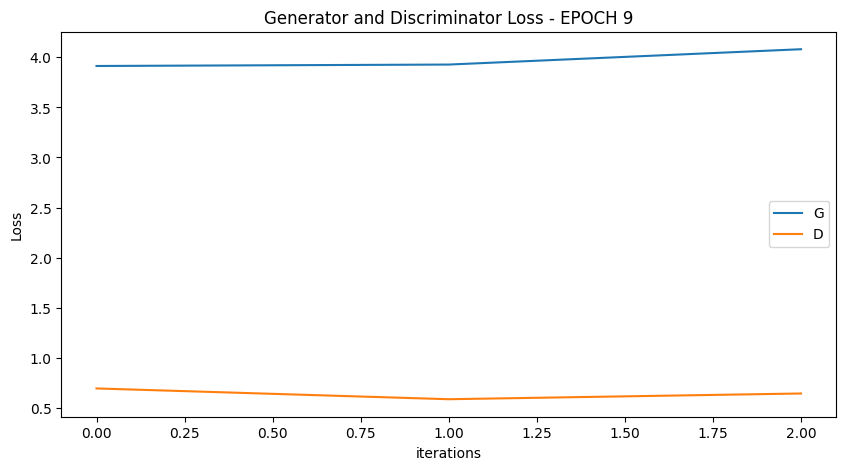

  0%|          | 0/3 [00:00<?, ?it/s]

[11/100][1/3] Loss_D: 0.6244 Loss_G: 4.1053 D(x): 0.7527 D(G(z)): 0.1770 / 0.0105
[11/100][2/3] Loss_D: 0.6566 Loss_G: 3.9095 D(x): 0.7078 D(G(z)): 0.1316 / 0.0131
[11/100][3/3] Loss_D: 0.6124 Loss_G: 3.9383 D(x): 0.7563 D(G(z)): 0.1551 / 0.0128


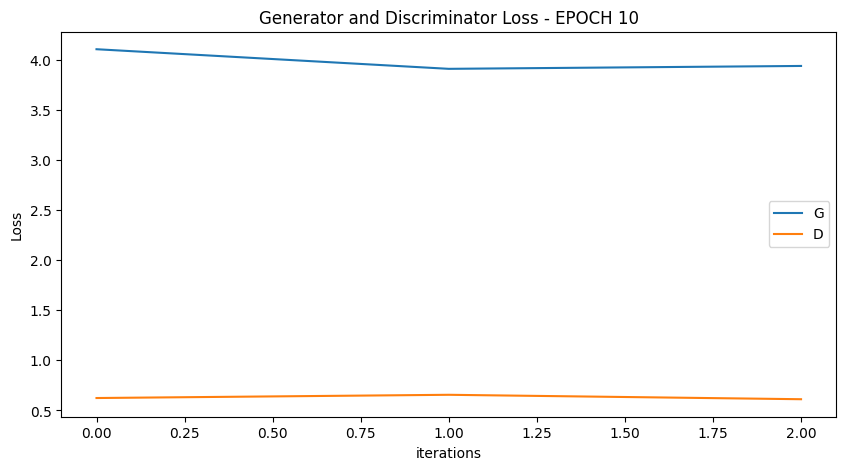

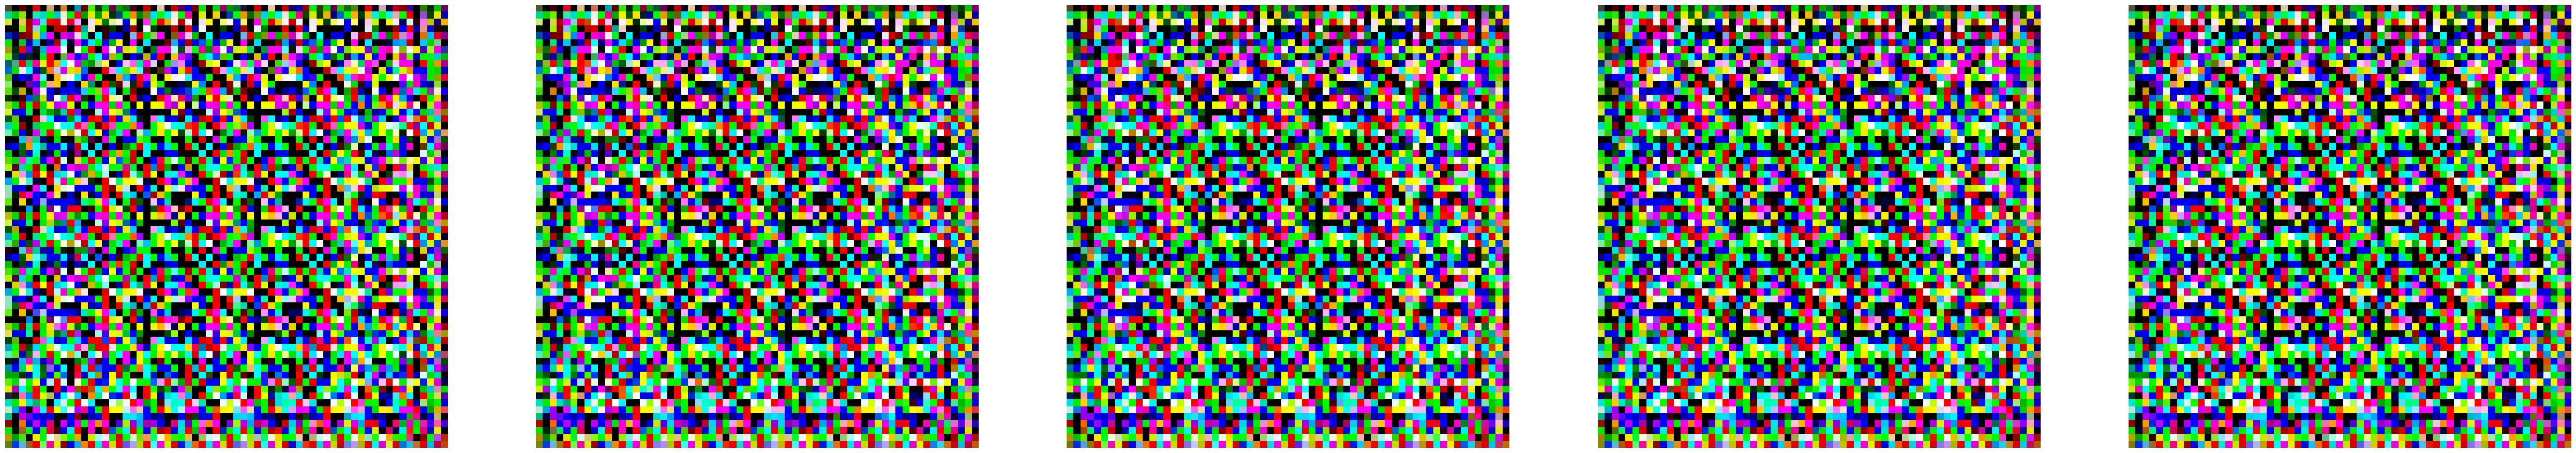

  0%|          | 0/3 [00:00<?, ?it/s]

[12/100][1/3] Loss_D: 0.6035 Loss_G: 3.9405 D(x): 0.7289 D(G(z)): 0.1444 / 0.0126
[12/100][2/3] Loss_D: 0.6529 Loss_G: 4.0273 D(x): 0.7279 D(G(z)): 0.1747 / 0.0115
[12/100][3/3] Loss_D: 0.5289 Loss_G: 4.0634 D(x): 0.8134 D(G(z)): 0.1322 / 0.0111


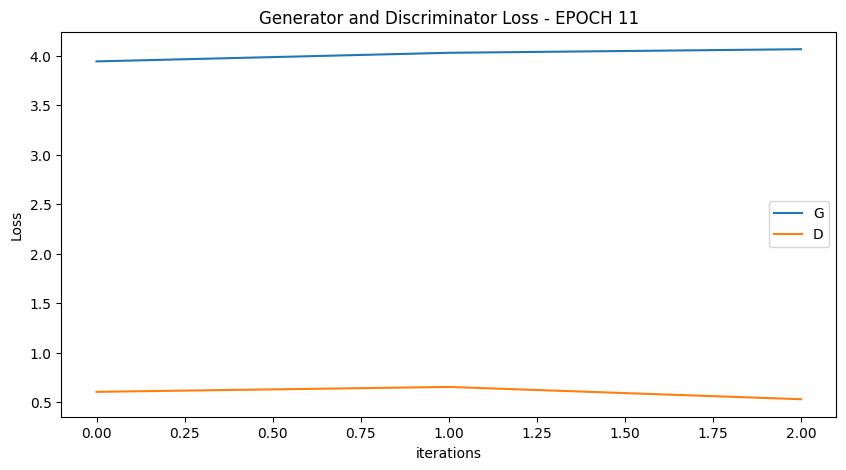

  0%|          | 0/3 [00:00<?, ?it/s]

[13/100][1/3] Loss_D: 0.6067 Loss_G: 3.8308 D(x): 0.7286 D(G(z)): 0.1301 / 0.0143
[13/100][2/3] Loss_D: 0.5611 Loss_G: 3.9489 D(x): 0.8157 D(G(z)): 0.1583 / 0.0126
[13/100][3/3] Loss_D: 0.6219 Loss_G: 3.8335 D(x): 0.6930 D(G(z)): 0.1158 / 0.0143


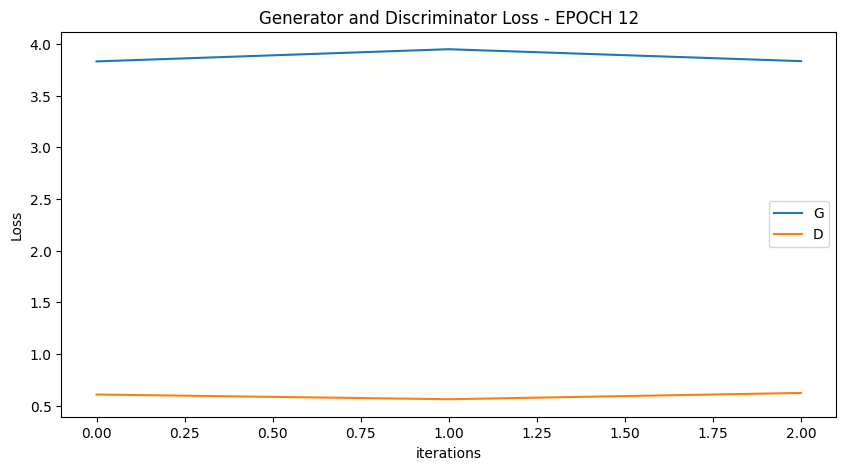

  0%|          | 0/3 [00:00<?, ?it/s]

[14/100][1/3] Loss_D: 0.6179 Loss_G: 3.7861 D(x): 0.7184 D(G(z)): 0.1253 / 0.0152
[14/100][2/3] Loss_D: 0.5668 Loss_G: 3.9545 D(x): 0.7836 D(G(z)): 0.1377 / 0.0125
[14/100][3/3] Loss_D: 0.5233 Loss_G: 4.0925 D(x): 0.8433 D(G(z)): 0.1506 / 0.0107


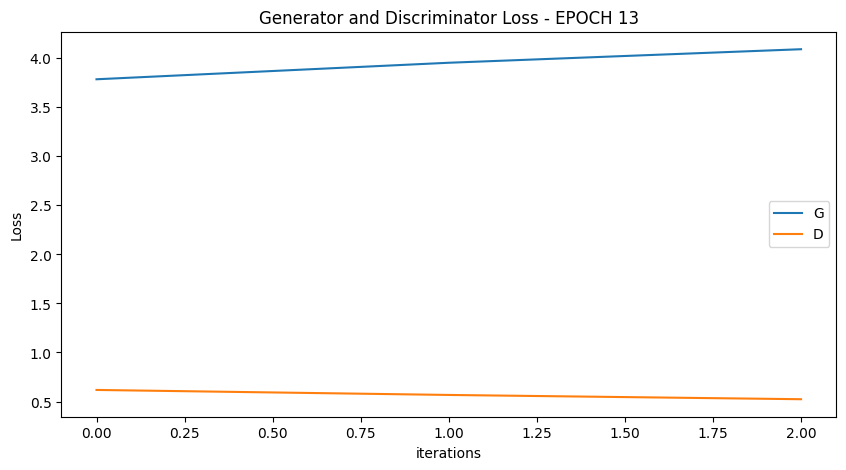

  0%|          | 0/3 [00:00<?, ?it/s]

[15/100][1/3] Loss_D: 0.5476 Loss_G: 3.9017 D(x): 0.7437 D(G(z)): 0.0845 / 0.0132
[15/100][2/3] Loss_D: 0.5160 Loss_G: 3.8338 D(x): 0.8222 D(G(z)): 0.1189 / 0.0143
[15/100][3/3] Loss_D: 0.6239 Loss_G: 3.8721 D(x): 0.7216 D(G(z)): 0.1398 / 0.0137


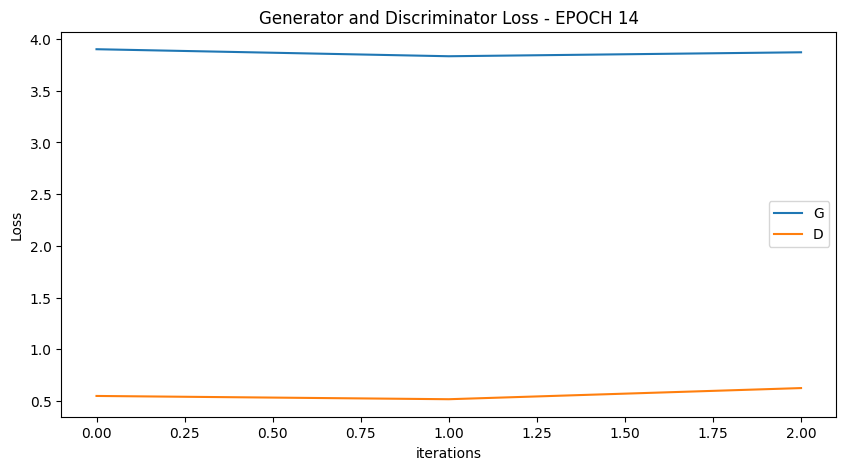

  0%|          | 0/3 [00:00<?, ?it/s]

[16/100][1/3] Loss_D: 0.5021 Loss_G: 3.9215 D(x): 0.7848 D(G(z)): 0.0857 / 0.0129
[16/100][2/3] Loss_D: 0.4911 Loss_G: 3.8265 D(x): 0.7986 D(G(z)): 0.0841 / 0.0144
[16/100][3/3] Loss_D: 0.5117 Loss_G: 3.9361 D(x): 0.7928 D(G(z)): 0.0998 / 0.0128


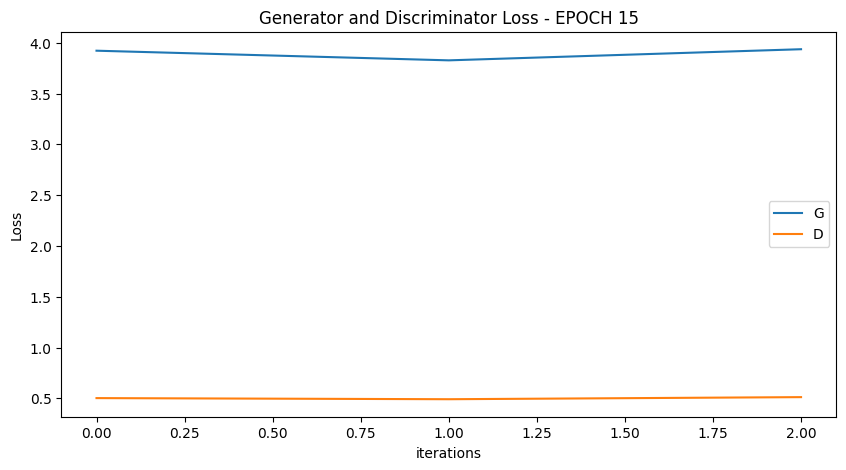

  0%|          | 0/3 [00:00<?, ?it/s]

[17/100][1/3] Loss_D: 0.5554 Loss_G: 3.9867 D(x): 0.7599 D(G(z)): 0.1169 / 0.0121
[17/100][2/3] Loss_D: 0.4914 Loss_G: 4.0869 D(x): 0.8178 D(G(z)): 0.1042 / 0.0108
[17/100][3/3] Loss_D: 0.5343 Loss_G: 4.0211 D(x): 0.7854 D(G(z)): 0.0996 / 0.0116


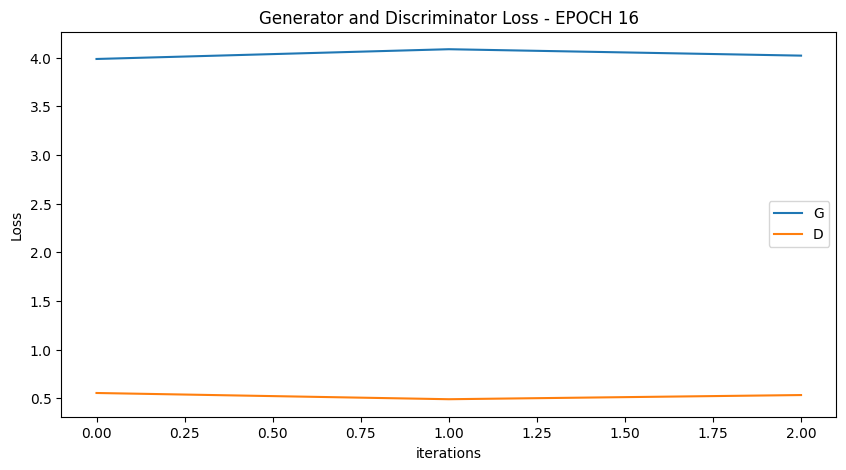

  0%|          | 0/3 [00:00<?, ?it/s]

[18/100][1/3] Loss_D: 0.5139 Loss_G: 4.1442 D(x): 0.8237 D(G(z)): 0.1102 / 0.0102
[18/100][2/3] Loss_D: 0.6257 Loss_G: 3.8430 D(x): 0.6763 D(G(z)): 0.0945 / 0.0142
[18/100][3/3] Loss_D: 0.6128 Loss_G: 4.3555 D(x): 0.7744 D(G(z)): 0.1703 / 0.0081


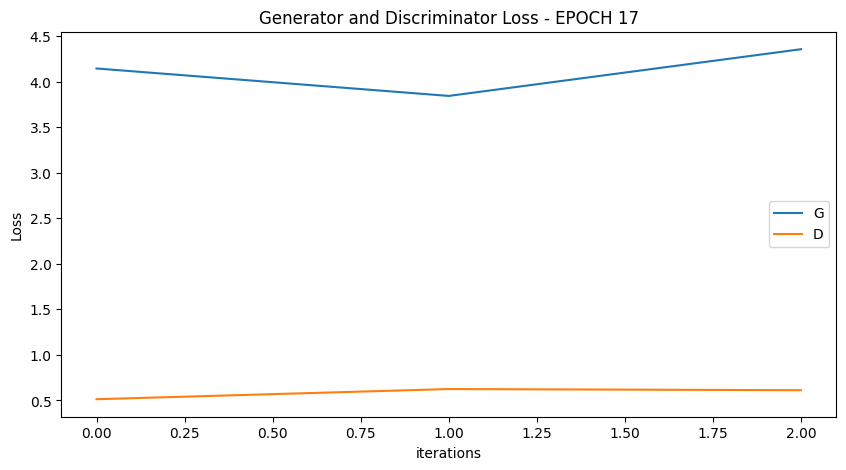

  0%|          | 0/3 [00:00<?, ?it/s]

[19/100][1/3] Loss_D: 0.6108 Loss_G: 4.0749 D(x): 0.7184 D(G(z)): 0.0903 / 0.0109
[19/100][2/3] Loss_D: 0.4835 Loss_G: 4.1694 D(x): 0.8372 D(G(z)): 0.1067 / 0.0100
[19/100][3/3] Loss_D: 0.4879 Loss_G: 3.9907 D(x): 0.7839 D(G(z)): 0.0738 / 0.0122


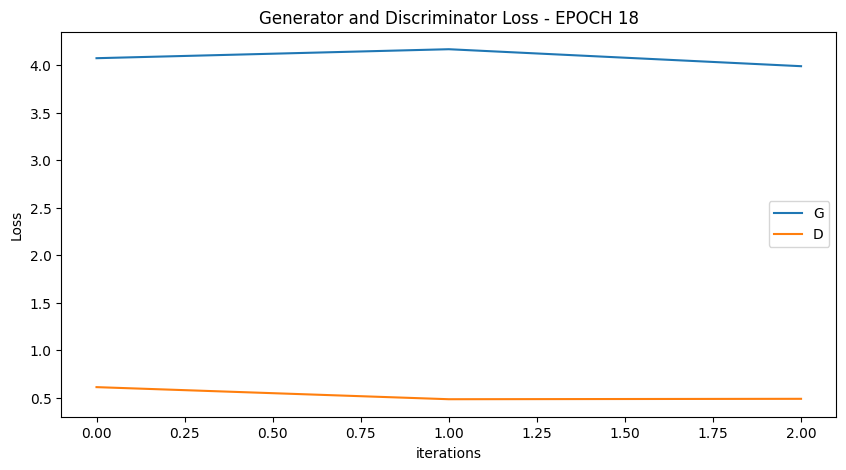

  0%|          | 0/3 [00:00<?, ?it/s]

[20/100][1/3] Loss_D: 0.5428 Loss_G: 3.9705 D(x): 0.7761 D(G(z)): 0.1133 / 0.0124
[20/100][2/3] Loss_D: 0.5314 Loss_G: 4.0284 D(x): 0.7734 D(G(z)): 0.1040 / 0.0117
[20/100][3/3] Loss_D: 0.5535 Loss_G: 3.8947 D(x): 0.7712 D(G(z)): 0.0955 / 0.0133


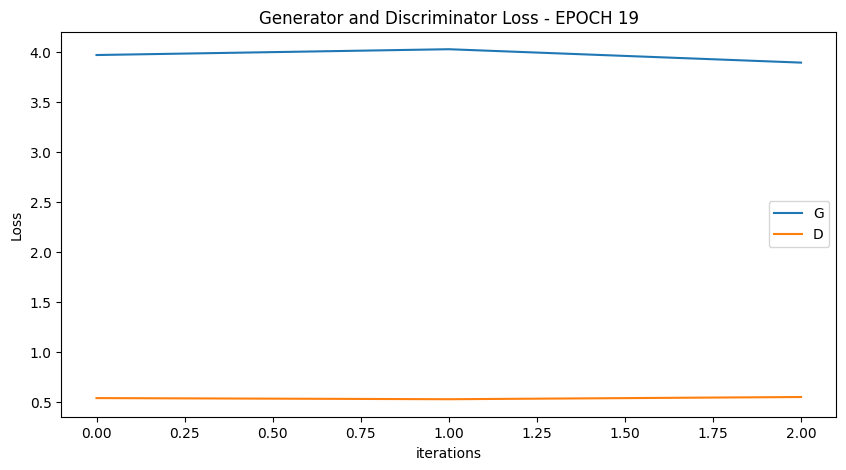

  0%|          | 0/3 [00:00<?, ?it/s]

[21/100][1/3] Loss_D: 0.4961 Loss_G: 3.8595 D(x): 0.8145 D(G(z)): 0.0928 / 0.0140
[21/100][2/3] Loss_D: 0.5777 Loss_G: 3.8055 D(x): 0.7446 D(G(z)): 0.1074 / 0.0148
[21/100][3/3] Loss_D: 0.5820 Loss_G: 3.7076 D(x): 0.7386 D(G(z)): 0.1136 / 0.0167


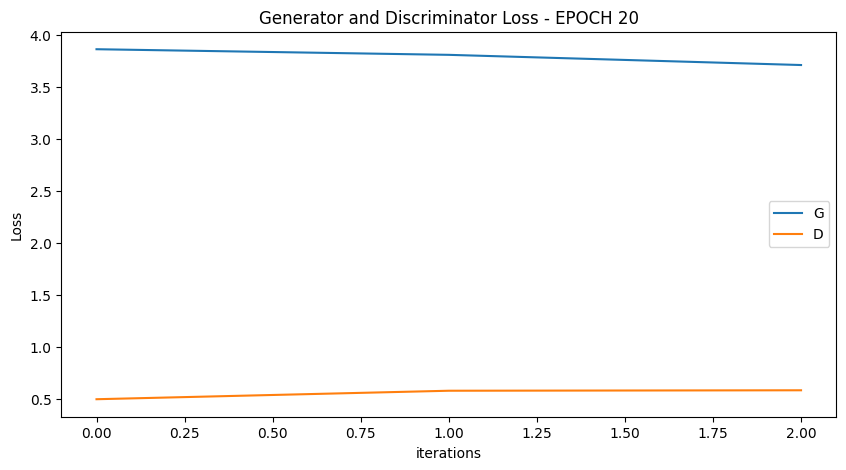

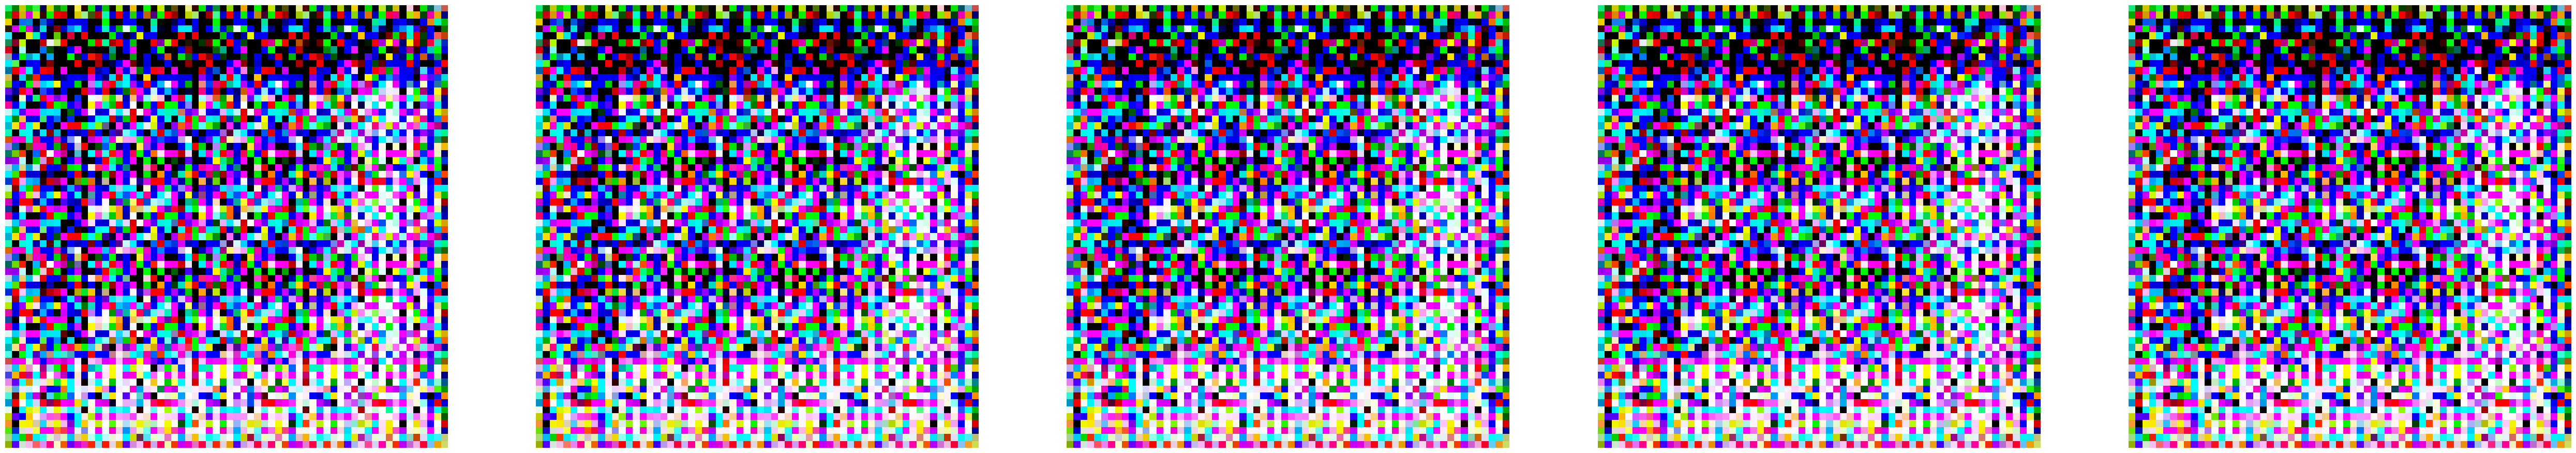

  0%|          | 0/3 [00:00<?, ?it/s]

[22/100][1/3] Loss_D: 0.5744 Loss_G: 4.0198 D(x): 0.7944 D(G(z)): 0.1433 / 0.0117
[22/100][2/3] Loss_D: 0.5660 Loss_G: 3.8611 D(x): 0.7356 D(G(z)): 0.1010 / 0.0141
[22/100][3/3] Loss_D: 0.5527 Loss_G: 3.5746 D(x): 0.7691 D(G(z)): 0.0951 / 0.0193


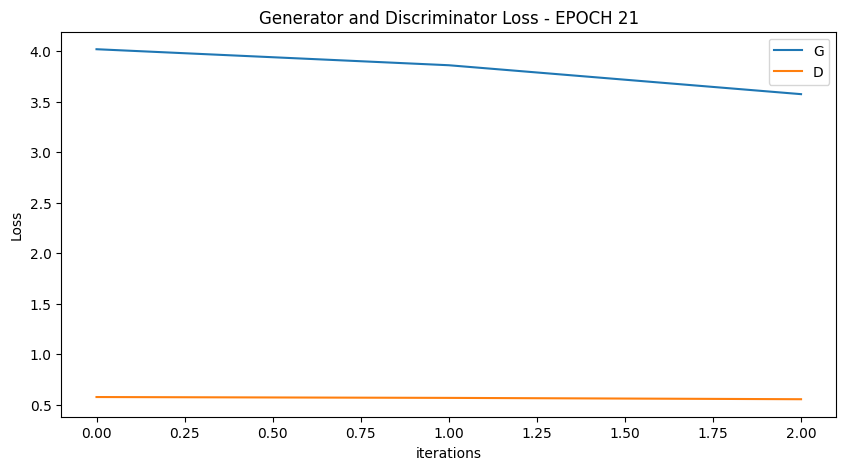

  0%|          | 0/3 [00:00<?, ?it/s]

[23/100][1/3] Loss_D: 0.5291 Loss_G: 3.7822 D(x): 0.8115 D(G(z)): 0.1109 / 0.0155
[23/100][2/3] Loss_D: 0.5701 Loss_G: 3.6835 D(x): 0.7633 D(G(z)): 0.0875 / 0.0179
[23/100][3/3] Loss_D: 0.5456 Loss_G: 3.7568 D(x): 0.7719 D(G(z)): 0.1023 / 0.0163


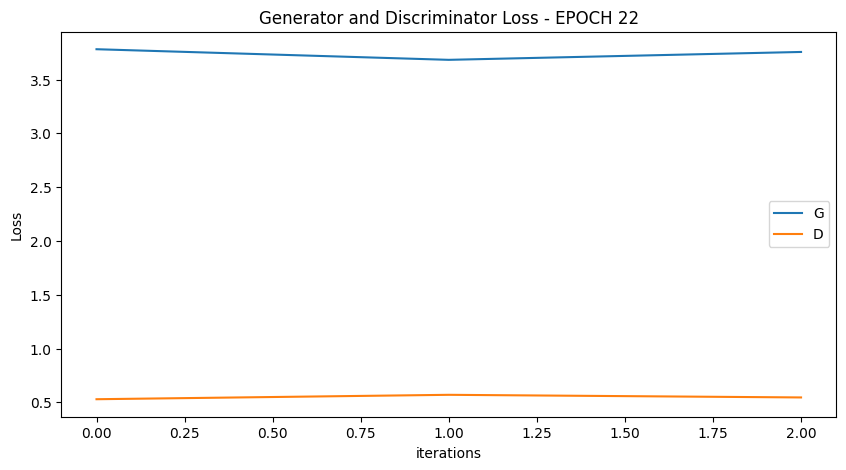

  0%|          | 0/3 [00:00<?, ?it/s]

[24/100][1/3] Loss_D: 0.5280 Loss_G: 4.0865 D(x): 0.8118 D(G(z)): 0.1026 / 0.0126
[24/100][2/3] Loss_D: 0.5184 Loss_G: 3.8802 D(x): 0.8099 D(G(z)): 0.0827 / 0.0157
[24/100][3/3] Loss_D: 0.6223 Loss_G: 3.6869 D(x): 0.7028 D(G(z)): 0.1102 / 0.0188


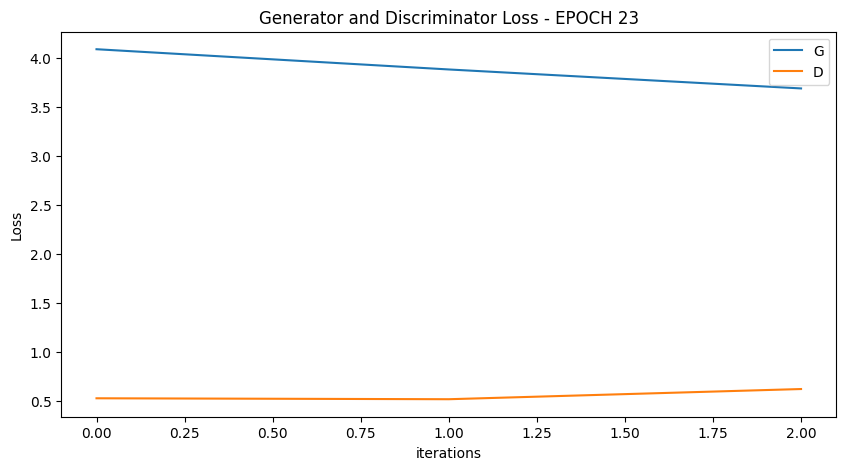

  0%|          | 0/3 [00:00<?, ?it/s]

[25/100][1/3] Loss_D: 0.6522 Loss_G: 4.1667 D(x): 0.7912 D(G(z)): 0.1742 / 0.0108
[25/100][2/3] Loss_D: 0.5505 Loss_G: 4.0631 D(x): 0.7715 D(G(z)): 0.1174 / 0.0128
[25/100][3/3] Loss_D: 0.5934 Loss_G: 3.4122 D(x): 0.7561 D(G(z)): 0.0866 / 0.0256


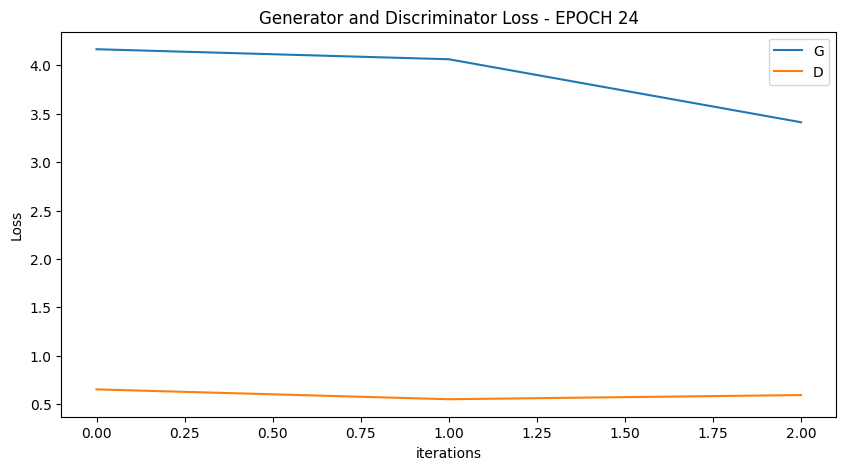

  0%|          | 0/3 [00:00<?, ?it/s]

[26/100][1/3] Loss_D: 0.6309 Loss_G: 4.0407 D(x): 0.8132 D(G(z)): 0.1942 / 0.0137
[26/100][2/3] Loss_D: 0.9024 Loss_G: 3.1324 D(x): 0.6123 D(G(z)): 0.1395 / 0.0380
[26/100][3/3] Loss_D: 1.2570 Loss_G: 6.0019 D(x): 0.7593 D(G(z)): 0.4680 / 0.0015


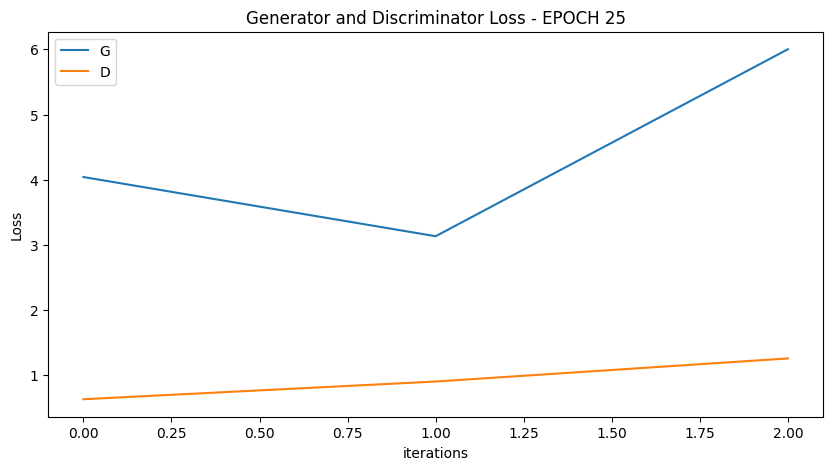

  0%|          | 0/3 [00:00<?, ?it/s]

[27/100][1/3] Loss_D: 1.0373 Loss_G: 3.5942 D(x): 0.4759 D(G(z)): 0.0340 / 0.0280
[27/100][2/3] Loss_D: 1.0717 Loss_G: 3.1973 D(x): 0.6252 D(G(z)): 0.3195 / 0.0318
[27/100][3/3] Loss_D: 1.2182 Loss_G: 4.9349 D(x): 0.6271 D(G(z)): 0.4214 / 0.0047


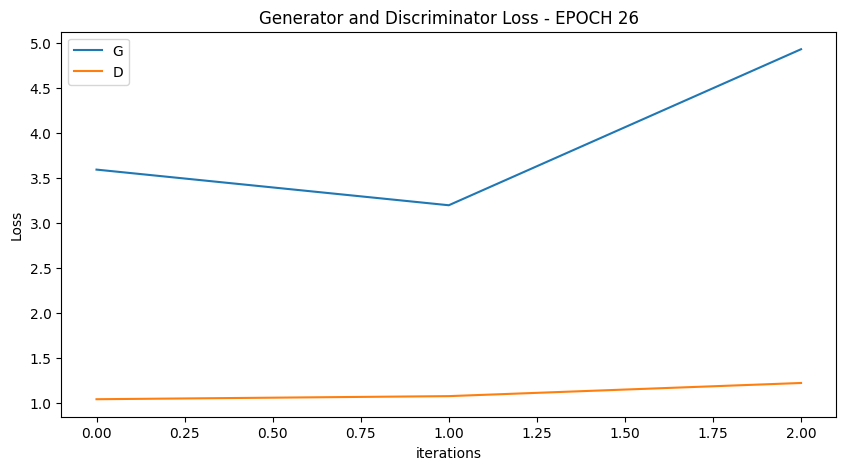

  0%|          | 0/3 [00:00<?, ?it/s]

[28/100][1/3] Loss_D: 1.2758 Loss_G: 2.6380 D(x): 0.4008 D(G(z)): 0.0507 / 0.0622
[28/100][2/3] Loss_D: 1.2514 Loss_G: 2.4300 D(x): 0.5651 D(G(z)): 0.3526 / 0.0741
[28/100][3/3] Loss_D: 0.7687 Loss_G: 3.3297 D(x): 0.7149 D(G(z)): 0.2441 / 0.0275


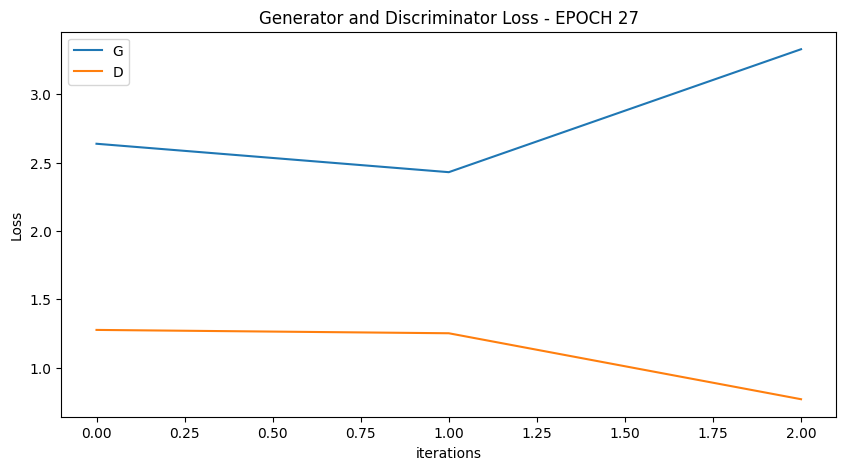

  0%|          | 0/3 [00:00<?, ?it/s]

[29/100][1/3] Loss_D: 0.8107 Loss_G: 2.4840 D(x): 0.5604 D(G(z)): 0.0980 / 0.0714
[29/100][2/3] Loss_D: 0.9039 Loss_G: 2.1549 D(x): 0.6431 D(G(z)): 0.2565 / 0.1097
[29/100][3/3] Loss_D: 0.8482 Loss_G: 2.7405 D(x): 0.6439 D(G(z)): 0.2380 / 0.0570


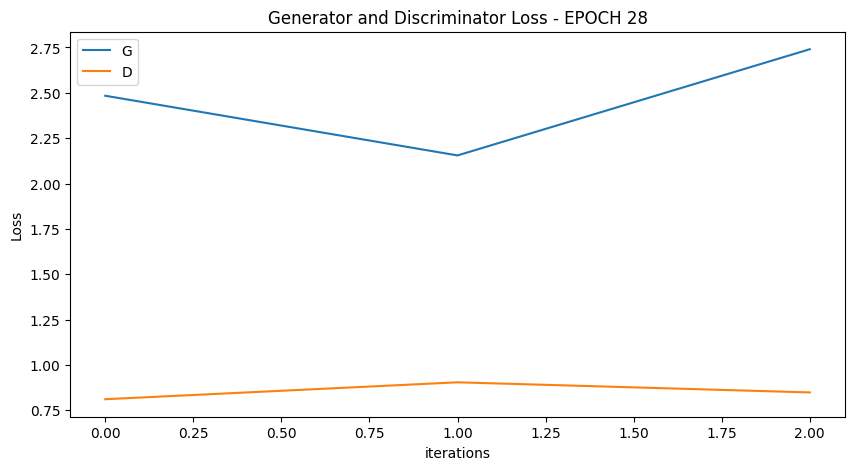

  0%|          | 0/3 [00:00<?, ?it/s]

[30/100][1/3] Loss_D: 0.8974 Loss_G: 1.7811 D(x): 0.5180 D(G(z)): 0.1381 / 0.1617
[30/100][2/3] Loss_D: 0.8018 Loss_G: 2.7314 D(x): 0.7563 D(G(z)): 0.2923 / 0.0532
[30/100][3/3] Loss_D: 0.8110 Loss_G: 2.1641 D(x): 0.5566 D(G(z)): 0.1065 / 0.0999


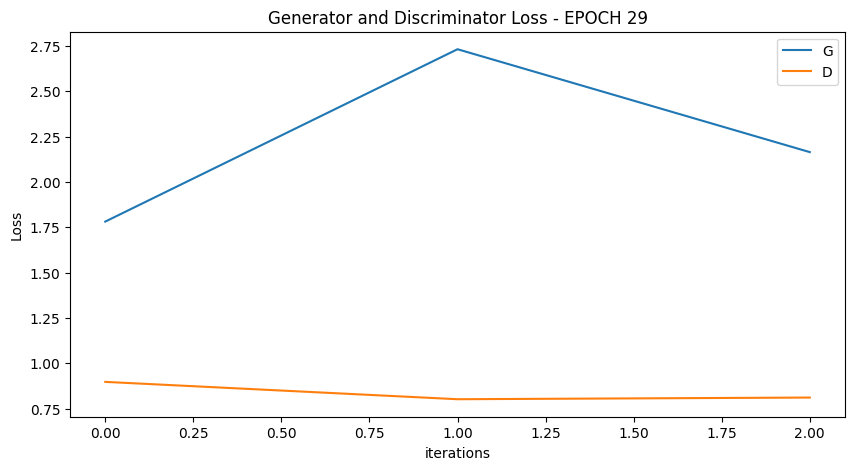

  0%|          | 0/3 [00:00<?, ?it/s]

[31/100][1/3] Loss_D: 0.6937 Loss_G: 2.0945 D(x): 0.6907 D(G(z)): 0.1669 / 0.1076
[31/100][2/3] Loss_D: 0.7599 Loss_G: 2.2899 D(x): 0.6744 D(G(z)): 0.2287 / 0.0834
[31/100][3/3] Loss_D: 0.8766 Loss_G: 2.0120 D(x): 0.6041 D(G(z)): 0.2328 / 0.1154


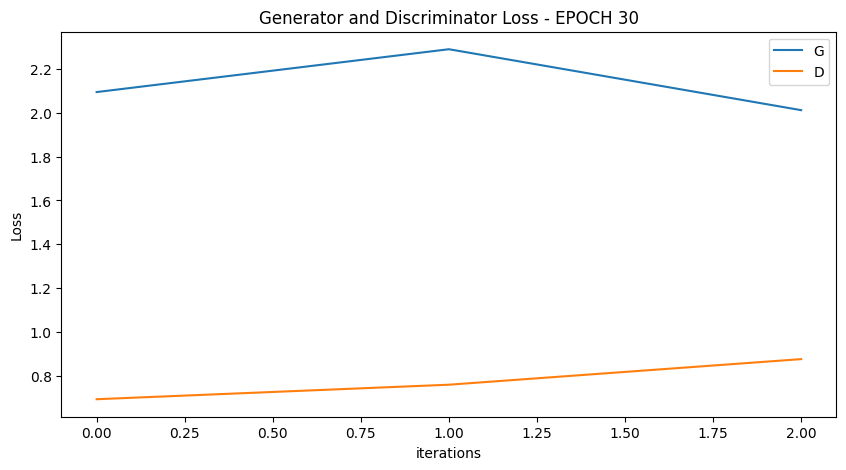

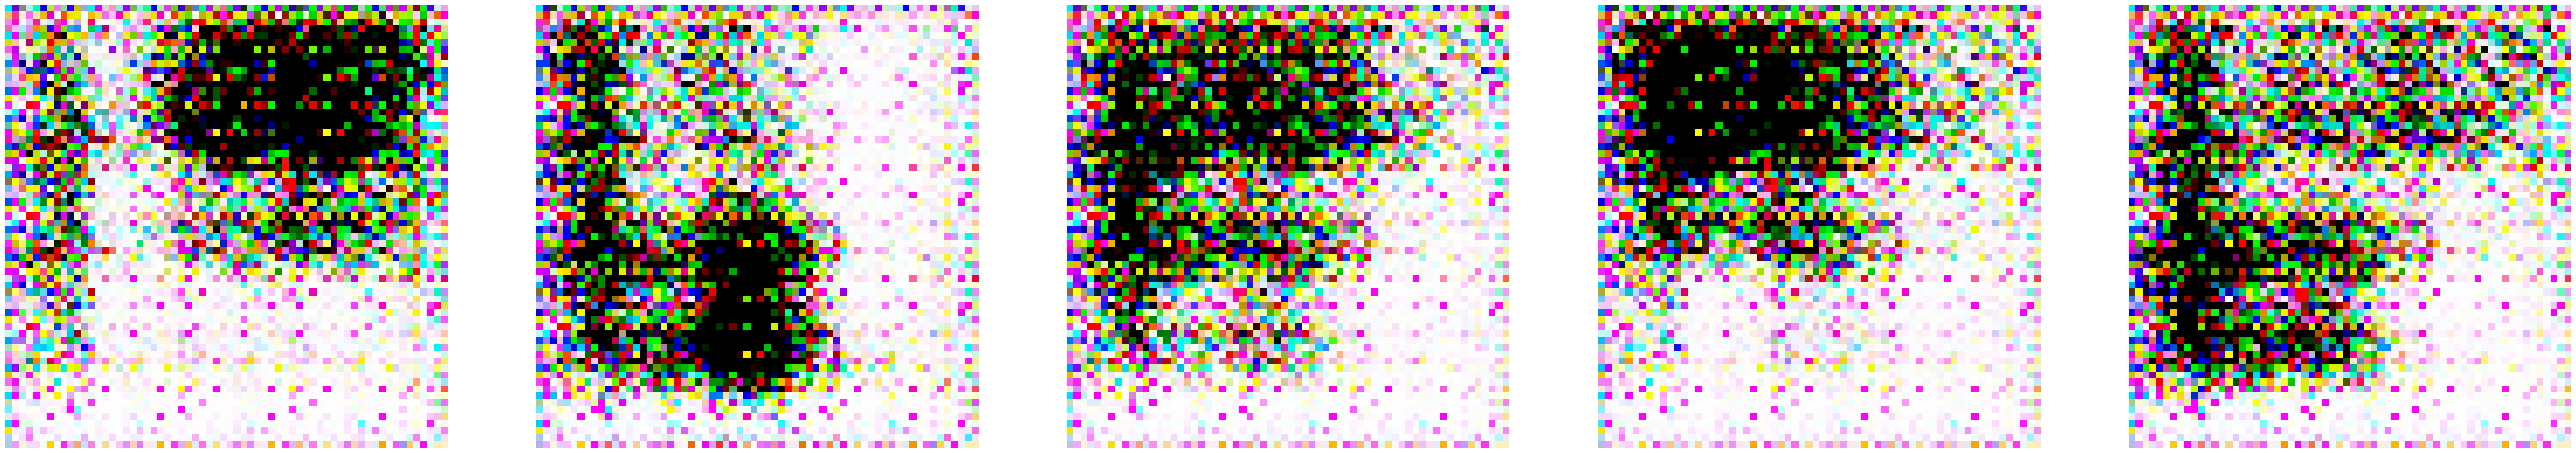

  0%|          | 0/3 [00:00<?, ?it/s]

[32/100][1/3] Loss_D: 0.9247 Loss_G: 2.5819 D(x): 0.6581 D(G(z)): 0.3195 / 0.0601
[32/100][2/3] Loss_D: 0.9092 Loss_G: 1.7959 D(x): 0.4886 D(G(z)): 0.1247 / 0.1453
[32/100][3/3] Loss_D: 0.8061 Loss_G: 1.9562 D(x): 0.6548 D(G(z)): 0.2237 / 0.1185


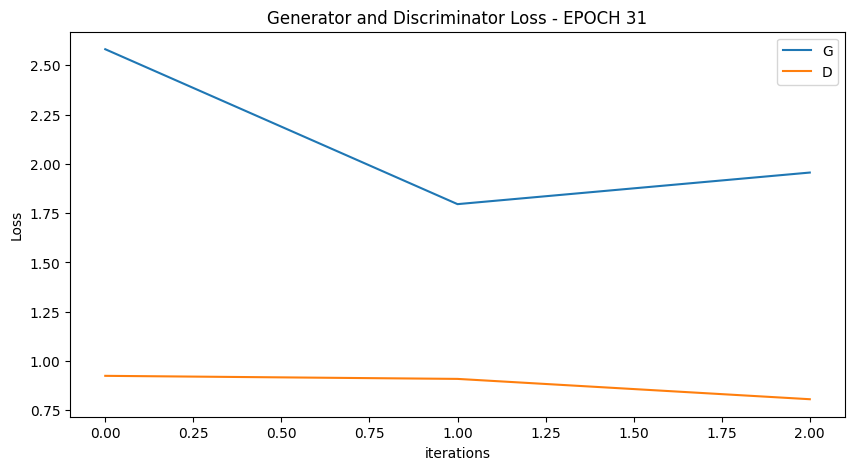

  0%|          | 0/3 [00:00<?, ?it/s]

[33/100][1/3] Loss_D: 0.6294 Loss_G: 2.7154 D(x): 0.7549 D(G(z)): 0.1857 / 0.0511
[33/100][2/3] Loss_D: 0.5722 Loss_G: 2.9708 D(x): 0.7780 D(G(z)): 0.1448 / 0.0392
[33/100][3/3] Loss_D: 0.6619 Loss_G: 2.3966 D(x): 0.6436 D(G(z)): 0.0910 / 0.0803


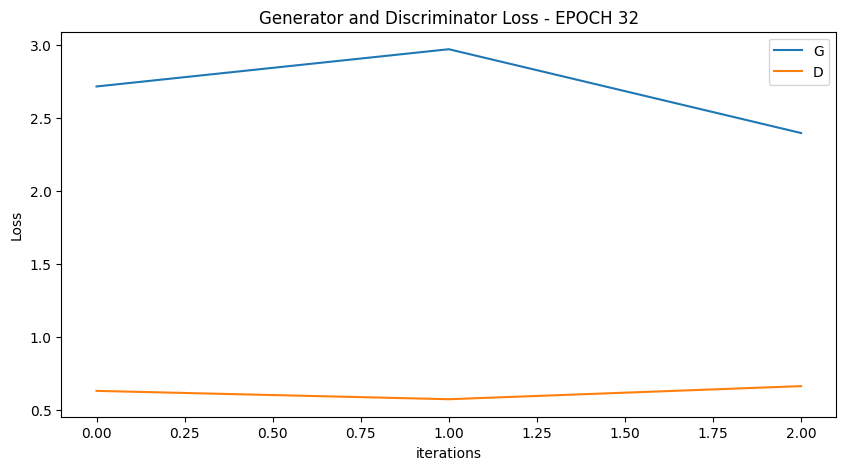

  0%|          | 0/3 [00:00<?, ?it/s]

[34/100][1/3] Loss_D: 0.5948 Loss_G: 2.4412 D(x): 0.7621 D(G(z)): 0.1536 / 0.0743
[34/100][2/3] Loss_D: 0.6422 Loss_G: 2.6414 D(x): 0.7175 D(G(z)): 0.1571 / 0.0584
[34/100][3/3] Loss_D: 0.6218 Loss_G: 2.6794 D(x): 0.7306 D(G(z)): 0.1632 / 0.0543


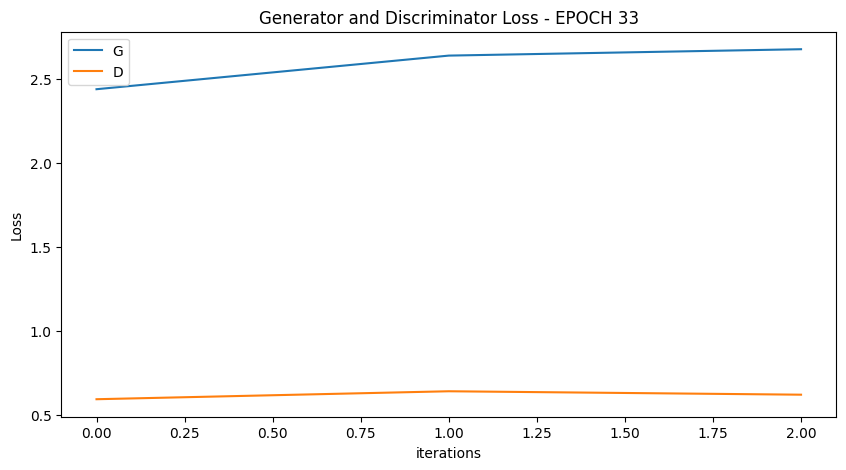

  0%|          | 0/3 [00:00<?, ?it/s]

[35/100][1/3] Loss_D: 0.6464 Loss_G: 2.1368 D(x): 0.6610 D(G(z)): 0.0918 / 0.1001
[35/100][2/3] Loss_D: 0.5709 Loss_G: 2.9143 D(x): 0.7946 D(G(z)): 0.1641 / 0.0421
[35/100][3/3] Loss_D: 0.6902 Loss_G: 1.9313 D(x): 0.6021 D(G(z)): 0.0795 / 0.1282


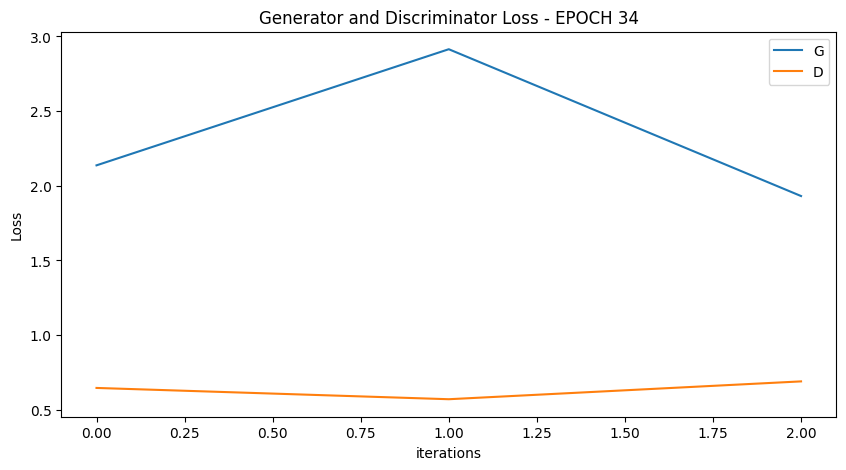

  0%|          | 0/3 [00:00<?, ?it/s]

[36/100][1/3] Loss_D: 0.8264 Loss_G: 3.0179 D(x): 0.7470 D(G(z)): 0.3097 / 0.0385
[36/100][2/3] Loss_D: 0.5537 Loss_G: 2.7688 D(x): 0.7017 D(G(z)): 0.0820 / 0.0490
[36/100][3/3] Loss_D: 0.6218 Loss_G: 1.8793 D(x): 0.6483 D(G(z)): 0.0802 / 0.1330


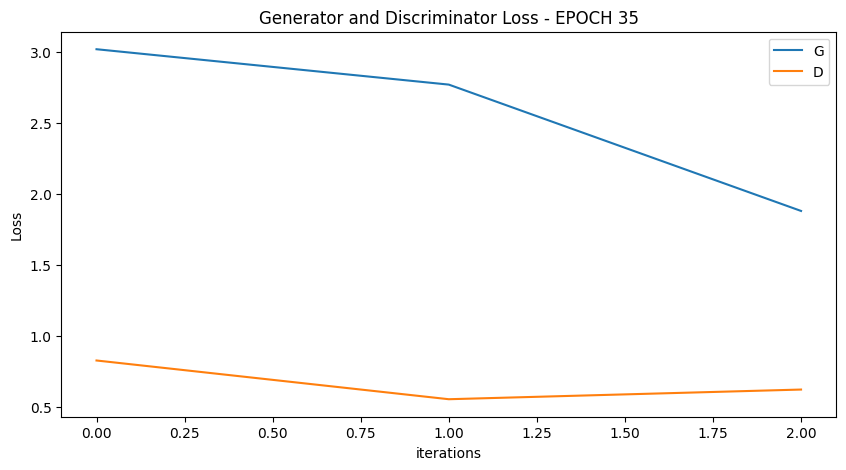

  0%|          | 0/3 [00:00<?, ?it/s]

[37/100][1/3] Loss_D: 0.6310 Loss_G: 2.3410 D(x): 0.7877 D(G(z)): 0.1978 / 0.0775
[37/100][2/3] Loss_D: 0.4832 Loss_G: 2.9653 D(x): 0.7890 D(G(z)): 0.0849 / 0.0427
[37/100][3/3] Loss_D: 0.5557 Loss_G: 2.4776 D(x): 0.7155 D(G(z)): 0.0710 / 0.0731


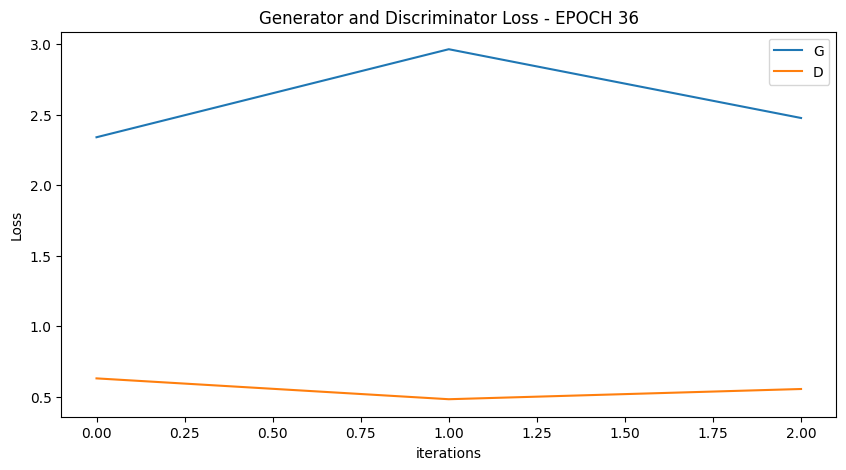

  0%|          | 0/3 [00:00<?, ?it/s]

[38/100][1/3] Loss_D: 0.5366 Loss_G: 2.7396 D(x): 0.8146 D(G(z)): 0.1461 / 0.0523
[38/100][2/3] Loss_D: 0.4930 Loss_G: 2.7995 D(x): 0.7557 D(G(z)): 0.0712 / 0.0505
[38/100][3/3] Loss_D: 0.5193 Loss_G: 2.5864 D(x): 0.7615 D(G(z)): 0.0958 / 0.0631


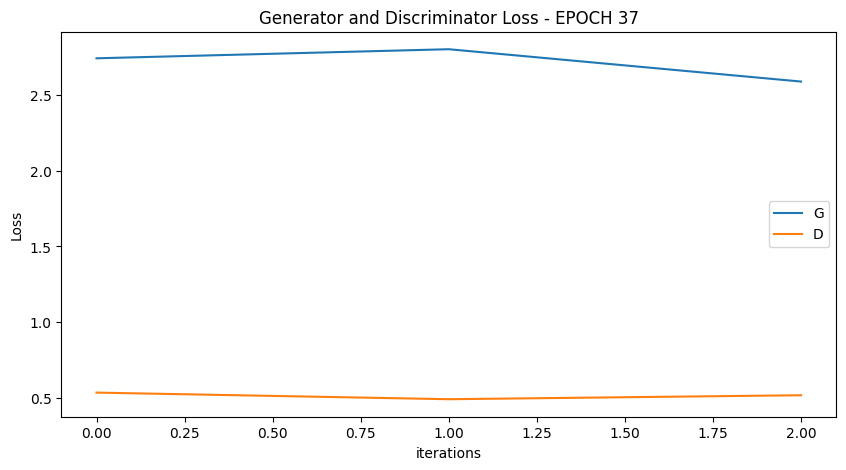

  0%|          | 0/3 [00:00<?, ?it/s]

[39/100][1/3] Loss_D: 0.5463 Loss_G: 2.3801 D(x): 0.7250 D(G(z)): 0.0863 / 0.0785
[39/100][2/3] Loss_D: 0.5568 Loss_G: 3.4658 D(x): 0.8967 D(G(z)): 0.1877 / 0.0225
[39/100][3/3] Loss_D: 0.7326 Loss_G: 2.0484 D(x): 0.5373 D(G(z)): 0.0456 / 0.1088


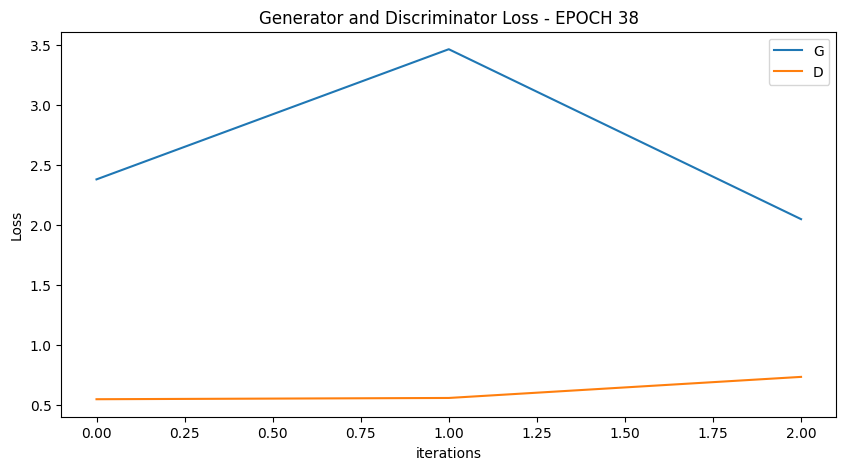

  0%|          | 0/3 [00:00<?, ?it/s]

[40/100][1/3] Loss_D: 0.4875 Loss_G: 2.2341 D(x): 0.8408 D(G(z)): 0.1097 / 0.0905
[40/100][2/3] Loss_D: 0.6194 Loss_G: 4.0198 D(x): 0.8919 D(G(z)): 0.2311 / 0.0127
[40/100][3/3] Loss_D: 0.5511 Loss_G: 3.1352 D(x): 0.6641 D(G(z)): 0.0370 / 0.0341


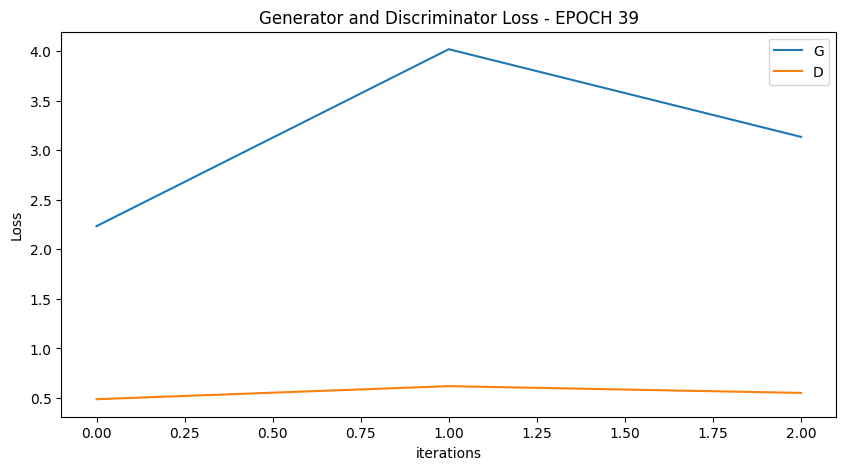

  0%|          | 0/3 [00:00<?, ?it/s]

[41/100][1/3] Loss_D: 0.5680 Loss_G: 2.2666 D(x): 0.6971 D(G(z)): 0.0863 / 0.0876
[41/100][2/3] Loss_D: 0.5258 Loss_G: 2.7062 D(x): 0.8750 D(G(z)): 0.1593 / 0.0531
[41/100][3/3] Loss_D: 0.4848 Loss_G: 2.8313 D(x): 0.7878 D(G(z)): 0.0846 / 0.0457


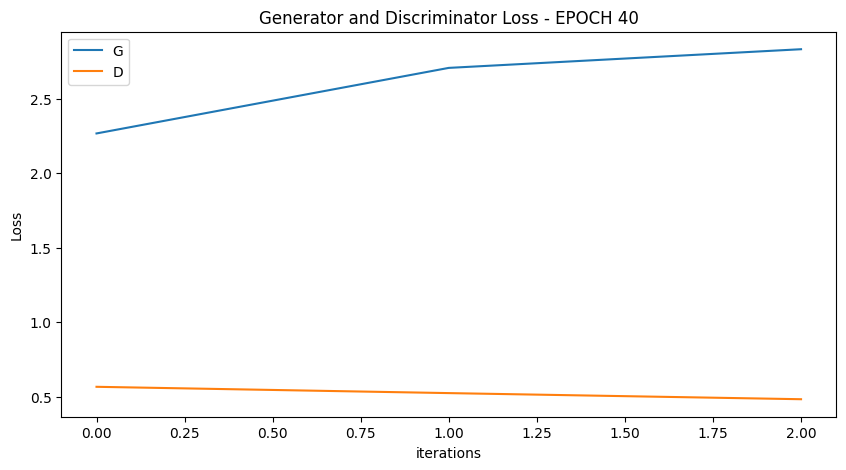

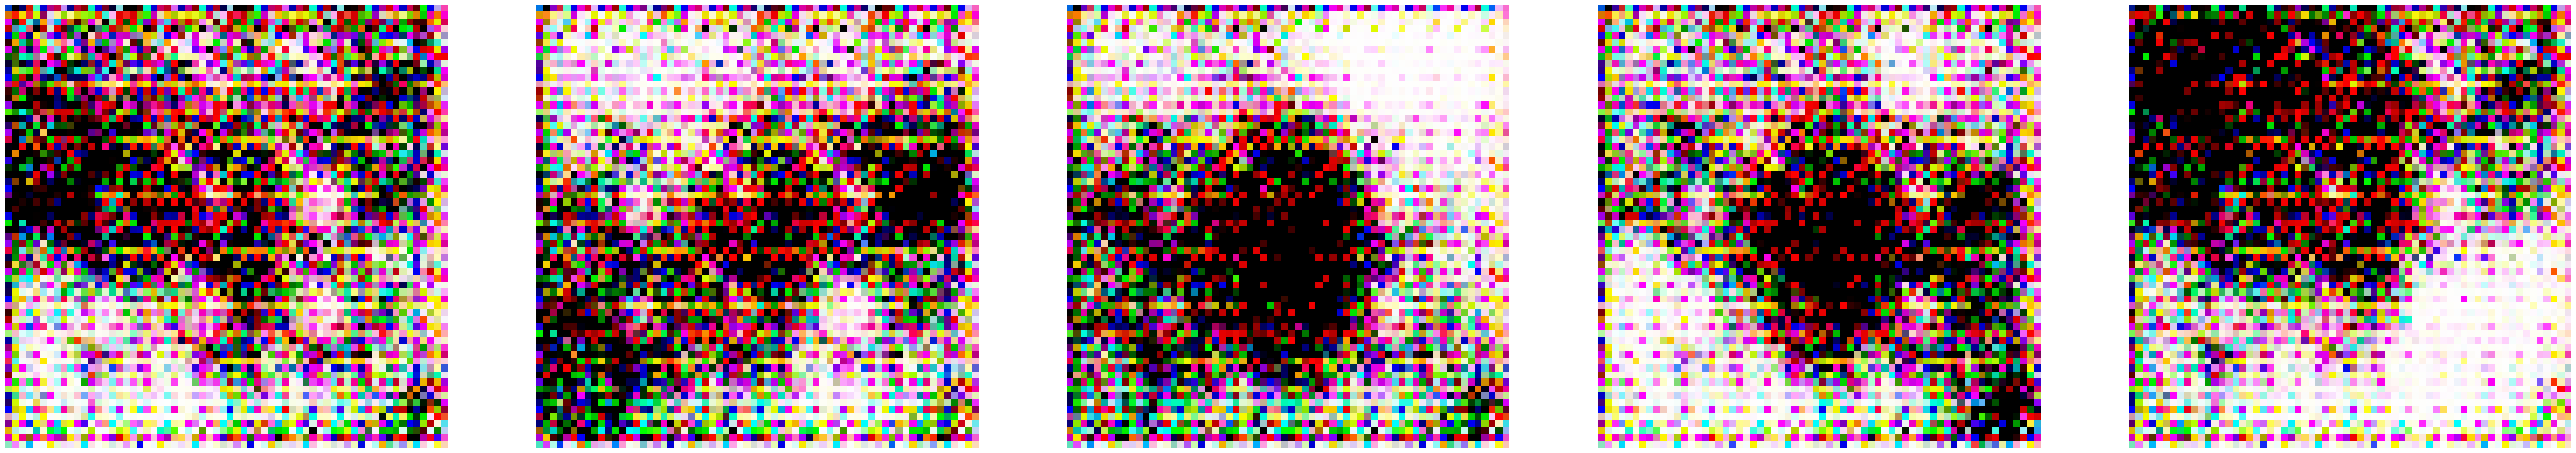

  0%|          | 0/3 [00:00<?, ?it/s]

[42/100][1/3] Loss_D: 0.4275 Loss_G: 3.3597 D(x): 0.7610 D(G(z)): 0.0159 / 0.0327
[42/100][2/3] Loss_D: 0.4819 Loss_G: 3.9562 D(x): 0.8951 D(G(z)): 0.1137 / 0.0129
[42/100][3/3] Loss_D: 0.5268 Loss_G: 3.5912 D(x): 0.7732 D(G(z)): 0.0995 / 0.0197


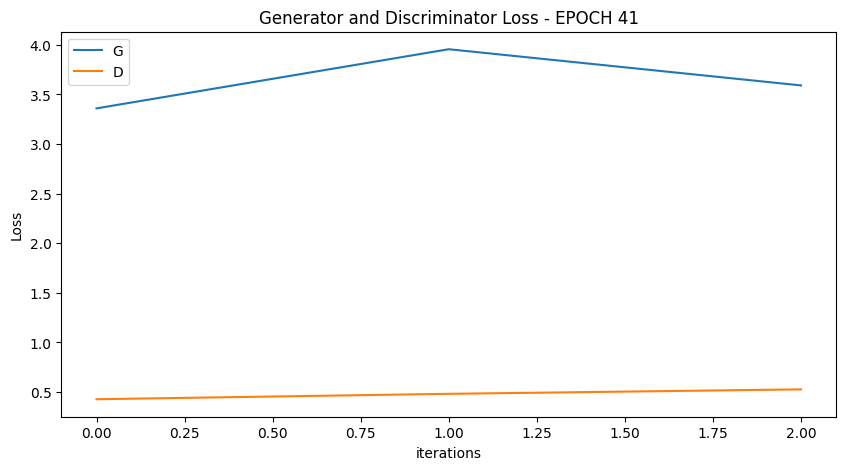

  0%|          | 0/3 [00:00<?, ?it/s]

[43/100][1/3] Loss_D: 0.5601 Loss_G: 2.4793 D(x): 0.6485 D(G(z)): 0.0300 / 0.0689
[43/100][2/3] Loss_D: 0.4794 Loss_G: 2.5899 D(x): 0.8526 D(G(z)): 0.1022 / 0.0633
[43/100][3/3] Loss_D: 0.4518 Loss_G: 2.7918 D(x): 0.7969 D(G(z)): 0.0620 / 0.0509


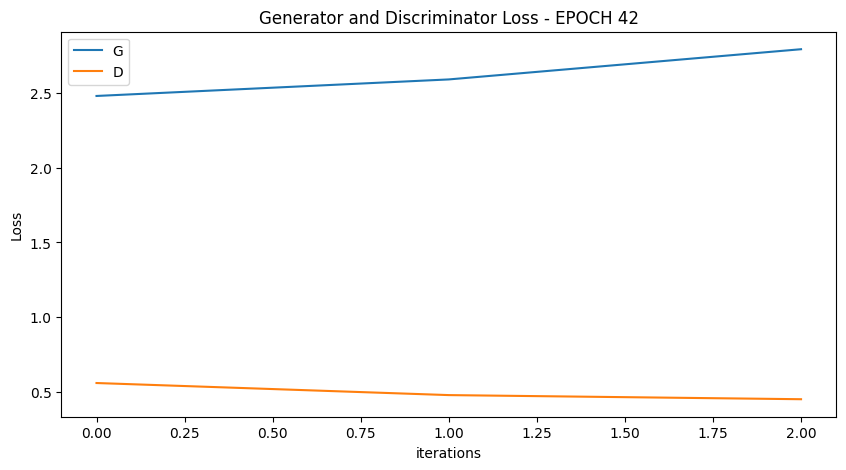

  0%|          | 0/3 [00:00<?, ?it/s]

[44/100][1/3] Loss_D: 0.5711 Loss_G: 3.0902 D(x): 0.8349 D(G(z)): 0.1822 / 0.0344
[44/100][2/3] Loss_D: 0.5013 Loss_G: 3.2505 D(x): 0.6937 D(G(z)): 0.0254 / 0.0283
[44/100][3/3] Loss_D: 0.4179 Loss_G: 2.6604 D(x): 0.8308 D(G(z)): 0.0523 / 0.0559


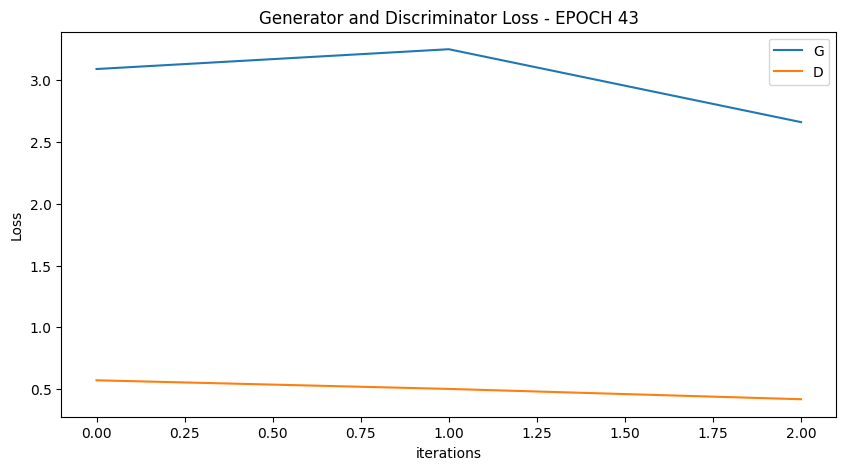

  0%|          | 0/3 [00:00<?, ?it/s]

[45/100][1/3] Loss_D: 0.4011 Loss_G: 3.1427 D(x): 0.8919 D(G(z)): 0.0558 / 0.0313
[45/100][2/3] Loss_D: 0.7231 Loss_G: 4.0487 D(x): 0.8096 D(G(z)): 0.2715 / 0.0126
[45/100][3/3] Loss_D: 1.1157 Loss_G: 1.5831 D(x): 0.3509 D(G(z)): 0.0225 / 0.2022


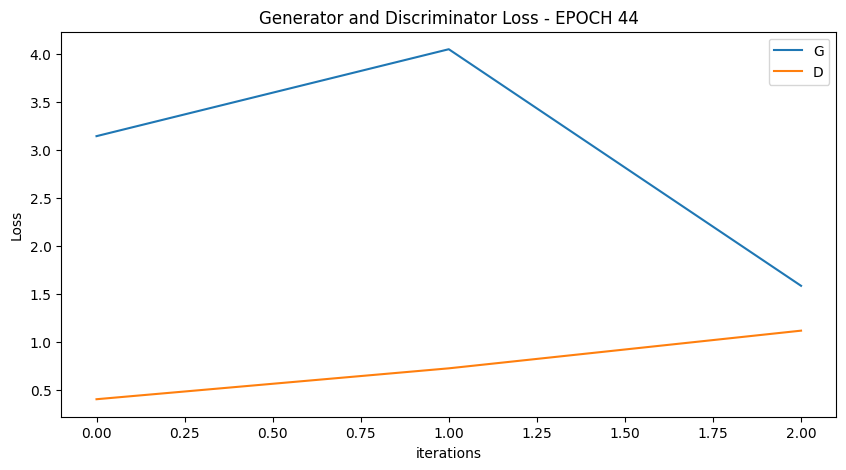

  0%|          | 0/3 [00:00<?, ?it/s]

[46/100][1/3] Loss_D: 1.1228 Loss_G: 4.5065 D(x): 0.9325 D(G(z)): 0.5043 / 0.0077
[46/100][2/3] Loss_D: 0.8015 Loss_G: 3.3124 D(x): 0.5209 D(G(z)): 0.0187 / 0.0294
[46/100][3/3] Loss_D: 0.7819 Loss_G: 2.0888 D(x): 0.5492 D(G(z)): 0.0821 / 0.1122


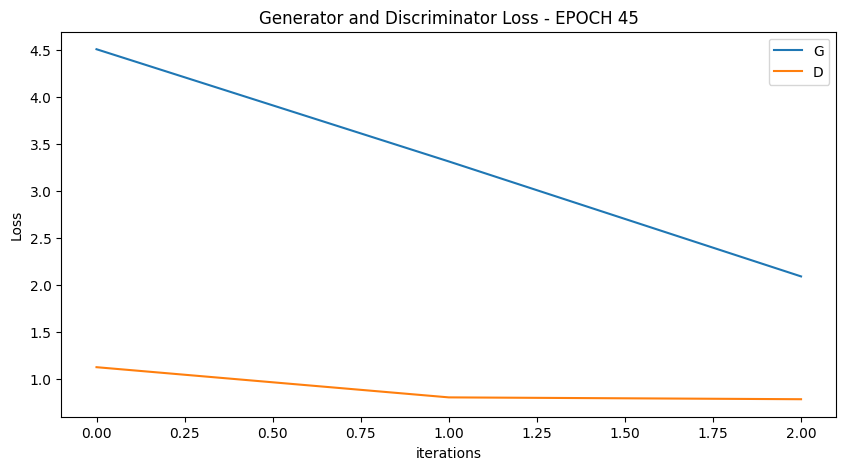

  0%|          | 0/3 [00:00<?, ?it/s]

[47/100][1/3] Loss_D: 0.6522 Loss_G: 2.6880 D(x): 0.9192 D(G(z)): 0.2590 / 0.0631
[47/100][2/3] Loss_D: 0.4783 Loss_G: 3.1086 D(x): 0.7855 D(G(z)): 0.0571 / 0.0396
[47/100][3/3] Loss_D: 0.4119 Loss_G: 3.9532 D(x): 0.8530 D(G(z)): 0.0160 / 0.0169


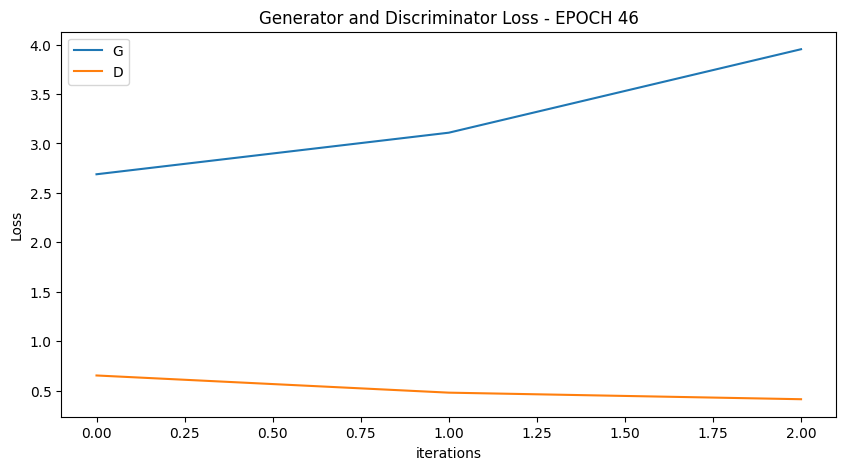

  0%|          | 0/3 [00:00<?, ?it/s]

[48/100][1/3] Loss_D: 0.5804 Loss_G: 4.5298 D(x): 0.9182 D(G(z)): 0.1871 / 0.0075
[48/100][2/3] Loss_D: 0.5260 Loss_G: 3.3890 D(x): 0.7019 D(G(z)): 0.0439 / 0.0257
[48/100][3/3] Loss_D: 0.6279 Loss_G: 2.4135 D(x): 0.6628 D(G(z)): 0.0912 / 0.0812


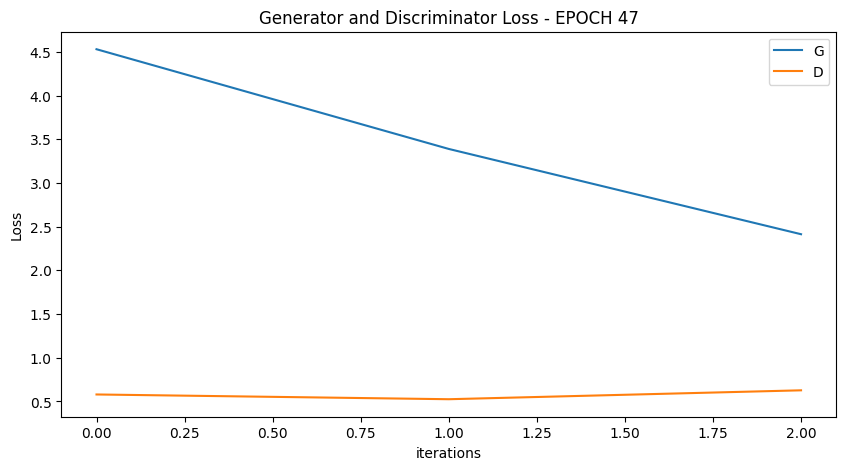

  0%|          | 0/3 [00:00<?, ?it/s]

[49/100][1/3] Loss_D: 0.5234 Loss_G: 2.2875 D(x): 0.7424 D(G(z)): 0.0797 / 0.0889
[49/100][2/3] Loss_D: 0.3764 Loss_G: 3.7437 D(x): 0.8667 D(G(z)): 0.0228 / 0.0233
[49/100][3/3] Loss_D: 0.5193 Loss_G: 3.2627 D(x): 0.9094 D(G(z)): 0.1530 / 0.0306


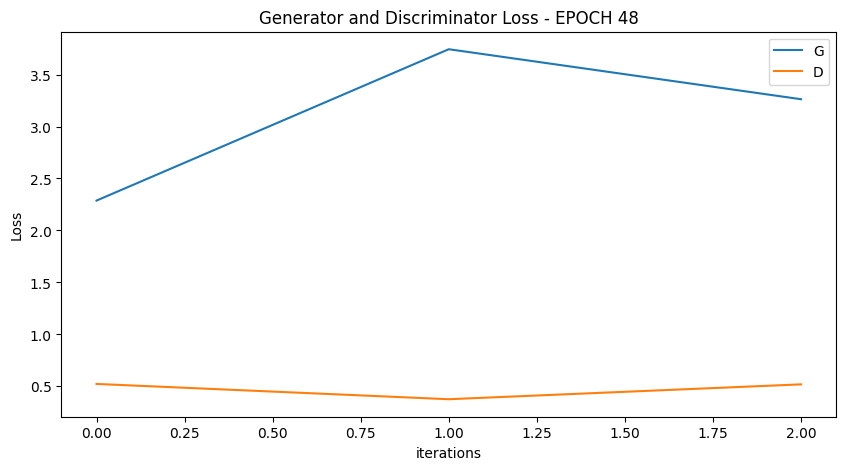

  0%|          | 0/3 [00:00<?, ?it/s]

[50/100][1/3] Loss_D: 0.4100 Loss_G: 4.1440 D(x): 0.7798 D(G(z)): 0.0155 / 0.0130
[50/100][2/3] Loss_D: 0.4119 Loss_G: 3.0612 D(x): 0.8759 D(G(z)): 0.0639 / 0.0375
[50/100][3/3] Loss_D: 0.4222 Loss_G: 3.1443 D(x): 0.8003 D(G(z)): 0.0403 / 0.0337


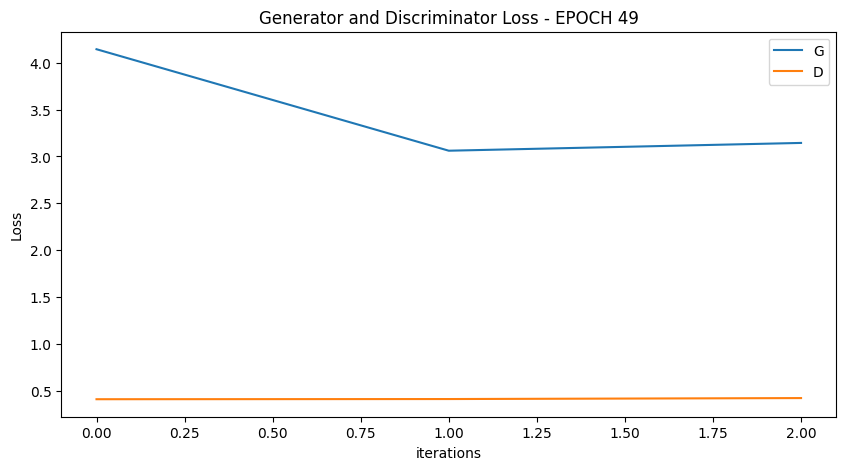

  0%|          | 0/3 [00:00<?, ?it/s]

[51/100][1/3] Loss_D: 0.3881 Loss_G: 3.5263 D(x): 0.8120 D(G(z)): 0.0152 / 0.0222
[51/100][2/3] Loss_D: 0.4586 Loss_G: 2.9923 D(x): 0.8662 D(G(z)): 0.1057 / 0.0407
[51/100][3/3] Loss_D: 0.5598 Loss_G: 3.4880 D(x): 0.8585 D(G(z)): 0.1792 / 0.0284


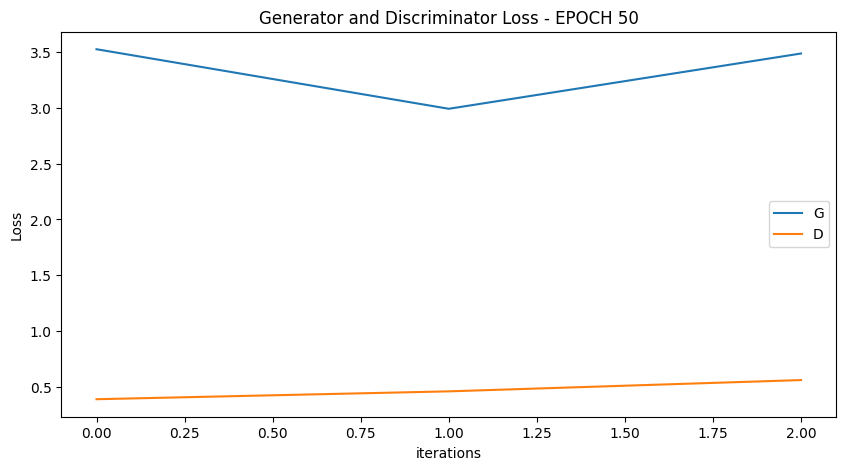

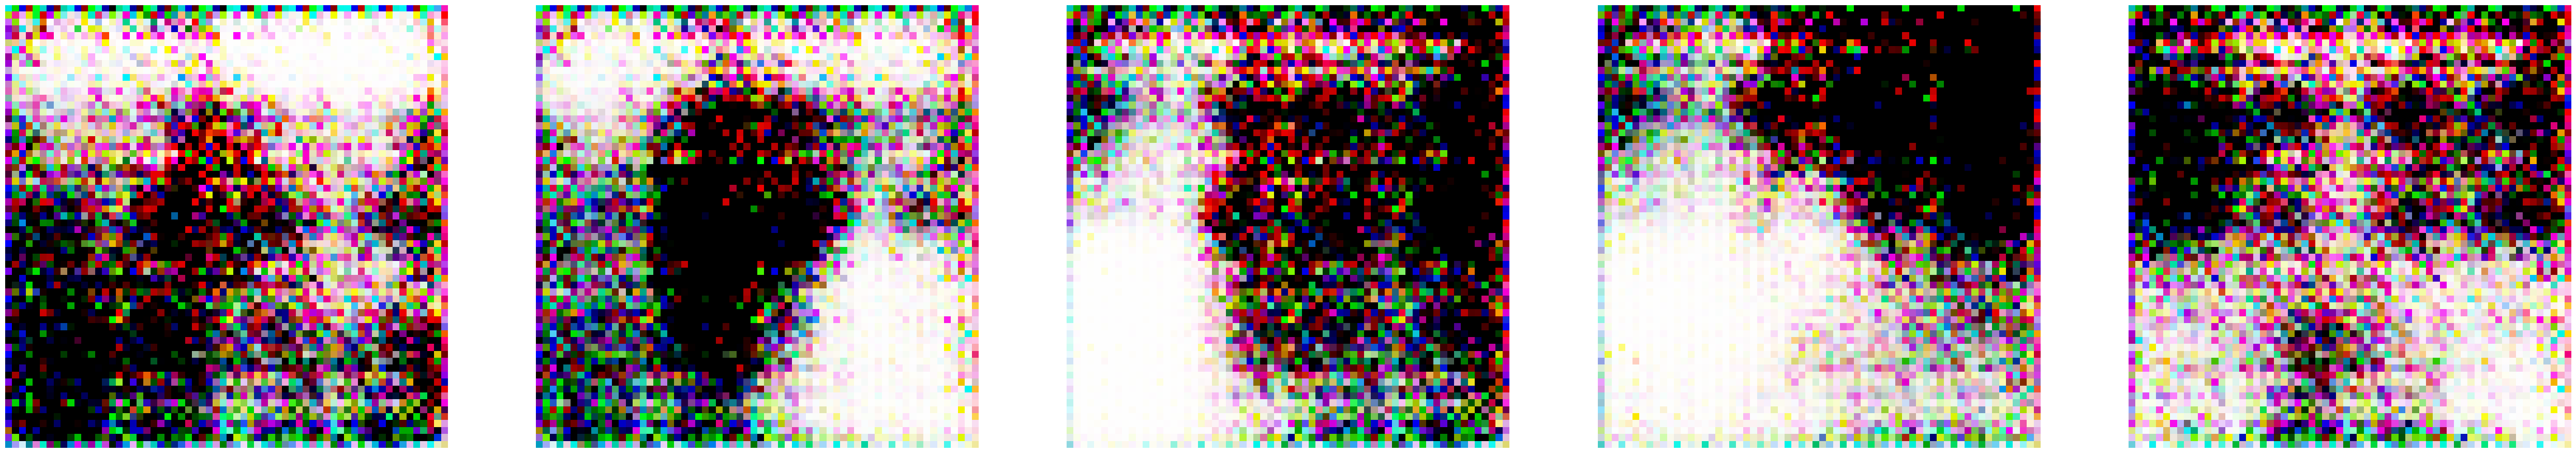

  0%|          | 0/3 [00:00<?, ?it/s]

[52/100][1/3] Loss_D: 0.7307 Loss_G: 1.9572 D(x): 0.5366 D(G(z)): 0.0459 / 0.1225
[52/100][2/3] Loss_D: 0.4749 Loss_G: 2.3365 D(x): 0.8318 D(G(z)): 0.0946 / 0.0796
[52/100][3/3] Loss_D: 0.4276 Loss_G: 3.3683 D(x): 0.9086 D(G(z)): 0.0687 / 0.0268


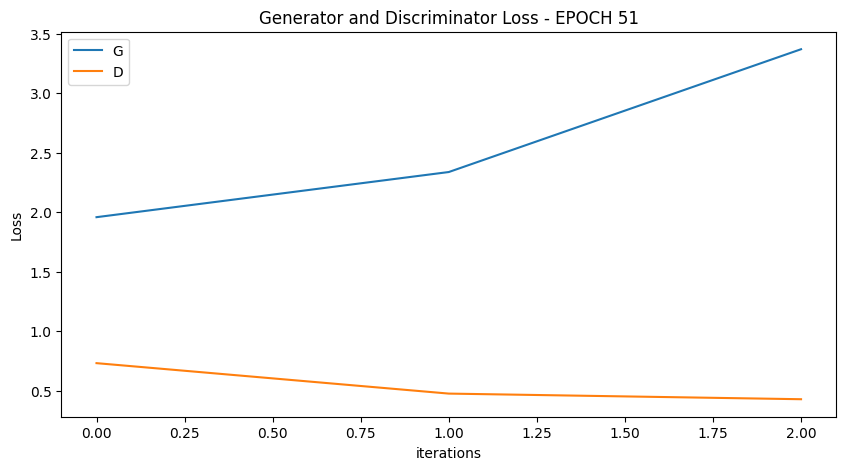

  0%|          | 0/3 [00:00<?, ?it/s]

[53/100][1/3] Loss_D: 0.6129 Loss_G: 3.7972 D(x): 0.8799 D(G(z)): 0.2290 / 0.0203
[53/100][2/3] Loss_D: 0.8146 Loss_G: 2.8313 D(x): 0.4836 D(G(z)): 0.0301 / 0.0507
[53/100][3/3] Loss_D: 0.4075 Loss_G: 2.7254 D(x): 0.8802 D(G(z)): 0.0580 / 0.0548


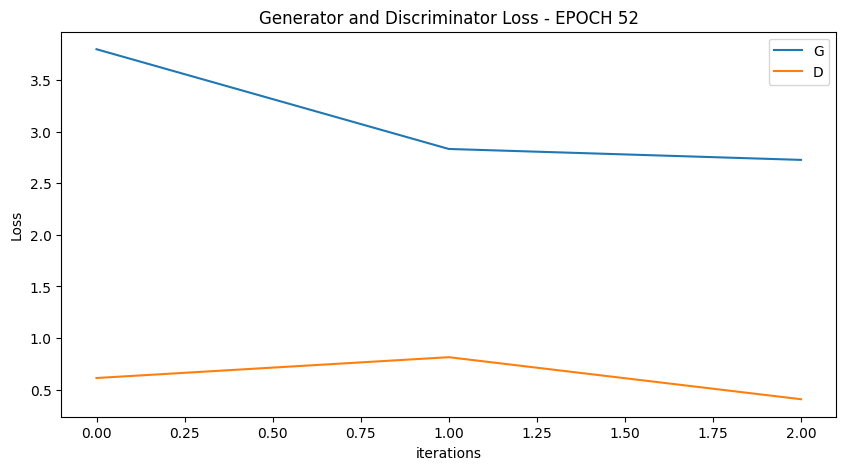

  0%|          | 0/3 [00:00<?, ?it/s]

[54/100][1/3] Loss_D: 0.4144 Loss_G: 3.1022 D(x): 0.8581 D(G(z)): 0.0453 / 0.0358
[54/100][2/3] Loss_D: 0.5748 Loss_G: 3.2567 D(x): 0.8919 D(G(z)): 0.1945 / 0.0306
[54/100][3/3] Loss_D: 0.5001 Loss_G: 3.2227 D(x): 0.7797 D(G(z)): 0.0847 / 0.0307


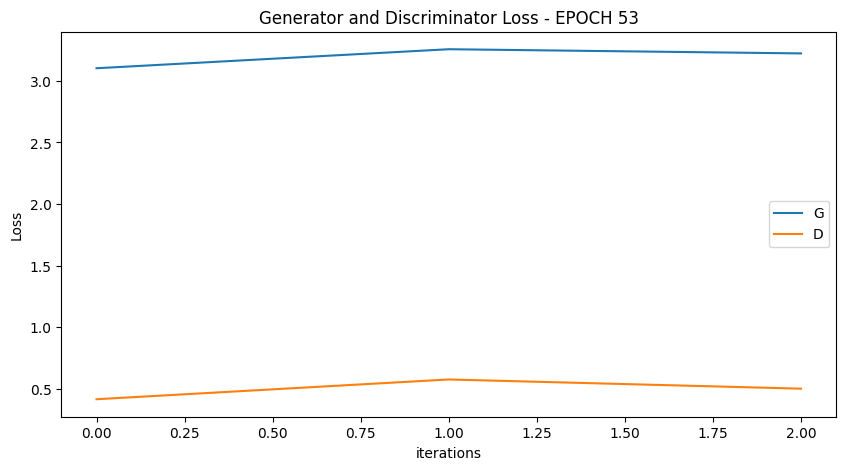

  0%|          | 0/3 [00:00<?, ?it/s]

[55/100][1/3] Loss_D: 0.5002 Loss_G: 2.7746 D(x): 0.7065 D(G(z)): 0.0297 / 0.0475
[55/100][2/3] Loss_D: 0.4783 Loss_G: 2.1726 D(x): 0.7697 D(G(z)): 0.0577 / 0.0930
[55/100][3/3] Loss_D: 1.0769 Loss_G: 5.2033 D(x): 0.9548 D(G(z)): 0.4962 / 0.0048


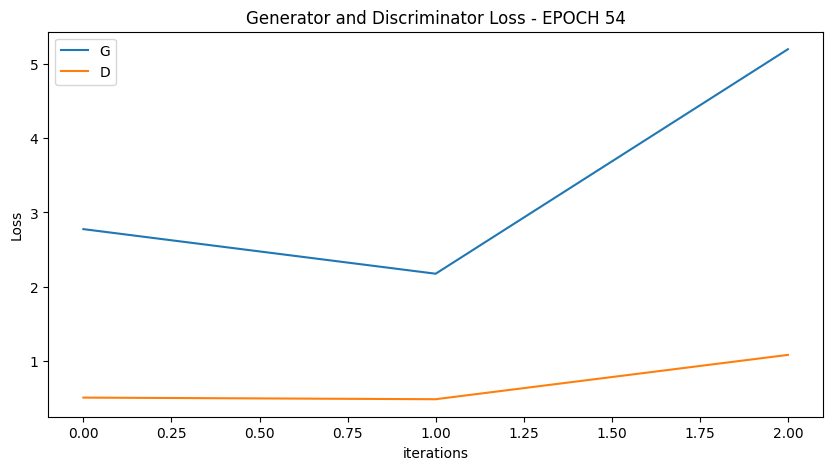

  0%|          | 0/3 [00:00<?, ?it/s]

[56/100][1/3] Loss_D: 1.0413 Loss_G: 3.3477 D(x): 0.4306 D(G(z)): 0.0228 / 0.0290
[56/100][2/3] Loss_D: 0.7039 Loss_G: 1.9080 D(x): 0.6037 D(G(z)): 0.0557 / 0.1826
[56/100][3/3] Loss_D: 0.9097 Loss_G: 2.3478 D(x): 0.8054 D(G(z)): 0.3430 / 0.0931


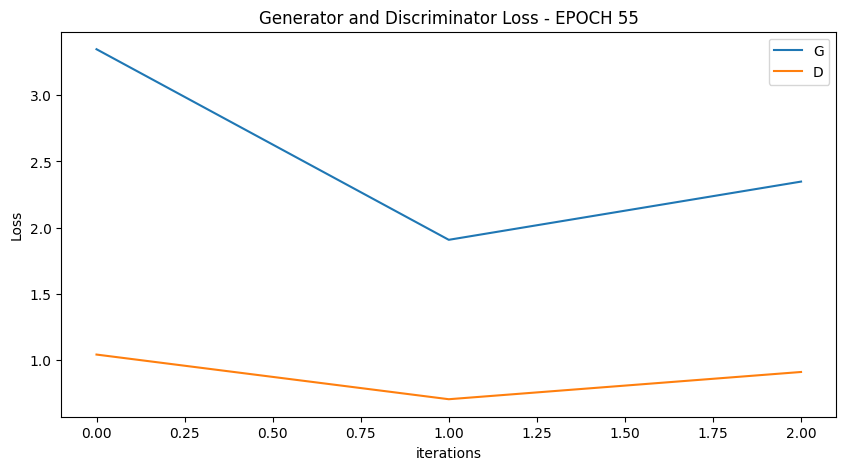

  0%|          | 0/3 [00:00<?, ?it/s]

[57/100][1/3] Loss_D: 0.5045 Loss_G: 3.2362 D(x): 0.8566 D(G(z)): 0.1145 / 0.0328
[57/100][2/3] Loss_D: 0.6235 Loss_G: 4.9668 D(x): 0.6650 D(G(z)): 0.0025 / 0.0045
[57/100][3/3] Loss_D: 0.7718 Loss_G: 3.6570 D(x): 0.9285 D(G(z)): 0.3068 / 0.0196


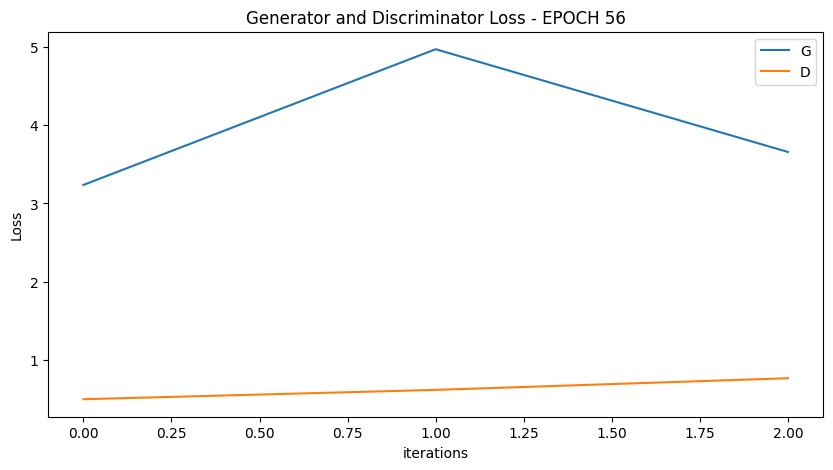

  0%|          | 0/3 [00:00<?, ?it/s]

[58/100][1/3] Loss_D: 0.5193 Loss_G: 3.8251 D(x): 0.7126 D(G(z)): 0.0180 / 0.0246
[58/100][2/3] Loss_D: 0.8637 Loss_G: 2.2719 D(x): 0.6072 D(G(z)): 0.1731 / 0.0938
[58/100][3/3] Loss_D: 0.5852 Loss_G: 2.8627 D(x): 0.8912 D(G(z)): 0.1920 / 0.0474


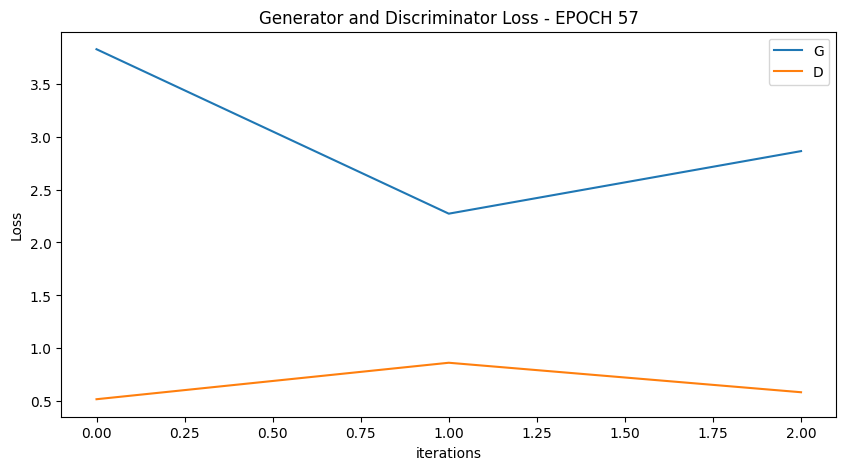

  0%|          | 0/3 [00:00<?, ?it/s]

[59/100][1/3] Loss_D: 0.6733 Loss_G: 3.0266 D(x): 0.7736 D(G(z)): 0.1689 / 0.0418
[59/100][2/3] Loss_D: 0.6995 Loss_G: 2.2861 D(x): 0.6656 D(G(z)): 0.1437 / 0.0899
[59/100][3/3] Loss_D: 0.6661 Loss_G: 3.2061 D(x): 0.7948 D(G(z)): 0.2284 / 0.0336


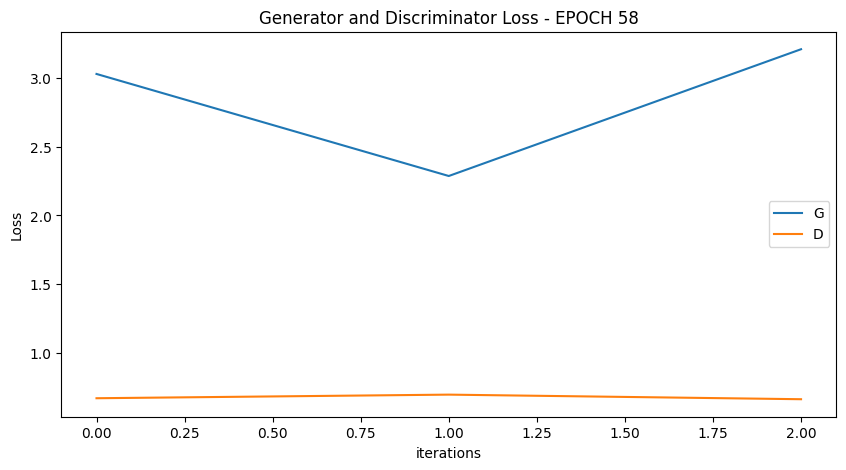

  0%|          | 0/3 [00:00<?, ?it/s]

[60/100][1/3] Loss_D: 0.6805 Loss_G: 2.6664 D(x): 0.6140 D(G(z)): 0.0661 / 0.0695
[60/100][2/3] Loss_D: 0.6607 Loss_G: 2.3606 D(x): 0.7490 D(G(z)): 0.1779 / 0.0808
[60/100][3/3] Loss_D: 0.7807 Loss_G: 2.3730 D(x): 0.6715 D(G(z)): 0.1857 / 0.0847


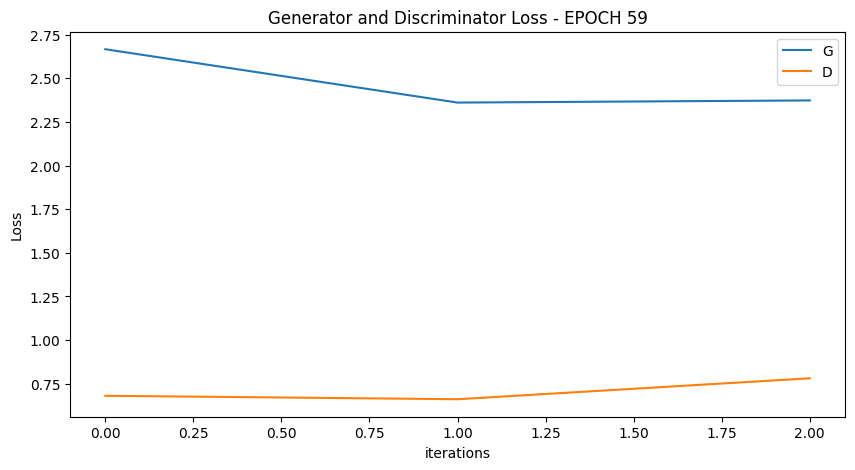

  0%|          | 0/3 [00:00<?, ?it/s]

[61/100][1/3] Loss_D: 0.6566 Loss_G: 2.4834 D(x): 0.7292 D(G(z)): 0.1824 / 0.0755
[61/100][2/3] Loss_D: 0.5390 Loss_G: 3.0021 D(x): 0.7615 D(G(z)): 0.0988 / 0.0433
[61/100][3/3] Loss_D: 0.4087 Loss_G: 3.4530 D(x): 0.8497 D(G(z)): 0.0407 / 0.0249


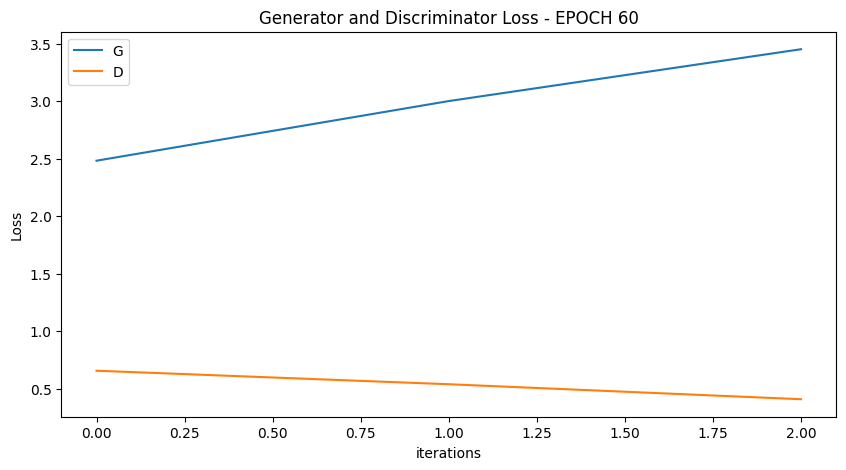

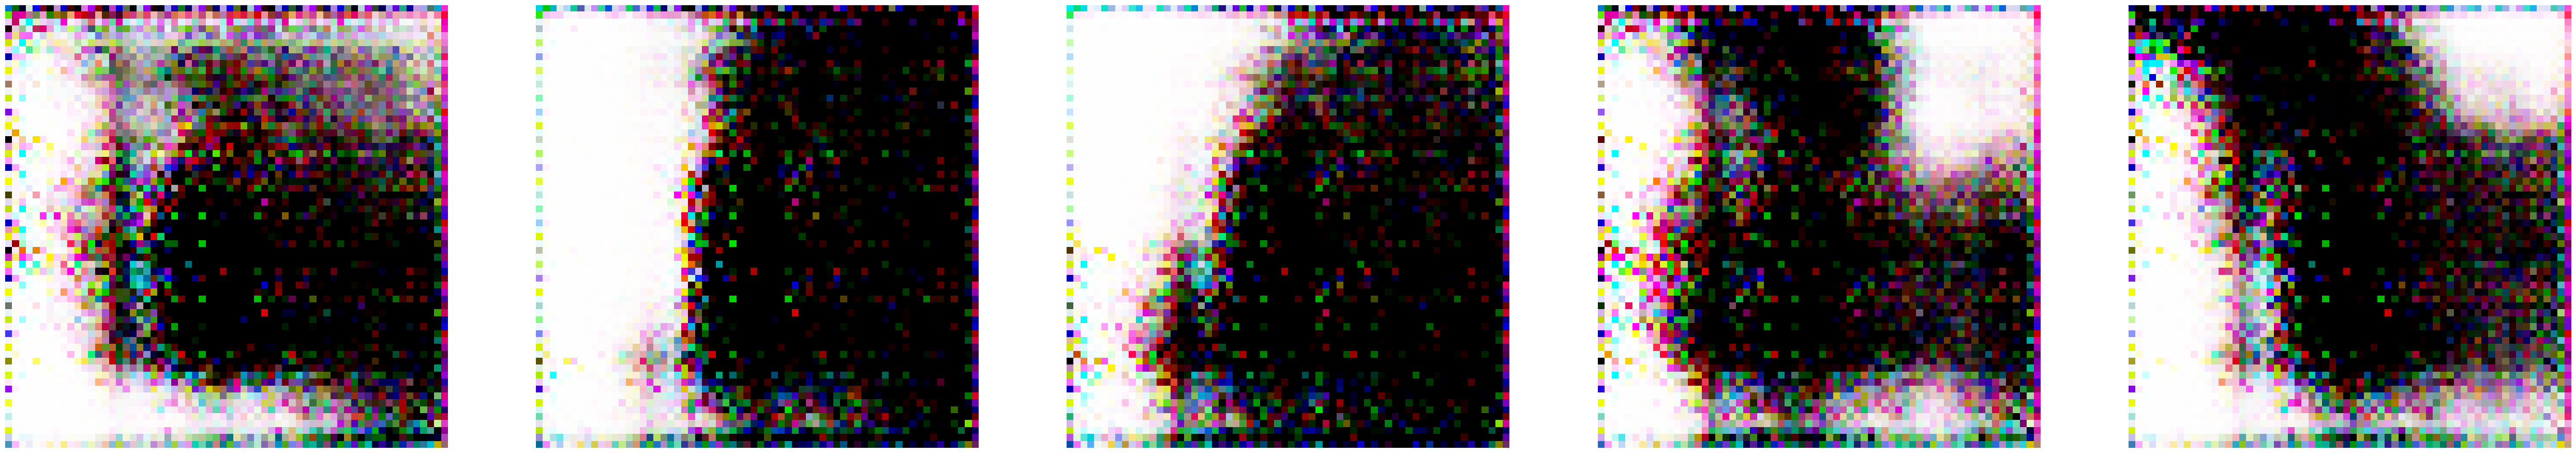

  0%|          | 0/3 [00:00<?, ?it/s]

[62/100][1/3] Loss_D: 0.5274 Loss_G: 2.5464 D(x): 0.7608 D(G(z)): 0.0980 / 0.0741
[62/100][2/3] Loss_D: 0.4810 Loss_G: 2.8129 D(x): 0.8389 D(G(z)): 0.0969 / 0.0521
[62/100][3/3] Loss_D: 0.6324 Loss_G: 2.8416 D(x): 0.7848 D(G(z)): 0.1806 / 0.0566


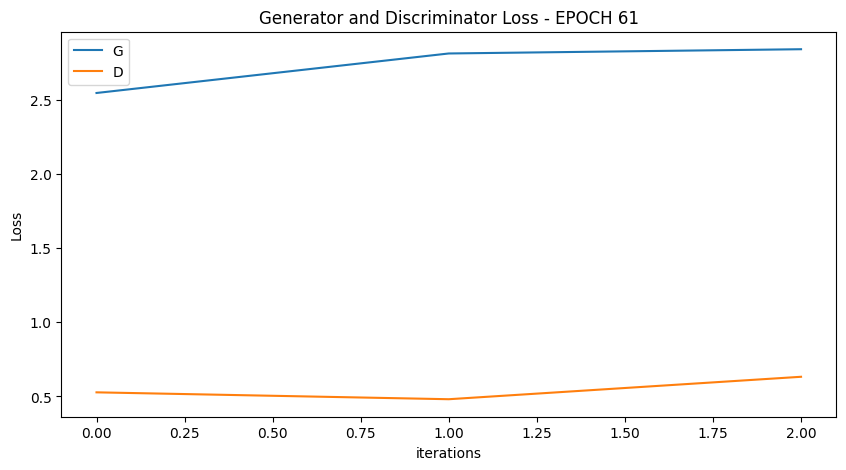

  0%|          | 0/3 [00:00<?, ?it/s]

[63/100][1/3] Loss_D: 0.5610 Loss_G: 2.6417 D(x): 0.7384 D(G(z)): 0.1078 / 0.0622
[63/100][2/3] Loss_D: 0.7434 Loss_G: 1.8247 D(x): 0.5849 D(G(z)): 0.0905 / 0.1654
[63/100][3/3] Loss_D: 0.8748 Loss_G: 3.1900 D(x): 0.8189 D(G(z)): 0.3411 / 0.0409


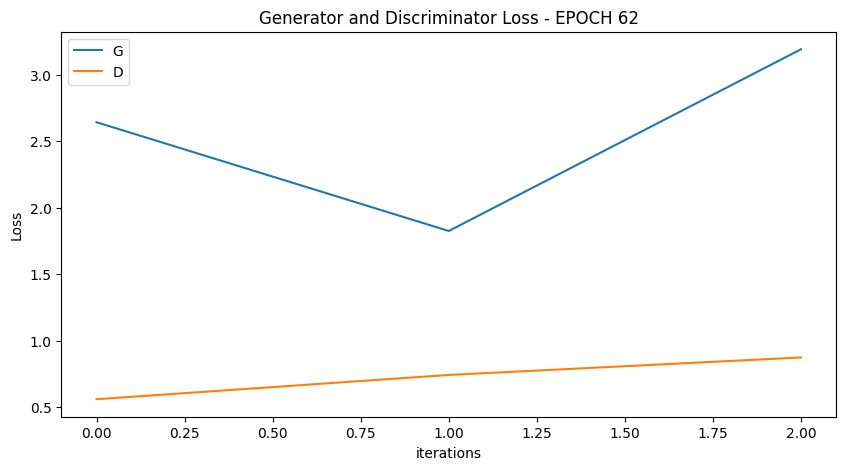

  0%|          | 0/3 [00:00<?, ?it/s]

[64/100][1/3] Loss_D: 0.6137 Loss_G: 3.3509 D(x): 0.7134 D(G(z)): 0.0961 / 0.0433
[64/100][2/3] Loss_D: 0.5988 Loss_G: 2.7480 D(x): 0.6606 D(G(z)): 0.0460 / 0.0654
[64/100][3/3] Loss_D: 0.8975 Loss_G: 3.3404 D(x): 0.7846 D(G(z)): 0.3377 / 0.0314


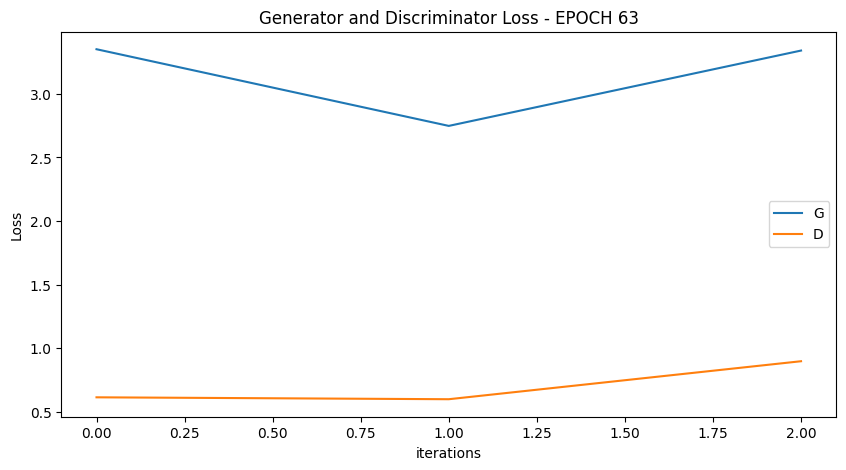

  0%|          | 0/3 [00:00<?, ?it/s]

[65/100][1/3] Loss_D: 0.8451 Loss_G: 3.6392 D(x): 0.7150 D(G(z)): 0.2489 / 0.0258
[65/100][2/3] Loss_D: 0.6028 Loss_G: 3.3145 D(x): 0.6837 D(G(z)): 0.0919 / 0.0344
[65/100][3/3] Loss_D: 0.7480 Loss_G: 2.7272 D(x): 0.7125 D(G(z)): 0.2081 / 0.0668


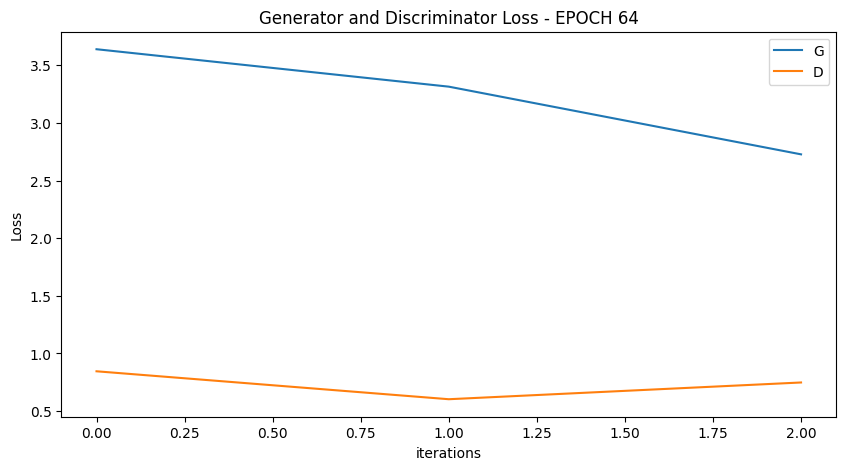

  0%|          | 0/3 [00:00<?, ?it/s]

[66/100][1/3] Loss_D: 0.5770 Loss_G: 3.2300 D(x): 0.8404 D(G(z)): 0.1688 / 0.0307
[66/100][2/3] Loss_D: 0.7851 Loss_G: 3.2454 D(x): 0.6700 D(G(z)): 0.1914 / 0.0350
[66/100][3/3] Loss_D: 0.6713 Loss_G: 2.4442 D(x): 0.6382 D(G(z)): 0.1021 / 0.0768


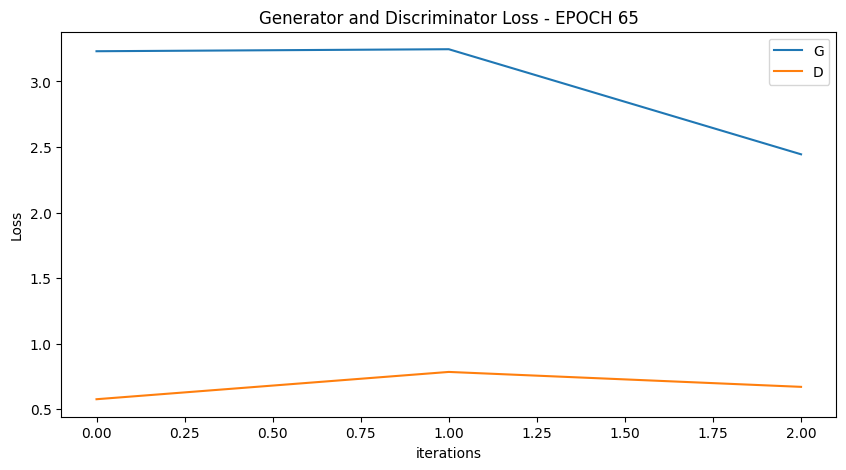

  0%|          | 0/3 [00:00<?, ?it/s]

[67/100][1/3] Loss_D: 0.9171 Loss_G: 5.8133 D(x): 0.8576 D(G(z)): 0.3979 / 0.0021
[67/100][2/3] Loss_D: 1.2009 Loss_G: 2.9314 D(x): 0.3712 D(G(z)): 0.0266 / 0.0637
[67/100][3/3] Loss_D: 1.0619 Loss_G: 1.1676 D(x): 0.5206 D(G(z)): 0.1991 / 0.3148


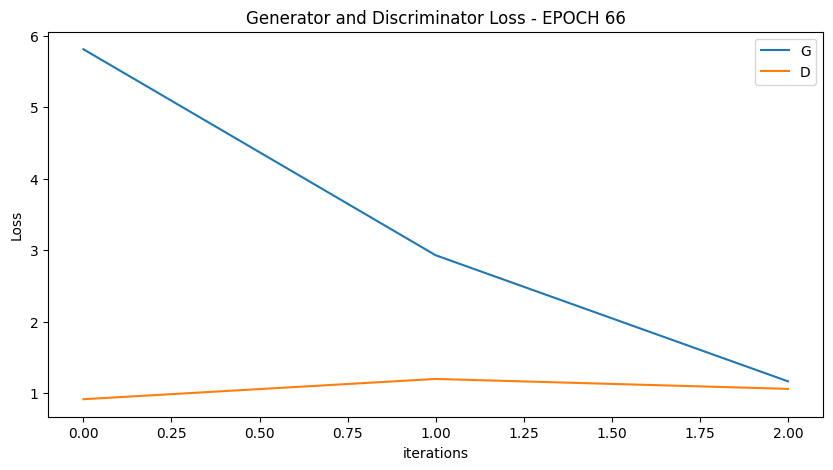

  0%|          | 0/3 [00:00<?, ?it/s]

[68/100][1/3] Loss_D: 1.0403 Loss_G: 3.7603 D(x): 0.9025 D(G(z)): 0.4559 / 0.0256
[68/100][2/3] Loss_D: 0.6015 Loss_G: 3.4826 D(x): 0.7310 D(G(z)): 0.1303 / 0.0274
[68/100][3/3] Loss_D: 0.7820 Loss_G: 1.8851 D(x): 0.5769 D(G(z)): 0.1078 / 0.1524


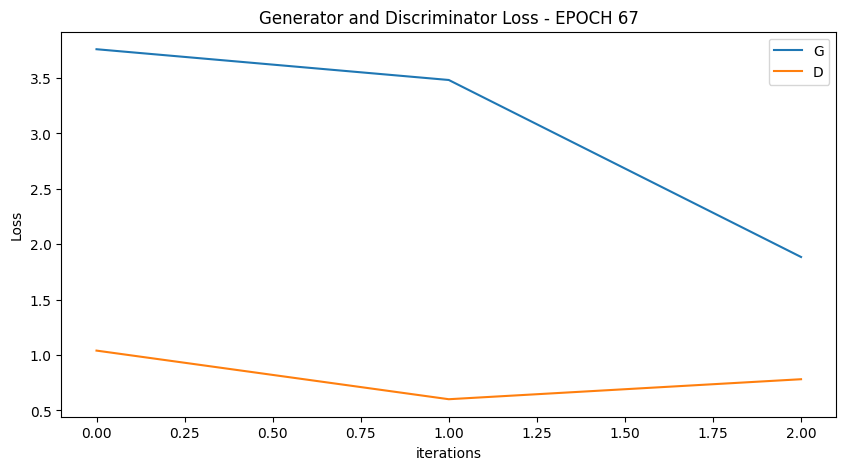

  0%|          | 0/3 [00:00<?, ?it/s]

[69/100][1/3] Loss_D: 0.8840 Loss_G: 2.1894 D(x): 0.7201 D(G(z)): 0.3110 / 0.1019
[69/100][2/3] Loss_D: 1.0908 Loss_G: 2.7348 D(x): 0.6862 D(G(z)): 0.4245 / 0.0759
[69/100][3/3] Loss_D: 1.4185 Loss_G: 1.4047 D(x): 0.4009 D(G(z)): 0.1573 / 0.2676


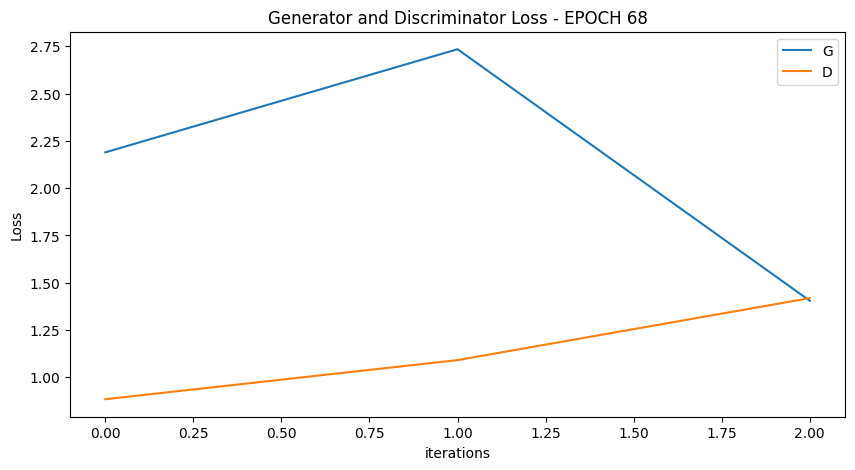

  0%|          | 0/3 [00:00<?, ?it/s]

[70/100][1/3] Loss_D: 1.5030 Loss_G: 1.8232 D(x): 0.6337 D(G(z)): 0.5791 / 0.1550
[70/100][2/3] Loss_D: 1.0254 Loss_G: 1.8788 D(x): 0.4758 D(G(z)): 0.1653 / 0.1574
[70/100][3/3] Loss_D: 0.8361 Loss_G: 1.8918 D(x): 0.7752 D(G(z)): 0.3331 / 0.1358


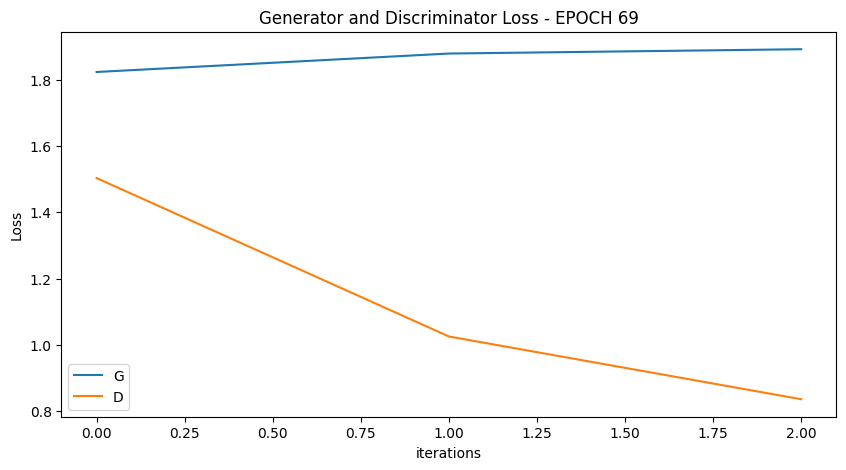

  0%|          | 0/3 [00:00<?, ?it/s]

[71/100][1/3] Loss_D: 1.1311 Loss_G: 2.0594 D(x): 0.7029 D(G(z)): 0.4389 / 0.1295
[71/100][2/3] Loss_D: 1.1891 Loss_G: 1.5288 D(x): 0.4493 D(G(z)): 0.2829 / 0.2234
[71/100][3/3] Loss_D: 1.0006 Loss_G: 1.9413 D(x): 0.6290 D(G(z)): 0.3448 / 0.1353


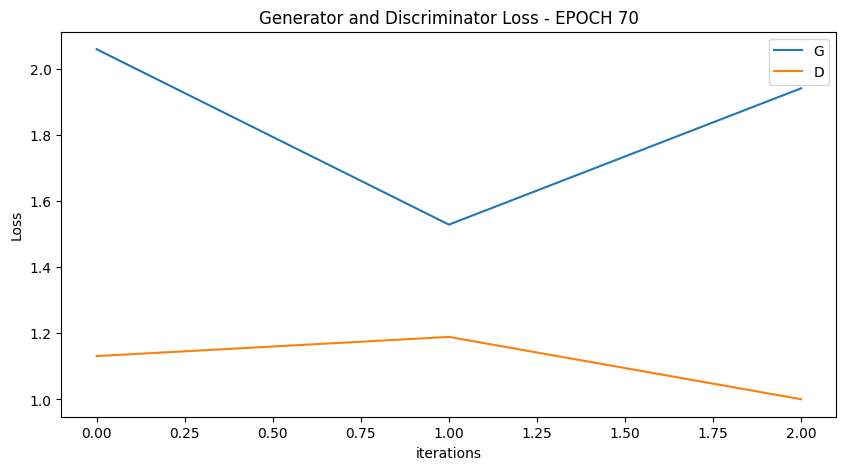

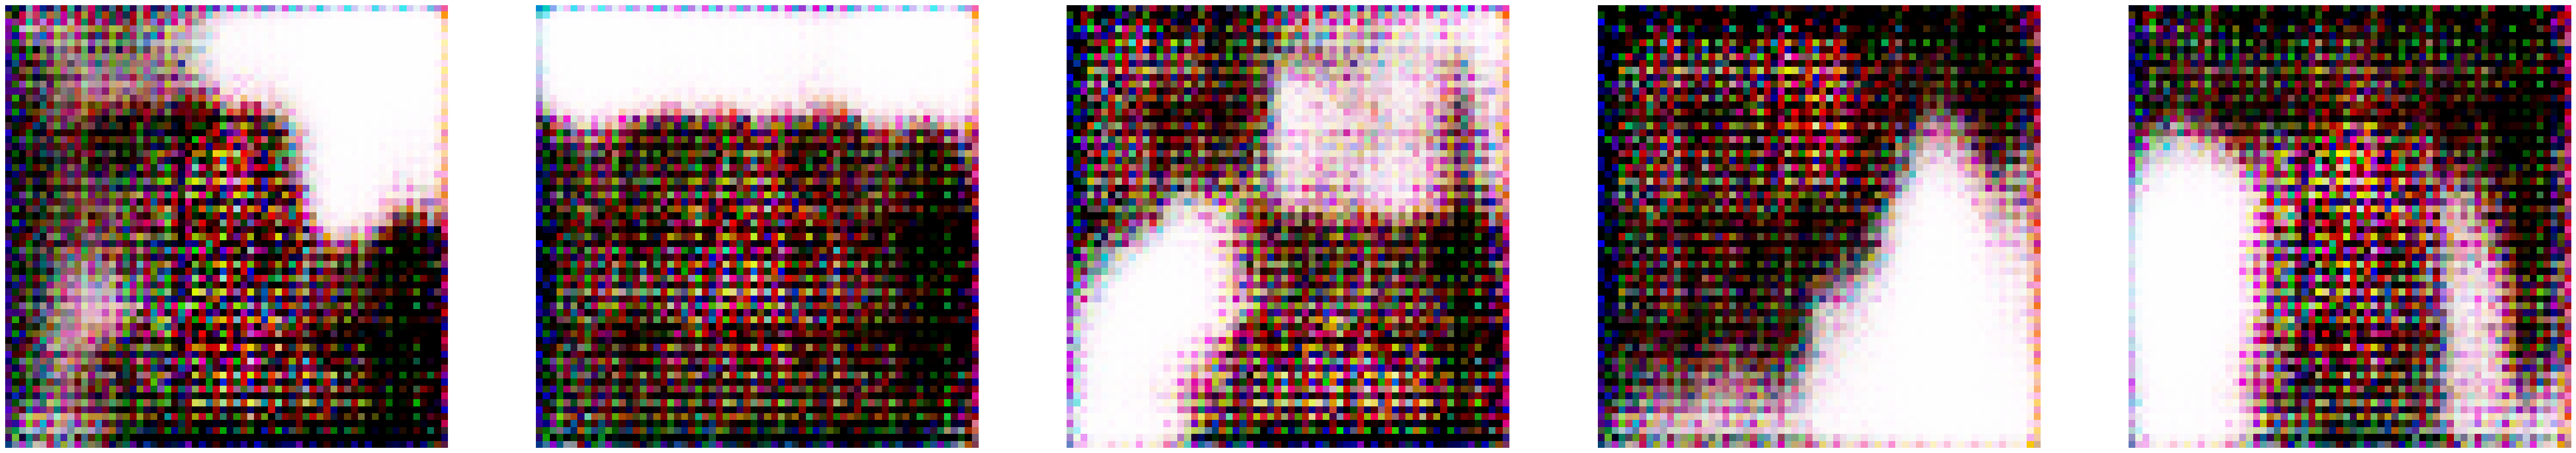

  0%|          | 0/3 [00:00<?, ?it/s]

[72/100][1/3] Loss_D: 0.9902 Loss_G: 1.3682 D(x): 0.4479 D(G(z)): 0.1089 / 0.2652
[72/100][2/3] Loss_D: 1.7613 Loss_G: 1.7878 D(x): 0.8607 D(G(z)): 0.7004 / 0.1547
[72/100][3/3] Loss_D: 0.8151 Loss_G: 2.4816 D(x): 0.6004 D(G(z)): 0.1617 / 0.0744


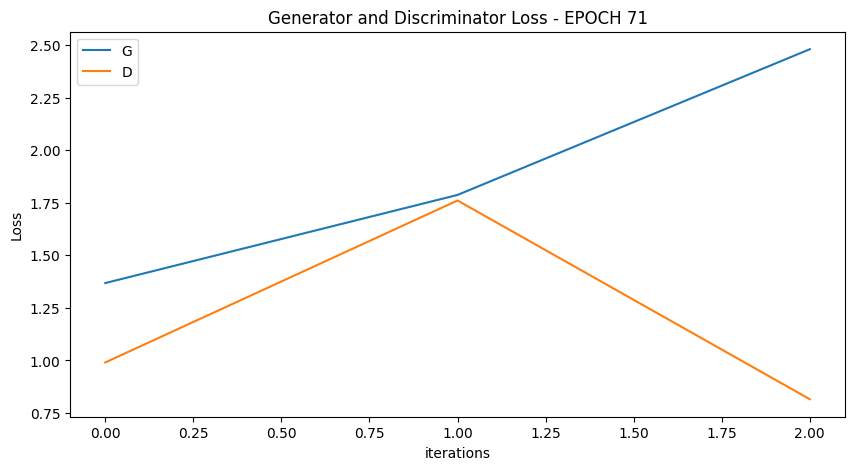

  0%|          | 0/3 [00:00<?, ?it/s]

[73/100][1/3] Loss_D: 1.4559 Loss_G: 1.0066 D(x): 0.3847 D(G(z)): 0.2896 / 0.3734
[73/100][2/3] Loss_D: 1.2871 Loss_G: 1.2666 D(x): 0.6771 D(G(z)): 0.5108 / 0.2738
[73/100][3/3] Loss_D: 1.0375 Loss_G: 1.6982 D(x): 0.6175 D(G(z)): 0.3388 / 0.1762


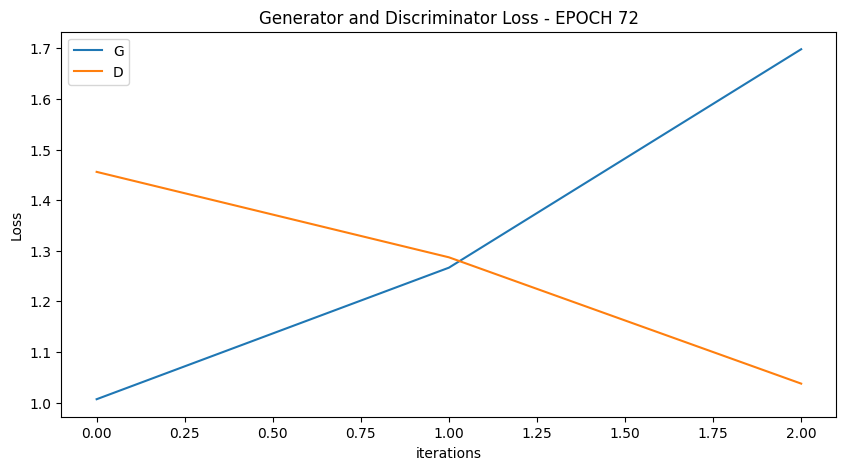

  0%|          | 0/3 [00:00<?, ?it/s]

[74/100][1/3] Loss_D: 1.3820 Loss_G: 1.0808 D(x): 0.3645 D(G(z)): 0.2329 / 0.3354
[74/100][2/3] Loss_D: 1.1322 Loss_G: 1.1498 D(x): 0.7006 D(G(z)): 0.4565 / 0.3048
[74/100][3/3] Loss_D: 0.9475 Loss_G: 1.6237 D(x): 0.6622 D(G(z)): 0.3431 / 0.1849


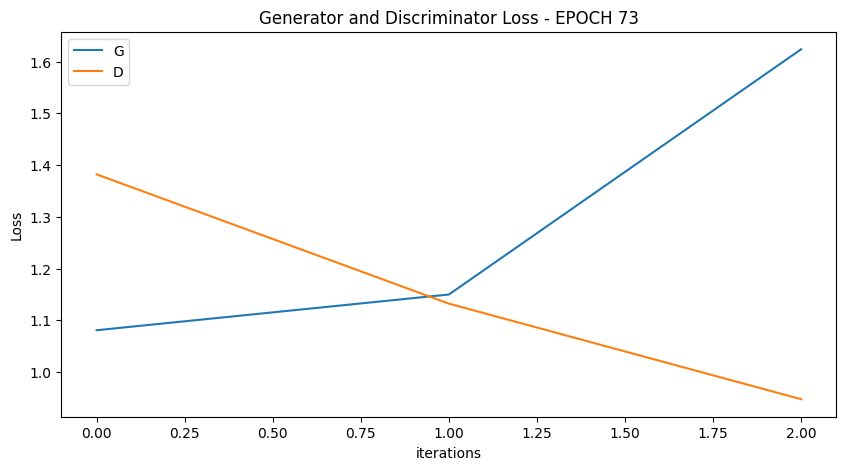

  0%|          | 0/3 [00:00<?, ?it/s]

[75/100][1/3] Loss_D: 0.9744 Loss_G: 1.4610 D(x): 0.5084 D(G(z)): 0.2064 / 0.2131
[75/100][2/3] Loss_D: 0.7737 Loss_G: 1.7257 D(x): 0.7307 D(G(z)): 0.2752 / 0.1589
[75/100][3/3] Loss_D: 1.1664 Loss_G: 1.1001 D(x): 0.4174 D(G(z)): 0.2294 / 0.3337


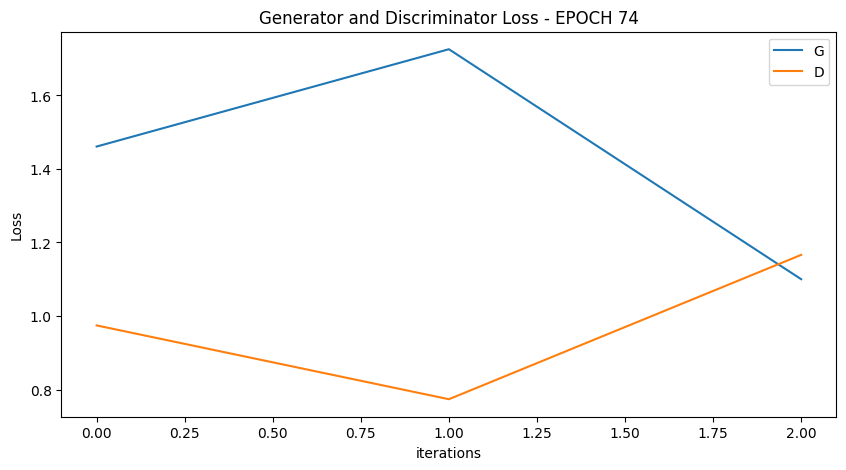

  0%|          | 0/3 [00:00<?, ?it/s]

[76/100][1/3] Loss_D: 1.1814 Loss_G: 1.6313 D(x): 0.7647 D(G(z)): 0.4986 / 0.1844
[76/100][2/3] Loss_D: 0.9575 Loss_G: 1.6754 D(x): 0.5795 D(G(z)): 0.2715 / 0.1639
[76/100][3/3] Loss_D: 1.1179 Loss_G: 1.1128 D(x): 0.4499 D(G(z)): 0.2439 / 0.3165


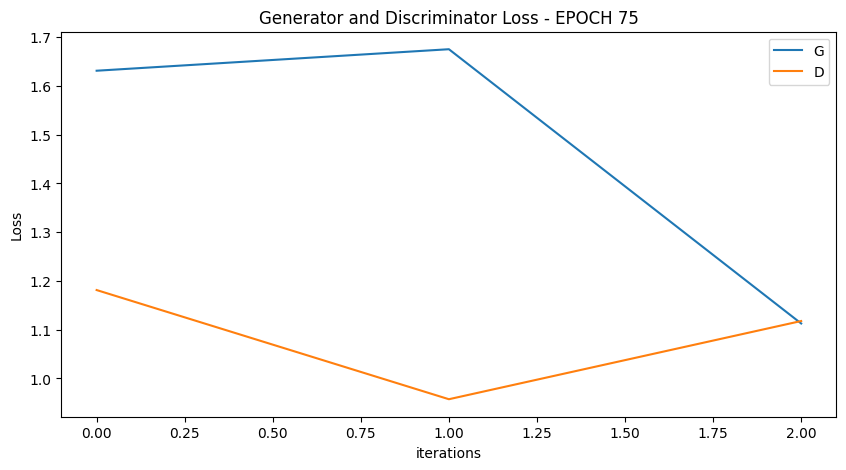

  0%|          | 0/3 [00:00<?, ?it/s]

[77/100][1/3] Loss_D: 0.9958 Loss_G: 1.6194 D(x): 0.7097 D(G(z)): 0.3996 / 0.1907
[77/100][2/3] Loss_D: 1.0002 Loss_G: 1.4785 D(x): 0.5585 D(G(z)): 0.2882 / 0.2122
[77/100][3/3] Loss_D: 0.7399 Loss_G: 1.7582 D(x): 0.7112 D(G(z)): 0.2419 / 0.1482


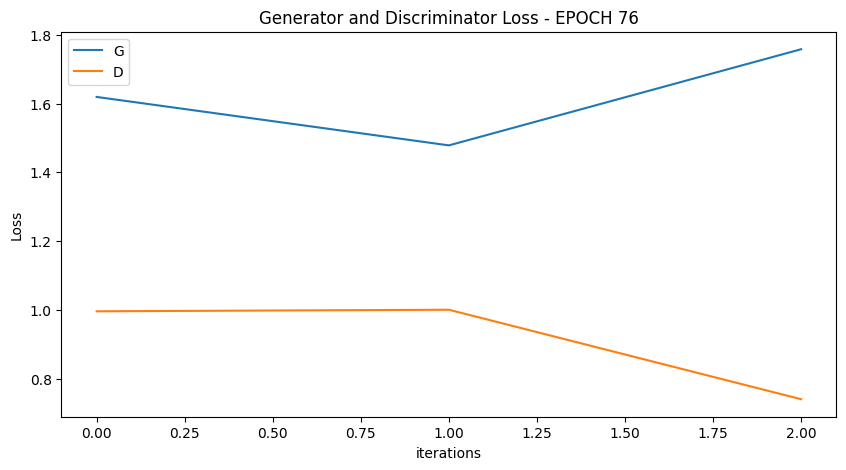

  0%|          | 0/3 [00:00<?, ?it/s]

[78/100][1/3] Loss_D: 0.7189 Loss_G: 1.6739 D(x): 0.6080 D(G(z)): 0.1462 / 0.1678
[78/100][2/3] Loss_D: 0.8049 Loss_G: 1.8305 D(x): 0.7366 D(G(z)): 0.3048 / 0.1454
[78/100][3/3] Loss_D: 0.7684 Loss_G: 2.0646 D(x): 0.6650 D(G(z)): 0.2277 / 0.1128


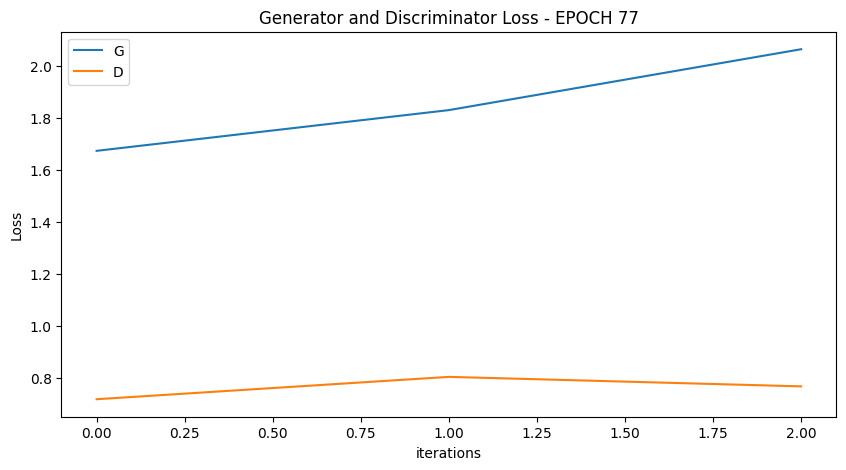

  0%|          | 0/3 [00:00<?, ?it/s]

[79/100][1/3] Loss_D: 0.6082 Loss_G: 2.0867 D(x): 0.7140 D(G(z)): 0.1566 / 0.1110
[79/100][2/3] Loss_D: 0.8933 Loss_G: 2.0496 D(x): 0.6683 D(G(z)): 0.3187 / 0.1200
[79/100][3/3] Loss_D: 0.9849 Loss_G: 1.3884 D(x): 0.4715 D(G(z)): 0.1723 / 0.2351


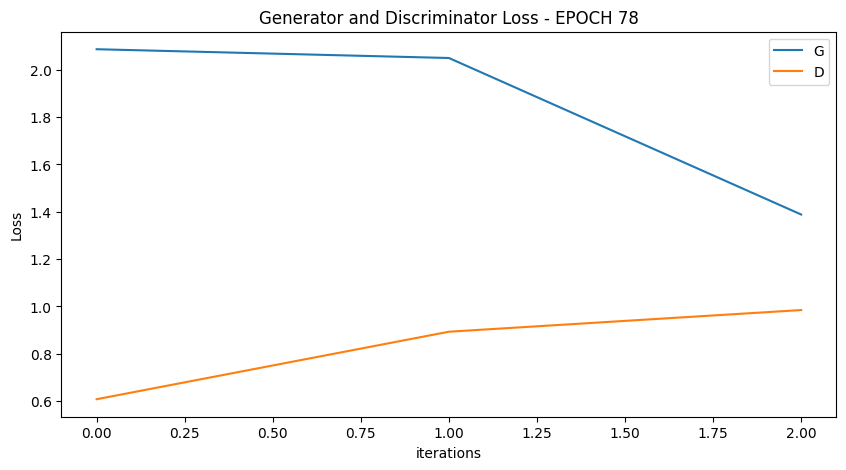

  0%|          | 0/3 [00:00<?, ?it/s]

[80/100][1/3] Loss_D: 0.7620 Loss_G: 1.8340 D(x): 0.8150 D(G(z)): 0.3183 / 0.1432
[80/100][2/3] Loss_D: 0.7301 Loss_G: 1.9395 D(x): 0.6236 D(G(z)): 0.1652 / 0.1301
[80/100][3/3] Loss_D: 0.6369 Loss_G: 2.0055 D(x): 0.7423 D(G(z)): 0.1864 / 0.1226


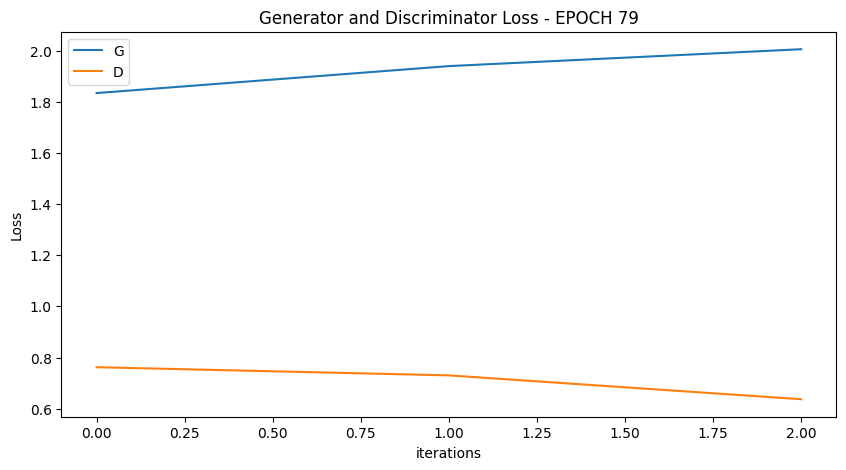

  0%|          | 0/3 [00:00<?, ?it/s]

[81/100][1/3] Loss_D: 0.6227 Loss_G: 2.1027 D(x): 0.7615 D(G(z)): 0.1925 / 0.1061
[81/100][2/3] Loss_D: 1.0211 Loss_G: 1.9649 D(x): 0.6908 D(G(z)): 0.4071 / 0.1351
[81/100][3/3] Loss_D: 1.0342 Loss_G: 1.6092 D(x): 0.5234 D(G(z)): 0.2716 / 0.1820


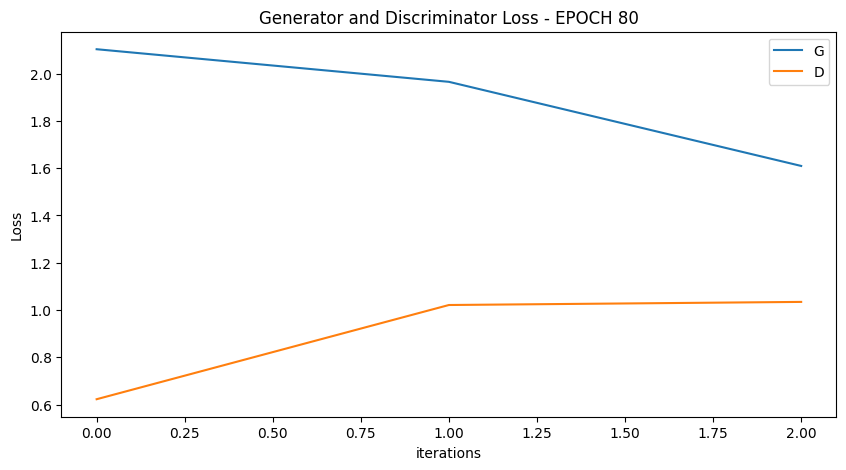

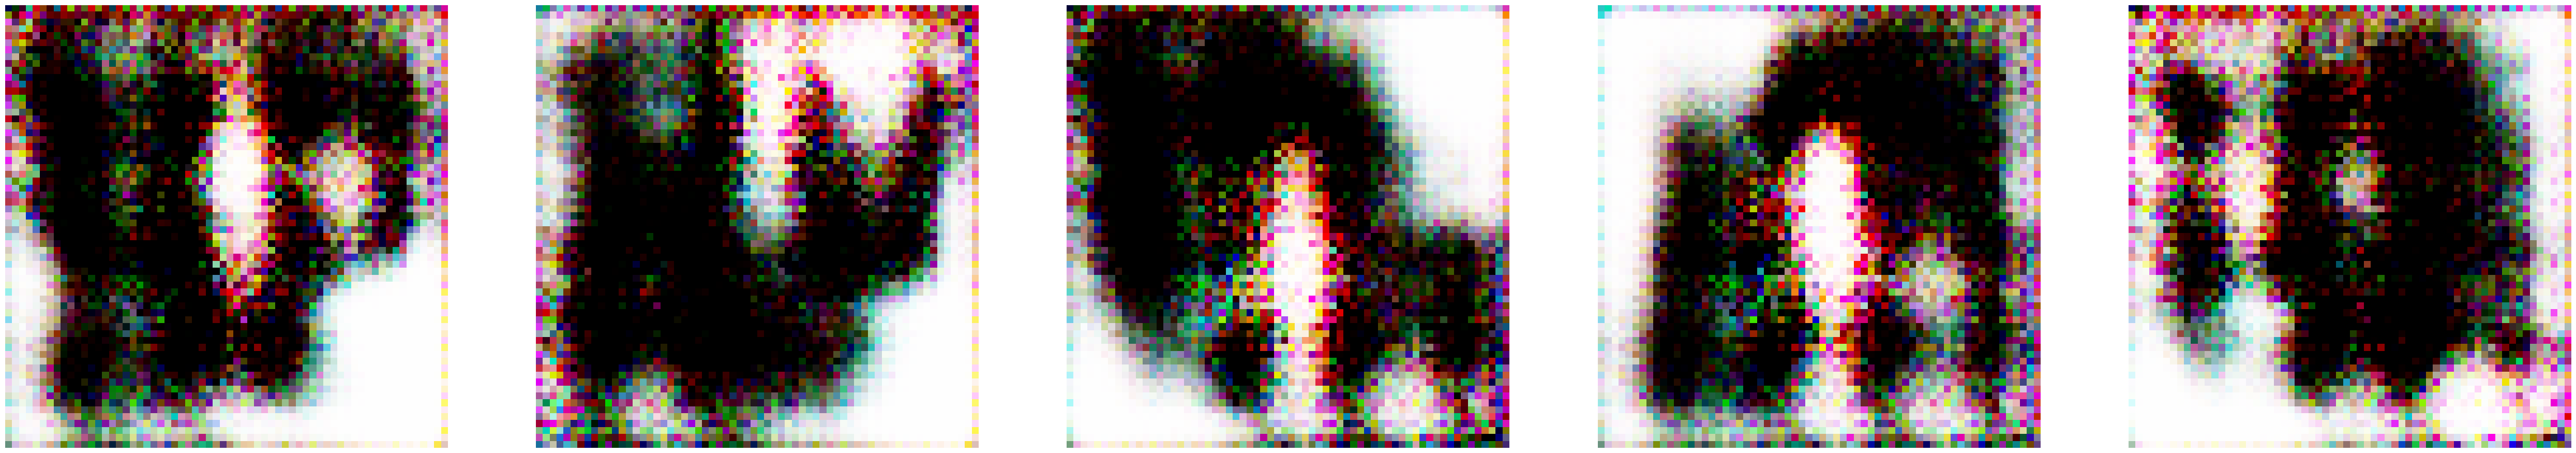

  0%|          | 0/3 [00:00<?, ?it/s]

[82/100][1/3] Loss_D: 1.0352 Loss_G: 1.6595 D(x): 0.5940 D(G(z)): 0.3170 / 0.1695
[82/100][2/3] Loss_D: 1.0568 Loss_G: 1.2625 D(x): 0.5169 D(G(z)): 0.2840 / 0.2682
[82/100][3/3] Loss_D: 1.0734 Loss_G: 2.0618 D(x): 0.6769 D(G(z)): 0.4223 / 0.1230


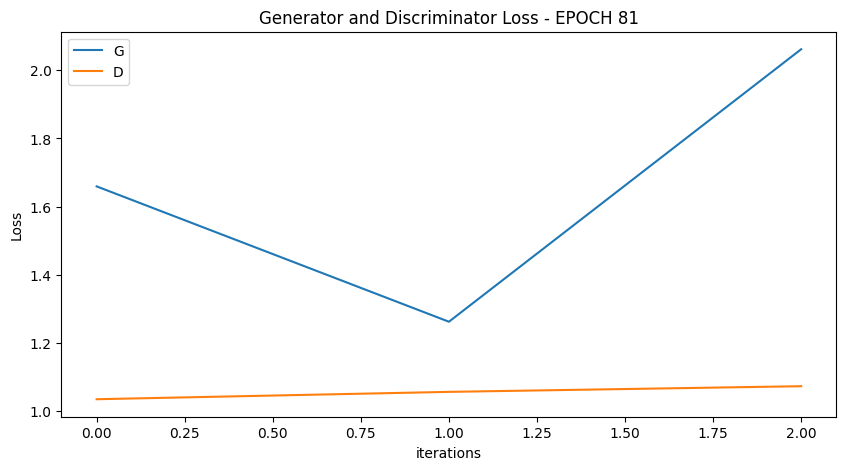

  0%|          | 0/3 [00:00<?, ?it/s]

[83/100][1/3] Loss_D: 0.9507 Loss_G: 1.6378 D(x): 0.5036 D(G(z)): 0.1701 / 0.1910
[83/100][2/3] Loss_D: 0.9378 Loss_G: 1.6019 D(x): 0.6489 D(G(z)): 0.2887 / 0.1894
[83/100][3/3] Loss_D: 1.0955 Loss_G: 1.6338 D(x): 0.6221 D(G(z)): 0.3643 / 0.1843


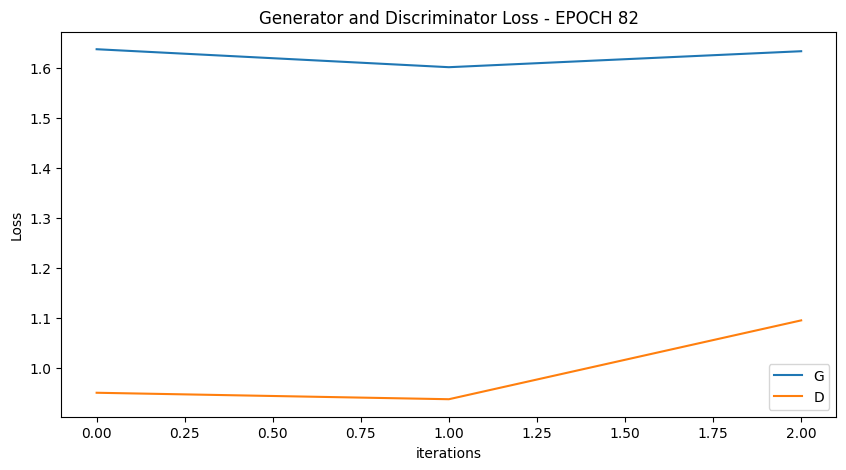

  0%|          | 0/3 [00:00<?, ?it/s]

[84/100][1/3] Loss_D: 1.1011 Loss_G: 1.0710 D(x): 0.4671 D(G(z)): 0.2263 / 0.3273
[84/100][2/3] Loss_D: 1.1934 Loss_G: 1.5261 D(x): 0.6352 D(G(z)): 0.4681 / 0.2000
[84/100][3/3] Loss_D: 0.8164 Loss_G: 1.8890 D(x): 0.6641 D(G(z)): 0.2623 / 0.1390


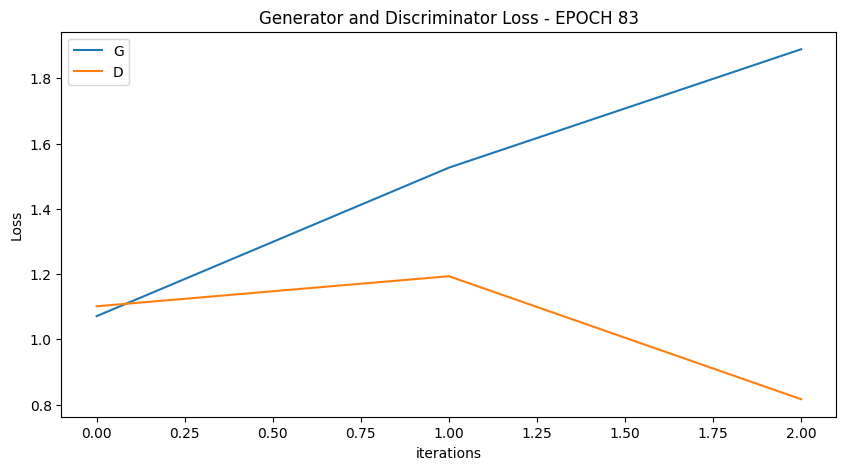

  0%|          | 0/3 [00:00<?, ?it/s]

[85/100][1/3] Loss_D: 1.0043 Loss_G: 1.3554 D(x): 0.5101 D(G(z)): 0.2380 / 0.2515
[85/100][2/3] Loss_D: 0.7906 Loss_G: 1.8162 D(x): 0.7185 D(G(z)): 0.2789 / 0.1518
[85/100][3/3] Loss_D: 1.0711 Loss_G: 1.2316 D(x): 0.4966 D(G(z)): 0.2577 / 0.2907


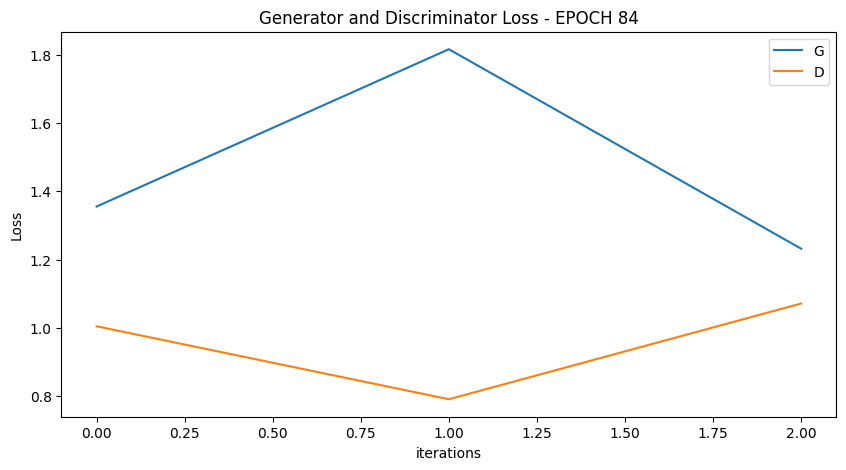

  0%|          | 0/3 [00:00<?, ?it/s]

[86/100][1/3] Loss_D: 0.9417 Loss_G: 2.3516 D(x): 0.7545 D(G(z)): 0.3967 / 0.0801
[86/100][2/3] Loss_D: 0.6771 Loss_G: 2.1572 D(x): 0.5780 D(G(z)): 0.0659 / 0.1012
[86/100][3/3] Loss_D: 1.0307 Loss_G: 1.4251 D(x): 0.6110 D(G(z)): 0.3556 / 0.2252


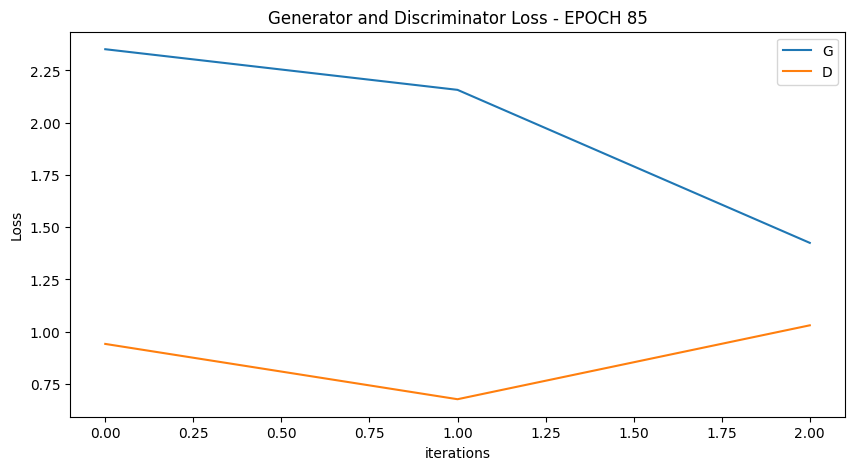

  0%|          | 0/3 [00:00<?, ?it/s]

[87/100][1/3] Loss_D: 1.0664 Loss_G: 1.8247 D(x): 0.6142 D(G(z)): 0.3762 / 0.1467
[87/100][2/3] Loss_D: 0.7326 Loss_G: 2.0244 D(x): 0.6723 D(G(z)): 0.1951 / 0.1196
[87/100][3/3] Loss_D: 0.9190 Loss_G: 1.4418 D(x): 0.5767 D(G(z)): 0.2455 / 0.2428


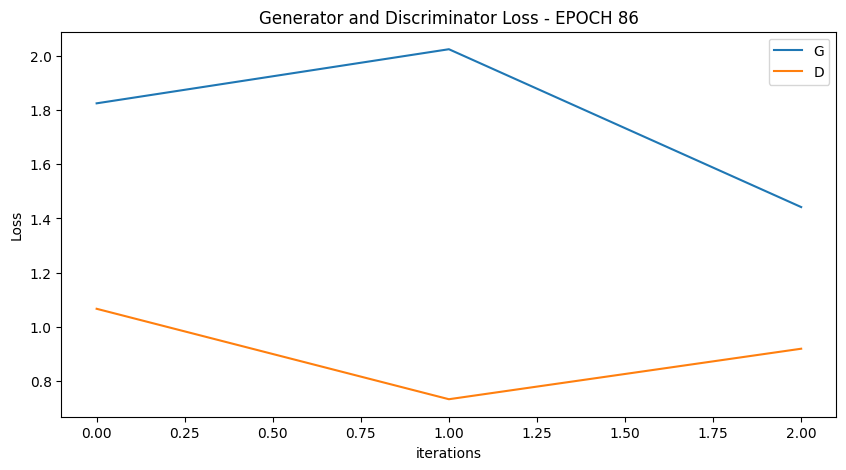

  0%|          | 0/3 [00:00<?, ?it/s]

[88/100][1/3] Loss_D: 1.1016 Loss_G: 2.1345 D(x): 0.7094 D(G(z)): 0.4479 / 0.1095
[88/100][2/3] Loss_D: 1.0862 Loss_G: 1.5153 D(x): 0.4697 D(G(z)): 0.2125 / 0.2078
[88/100][3/3] Loss_D: 1.0586 Loss_G: 1.2673 D(x): 0.6013 D(G(z)): 0.3471 / 0.2663


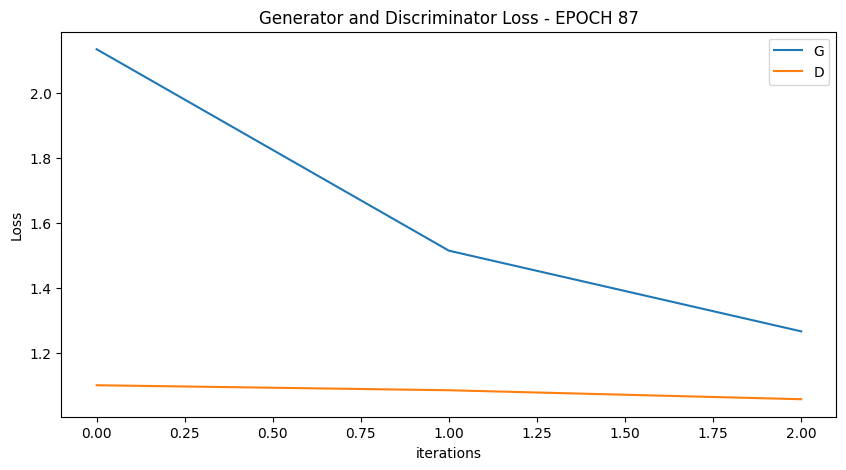

  0%|          | 0/3 [00:00<?, ?it/s]

[89/100][1/3] Loss_D: 1.0745 Loss_G: 1.8448 D(x): 0.6494 D(G(z)): 0.4023 / 0.1447
[89/100][2/3] Loss_D: 0.6933 Loss_G: 2.2128 D(x): 0.7232 D(G(z)): 0.2145 / 0.0998
[89/100][3/3] Loss_D: 0.8952 Loss_G: 1.3968 D(x): 0.5388 D(G(z)): 0.1861 / 0.2339


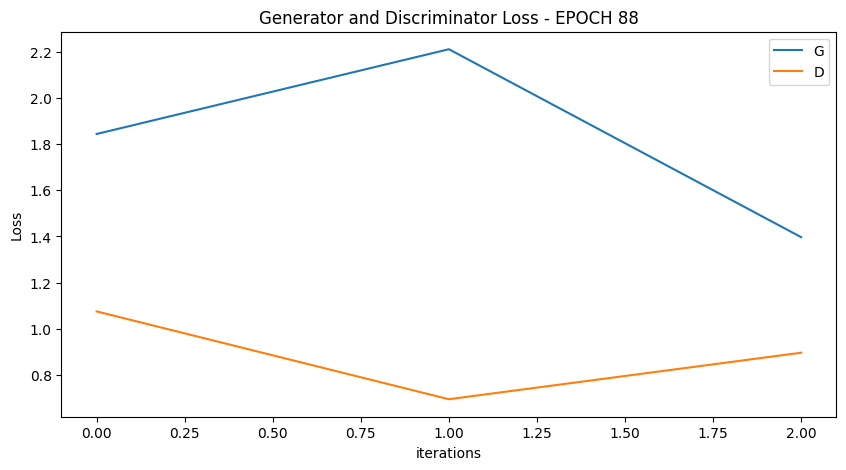

  0%|          | 0/3 [00:00<?, ?it/s]

[90/100][1/3] Loss_D: 1.0750 Loss_G: 2.0242 D(x): 0.7532 D(G(z)): 0.4696 / 0.1154
[90/100][2/3] Loss_D: 1.1727 Loss_G: 1.4874 D(x): 0.4747 D(G(z)): 0.3112 / 0.2180
[90/100][3/3] Loss_D: 1.3468 Loss_G: 0.8235 D(x): 0.4188 D(G(z)): 0.3456 / 0.4417


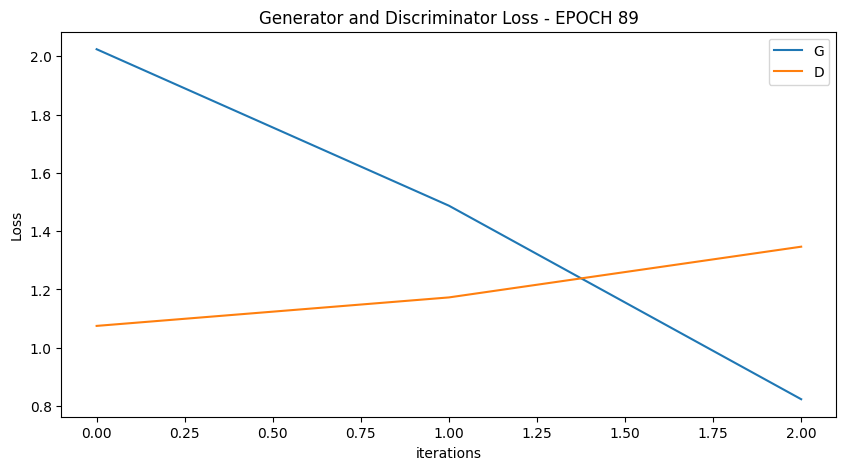

  0%|          | 0/3 [00:00<?, ?it/s]

[91/100][1/3] Loss_D: 1.7074 Loss_G: 2.6422 D(x): 0.6997 D(G(z)): 0.6894 / 0.0636
[91/100][2/3] Loss_D: 1.3436 Loss_G: 1.7672 D(x): 0.2803 D(G(z)): 0.0675 / 0.1711
[91/100][3/3] Loss_D: 0.8288 Loss_G: 1.3050 D(x): 0.6578 D(G(z)): 0.2477 / 0.2629


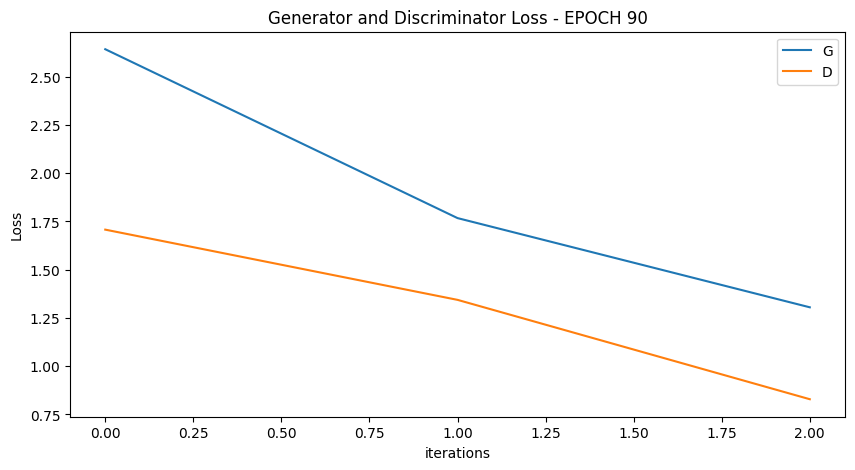

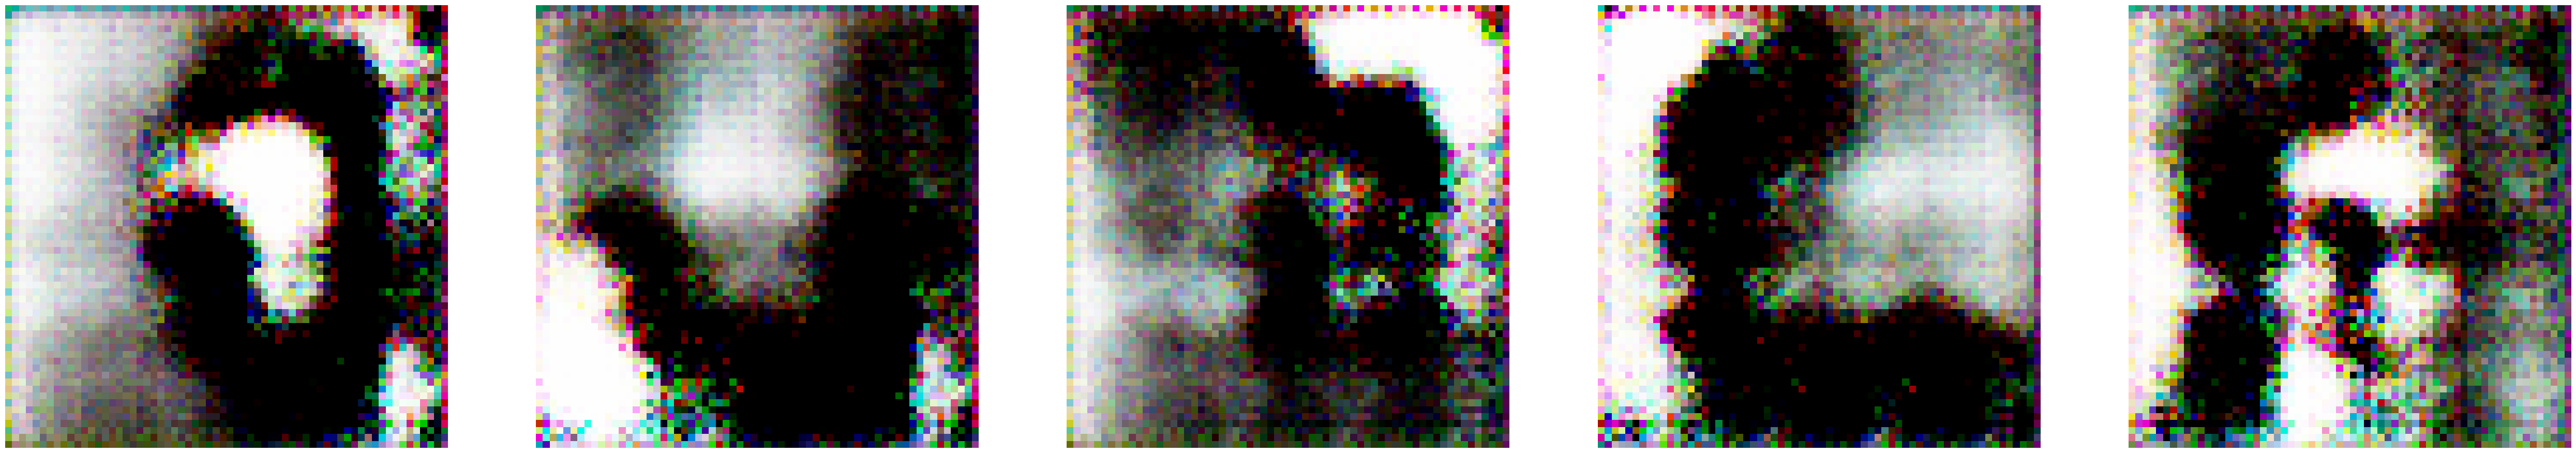

  0%|          | 0/3 [00:00<?, ?it/s]

[92/100][1/3] Loss_D: 1.0261 Loss_G: 2.0287 D(x): 0.8099 D(G(z)): 0.4596 / 0.1229
[92/100][2/3] Loss_D: 0.8581 Loss_G: 1.8923 D(x): 0.5795 D(G(z)): 0.1872 / 0.1331
[92/100][3/3] Loss_D: 1.0063 Loss_G: 1.2709 D(x): 0.5668 D(G(z)): 0.2659 / 0.2938


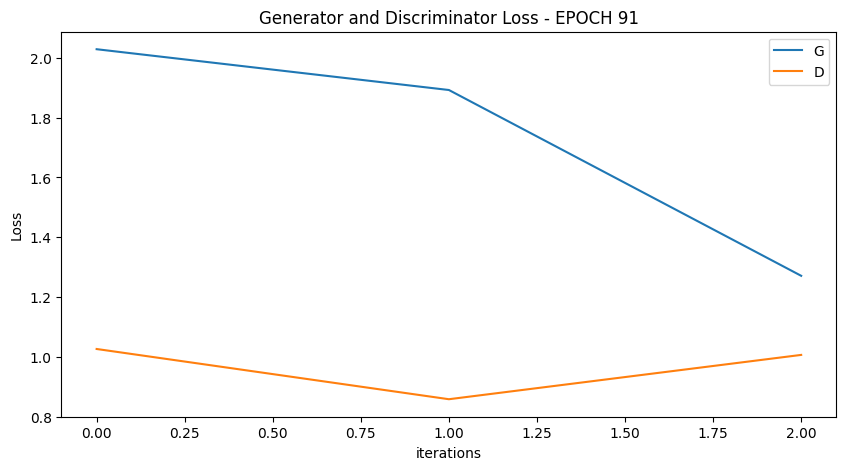

  0%|          | 0/3 [00:00<?, ?it/s]

[93/100][1/3] Loss_D: 1.3102 Loss_G: 1.2875 D(x): 0.6009 D(G(z)): 0.4736 / 0.2678
[93/100][2/3] Loss_D: 1.1126 Loss_G: 1.5567 D(x): 0.6260 D(G(z)): 0.4122 / 0.2169
[93/100][3/3] Loss_D: 1.1959 Loss_G: 1.2874 D(x): 0.4524 D(G(z)): 0.2968 / 0.2623


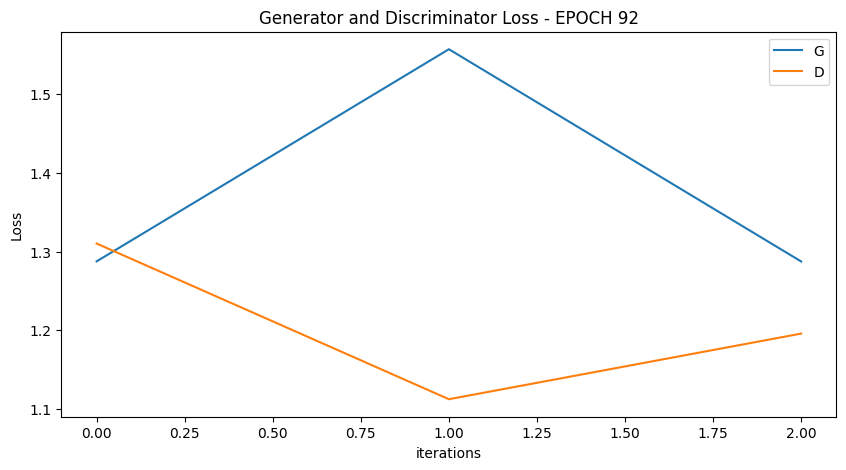

  0%|          | 0/3 [00:00<?, ?it/s]

[94/100][1/3] Loss_D: 1.1448 Loss_G: 1.3645 D(x): 0.5766 D(G(z)): 0.3971 / 0.2405
[94/100][2/3] Loss_D: 0.9847 Loss_G: 1.4263 D(x): 0.5910 D(G(z)): 0.3107 / 0.2311
[94/100][3/3] Loss_D: 0.9030 Loss_G: 1.6425 D(x): 0.6601 D(G(z)): 0.3100 / 0.1770


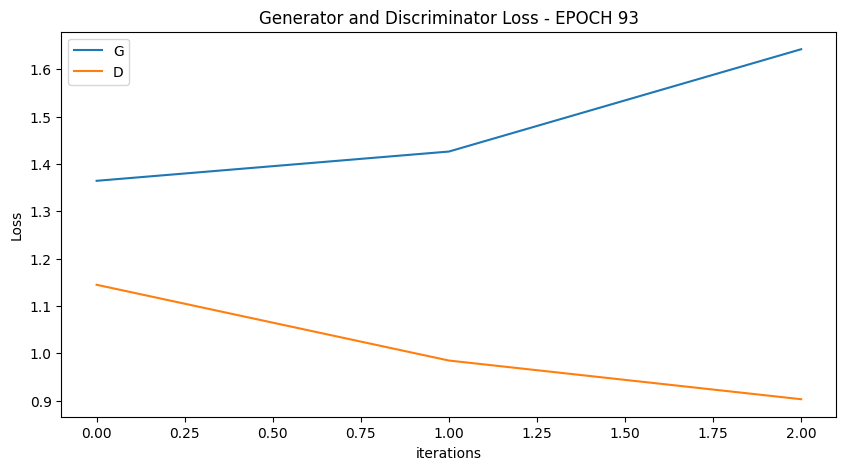

  0%|          | 0/3 [00:00<?, ?it/s]

[95/100][1/3] Loss_D: 0.9301 Loss_G: 1.4681 D(x): 0.5963 D(G(z)): 0.2664 / 0.2177
[95/100][2/3] Loss_D: 1.0202 Loss_G: 1.2811 D(x): 0.5658 D(G(z)): 0.2991 / 0.2610
[95/100][3/3] Loss_D: 0.9255 Loss_G: 1.8344 D(x): 0.7565 D(G(z)): 0.3769 / 0.1520


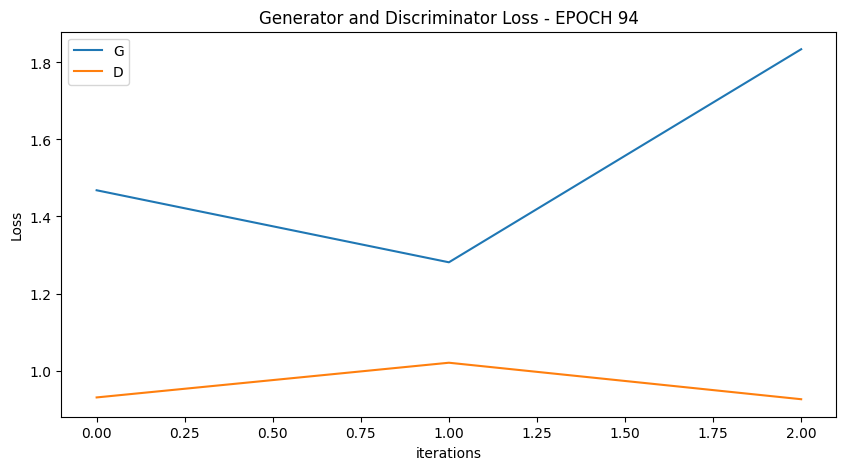

  0%|          | 0/3 [00:00<?, ?it/s]

[96/100][1/3] Loss_D: 0.9265 Loss_G: 1.3740 D(x): 0.5043 D(G(z)): 0.1772 / 0.2411
[96/100][2/3] Loss_D: 0.8817 Loss_G: 1.3396 D(x): 0.6748 D(G(z)): 0.3137 / 0.2494
[96/100][3/3] Loss_D: 0.8795 Loss_G: 1.6279 D(x): 0.6650 D(G(z)): 0.3097 / 0.1794


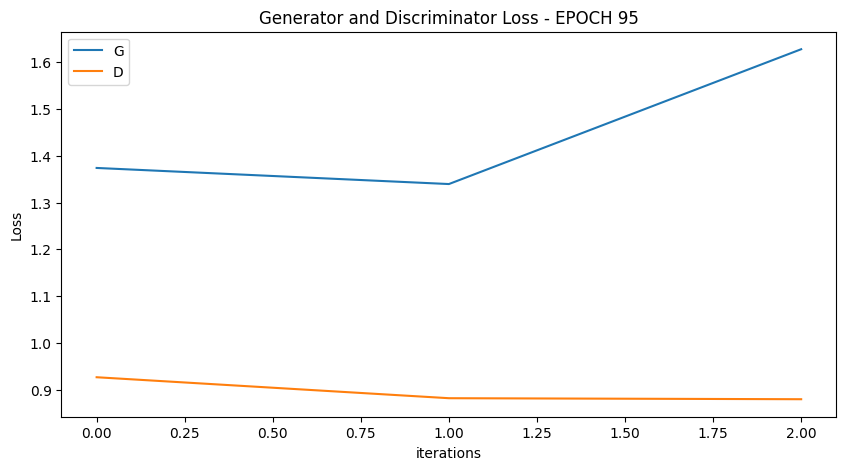

  0%|          | 0/3 [00:00<?, ?it/s]

[97/100][1/3] Loss_D: 0.8096 Loss_G: 1.7855 D(x): 0.6354 D(G(z)): 0.2302 / 0.1526
[97/100][2/3] Loss_D: 0.8174 Loss_G: 1.2496 D(x): 0.5897 D(G(z)): 0.1904 / 0.2727
[97/100][3/3] Loss_D: 1.1650 Loss_G: 1.8806 D(x): 0.7784 D(G(z)): 0.5248 / 0.1433


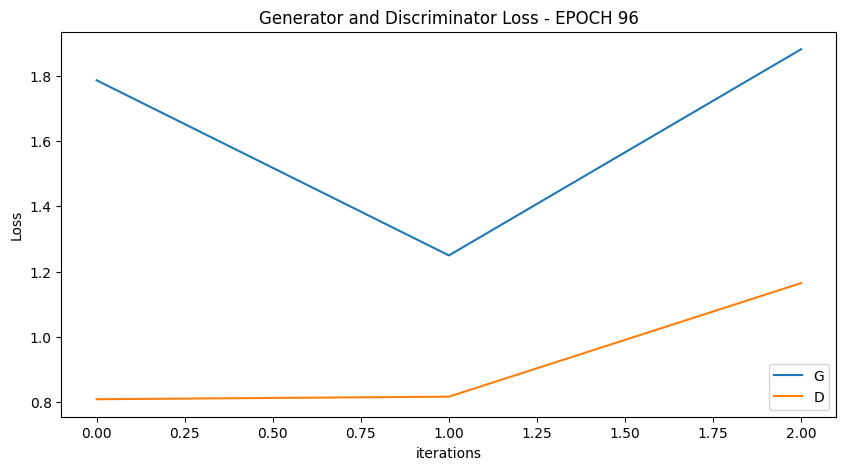

  0%|          | 0/3 [00:00<?, ?it/s]

[98/100][1/3] Loss_D: 0.9224 Loss_G: 1.5704 D(x): 0.5308 D(G(z)): 0.1906 / 0.1932
[98/100][2/3] Loss_D: 0.8218 Loss_G: 1.4726 D(x): 0.6176 D(G(z)): 0.2328 / 0.2138
[98/100][3/3] Loss_D: 0.8544 Loss_G: 1.6973 D(x): 0.6794 D(G(z)): 0.2982 / 0.1686


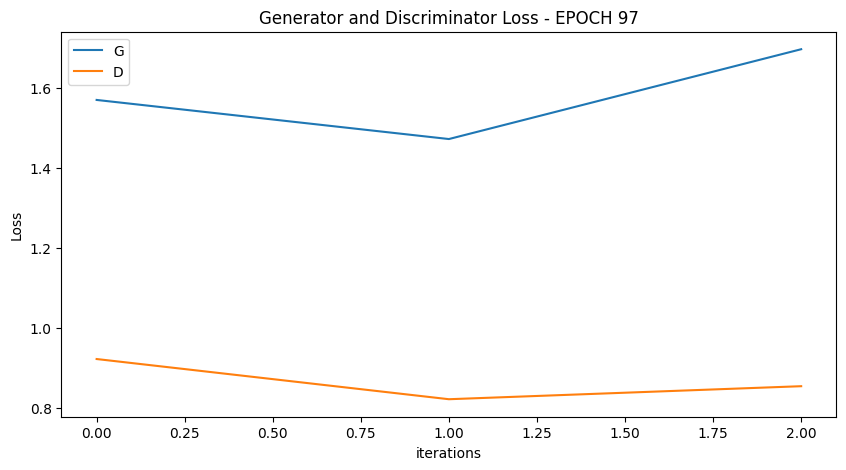

  0%|          | 0/3 [00:00<?, ?it/s]

[99/100][1/3] Loss_D: 0.7574 Loss_G: 1.7476 D(x): 0.6622 D(G(z)): 0.2222 / 0.1521
[99/100][2/3] Loss_D: 0.8796 Loss_G: 1.8445 D(x): 0.6507 D(G(z)): 0.2932 / 0.1425
[99/100][3/3] Loss_D: 0.8366 Loss_G: 1.6647 D(x): 0.6032 D(G(z)): 0.2336 / 0.1729


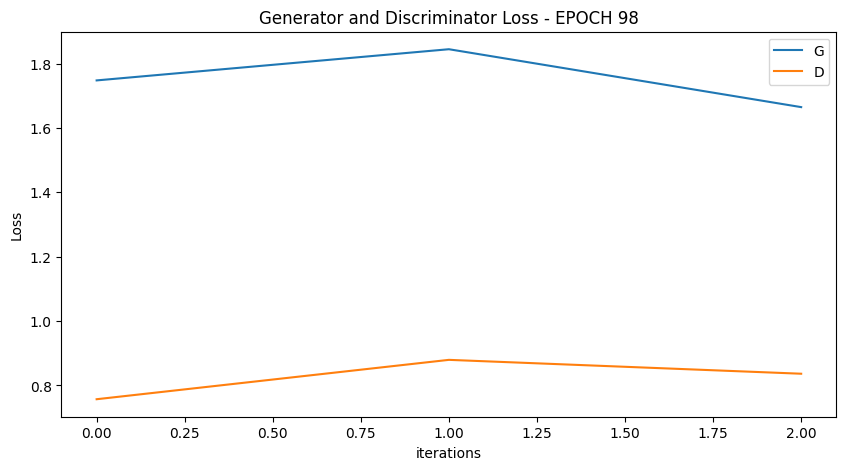

  0%|          | 0/3 [00:00<?, ?it/s]

[100/100][1/3] Loss_D: 0.8836 Loss_G: 1.6089 D(x): 0.6151 D(G(z)): 0.2659 / 0.1783
[100/100][2/3] Loss_D: 0.8731 Loss_G: 1.6925 D(x): 0.6332 D(G(z)): 0.2776 / 0.1736
[100/100][3/3] Loss_D: 0.9540 Loss_G: 1.5347 D(x): 0.5767 D(G(z)): 0.2777 / 0.2131


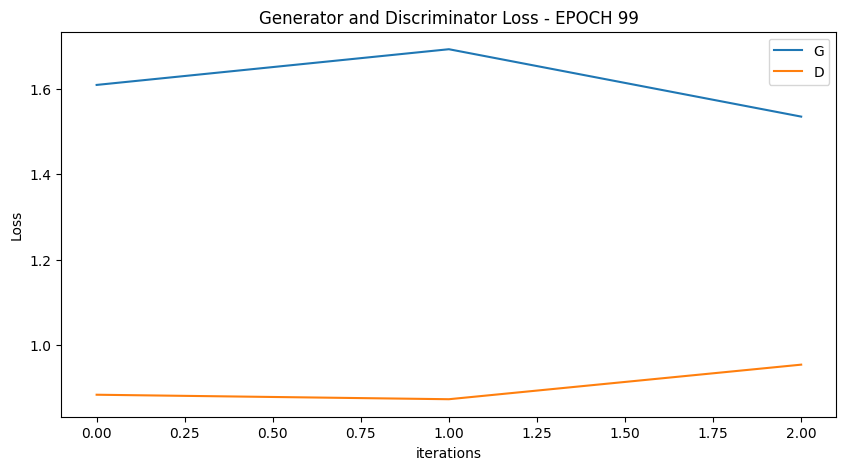

In [32]:
for epoch in range(epochs):
    start = time.time()
    for ii, real_images in tqdm(enumerate(train_loader), total=len(train_loader)):

        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        netG.zero_grad()
        labels.fill_(real_label)
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        G_losses.append(errG.item())
        D_losses.append(errD.item())
        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()

    epoch_time.append(time.time()- start)

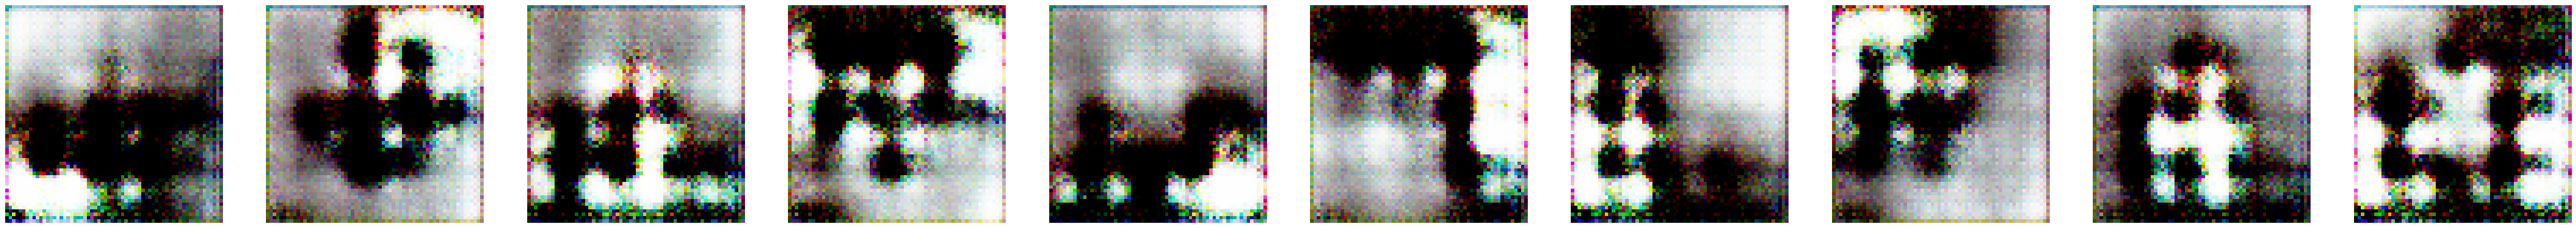

In [33]:
# Prikaz slika generisanih na osnovu prethodno istreniranog modela
show_generated_img(10)

In [34]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)

    # Prikazivanje generisanih slika
    figure, axes = plt.subplots(1, len(sample), figsize=(10, 10))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)

    # Čuvanje generisanih slika
    output_dir = "/jovana_pppo/podaci/generisano"
    os.makedirs(output_dir, exist_ok=True)
    for i, image in enumerate(sample):
        image_path = os.path.join(output_dir, f"generated_image_{i+1}.png")
        plt.imsave(image_path, image)
        print(f"Generisana slika {i+1} je sačuvana kao {image_path}")

    plt.show()
    plt.close()


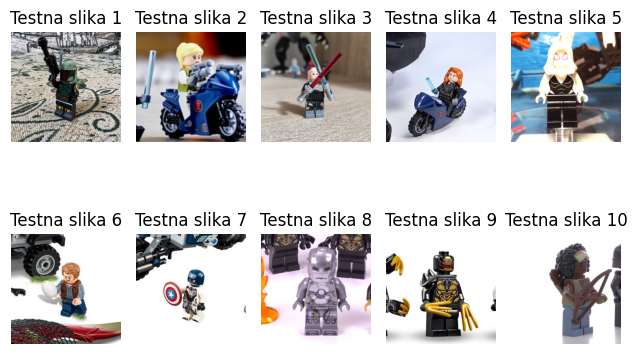

In [35]:
import os
import matplotlib.pyplot as plt
from PIL import Image

test_dir = "/jovana_pppo/podaci/test/"

# Učitavanje testnih slika iz direktorijuma
test_images = []
num_images = 10  # Broj slika za izvlačenje i prikazivanje

# Provera broja dostupnih slika u direktorijumu
num_files = len(os.listdir(test_dir))
if num_images > num_files:
    num_images = num_files

# Izvlačenje i prikazivanje testnih slika
for i, filename in enumerate(os.listdir(test_dir)):
    if i >= num_images:
        break

    img = Image.open(os.path.join(test_dir, filename))
    test_images.append(img)

    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(img)
    plt.title("Testna slika {}".format(i + 1))
    plt.axis("off")

plt.tight_layout()
plt.show()

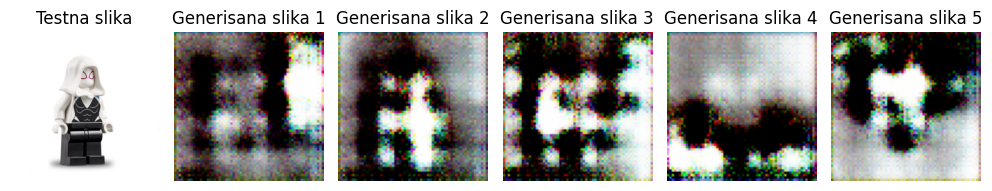

In [36]:
import random
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

test_dir = "/jovana_pppo/podaci/test/"  # Putanja do direktorijuma sa testnim slikama
generated_images_dir = "/jovana_pppo/podaci/generisano/"  # Putanja do direktorijuma za čuvanje generisanih slika

# Učitavanje slučajno odabrane testne slike
test_image_files = os.listdir(test_dir)
random_test_image_file = random.choice(test_image_files)
random_test_image = Image.open(os.path.join(test_dir, random_test_image_file))

# Generisanje i prikazivanje generisanih slika
n_images = 5
sample = []
for _ in range(n_images):
    noise = torch.randn(1, nz, 1, 1, device=device)
    gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
    gen_image = gen_image.numpy().transpose(1, 2, 0)
    sample.append(gen_image)

# Prikazivanje generisanih slika
figure, axes = plt.subplots(1, n_images+1, figsize=(10, 4))
axes[0].imshow(random_test_image)
axes[0].set_title("Testna slika")
axes[0].axis("off")

for i in range(n_images):
    axes[i+1].imshow(sample[i])
    axes[i+1].set_title(f"Generisana slika {i+1}")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()


STRUCTURAL SIMILARITY INDEX MEASURE između testne slike i generisanih slika

SSIM je metrika koja se koristi za merenje sličnosti između dve slike, pri čemu se uzima u obzir strukturna sličnost, kontrast i svetlina.

SSIM vrednosti su između 0 i 1, gde vrednost 1 označava potpunu sličnost između slika, a vrednost bliža nuli označava veću razliku između slika.

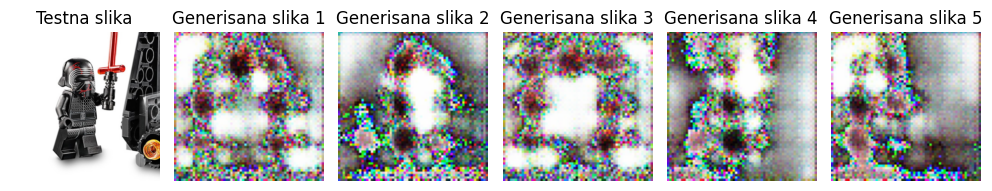

SSIM vrednosti:
Generisana slika 1: 0.1850
Generisana slika 2: 0.2063
Generisana slika 3: 0.1692
Generisana slika 4: 0.2119
Generisana slika 5: 0.2310


In [37]:
import random
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim

test_dir = "/jovana_pppo/podaci/test/"
generated_images_dir = "/jovana_pppo/podaci/generisano/"

# Učitavanje slučajno odabrane testne slike
test_image_files = os.listdir(test_dir)
random_test_image_file = random.choice(test_image_files)
random_test_image = Image.open(os.path.join(test_dir, random_test_image_file))
random_test_image_gray = random_test_image.convert("L")

# Generisanje i prikazivanje generisanih slika
n_images = 5
sample = []
sample_gray = []
for _ in range(n_images):
    noise = torch.randn(1, nz, 1, 1, device=device)
    gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
    gen_image = gen_image.numpy().transpose(1, 2, 0)
    gen_image = np.uint8(255 * gen_image)  # Konverzija u opseg 0-255
    gen_image_gray = Image.fromarray(gen_image).convert("L")
    gen_image_gray = gen_image_gray.resize(random_test_image_gray.size)  # Skaliranje na iste dimenzije kao testna slika
    sample.append(gen_image)
    sample_gray.append(gen_image_gray)

# Prikazivanje generisanih slika
figure, axes = plt.subplots(1, n_images+1, figsize=(10, 4))
axes[0].imshow(random_test_image)
axes[0].set_title("Testna slika")
axes[0].axis("off")

for i in range(n_images):
    axes[i+1].imshow(sample[i])
    axes[i+1].set_title(f"Generisana slika {i+1}")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()

# Računanje SSIM između testne slike i generisanih slika
ssim_scores = [ssim(np.array(random_test_image_gray), np.array(img_gray)) for img_gray in sample_gray]

# Prikazivanje rezultata
print("SSIM vrednosti:")
for i, score in enumerate(ssim_scores):
    print(f"Generisana slika {i+1}: {score:.4f}")
